<a href="https://colab.research.google.com/github/alexandergribenchenko/Time_Series_Project/blob/main/PY_03_TS_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 03 - Series de Tiempo

## (Acámica - DS online 40 - Proyecto 03 - Alexander Ortega)



## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### Preparación del Dataset (Propuesta Acámica)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set()

In [ ]:
# Cargamos los datasets de los años 2017, 2018, 2019
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [ ]:
# Visualizamos la información degeneral del dataset (2019)
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


In [ ]:
data_2019.head()

periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [ ]:
data_2019.tail()

periodo       fecha  hora_inicio  hora_fin     dia   estacion  \
812148     2019  2019-12-31           23         0  Martes   Salguero   
812149     2019  2019-12-31           23         0  Martes   Salguero   
812150     2019  2019-12-31           23         0  Martes   Salguero   
812151     2019  2019-12-31           23         0  Martes  Sarmiento   
812152     2019  2019-12-31           23         0  Martes  Sarmiento   

          sentido tipo_vehiculo  forma_pago  cantidad_pasos  
812148  Provincia       Liviano  NO COBRADO               7  
812149  Provincia       Liviano    TELEPASE               4  
812150  Provincia        Pesado  NO COBRADO               1  
812151  Provincia       Liviano  NO COBRADO               7  
812152  Provincia       Liviano    TELEPASE               7

In [ ]:
# Visualizamos la información degeneral del dataset (2018)
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


In [ ]:
data_2018.head()

periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [ ]:
data_2018.tail()

periodo       fecha  hora_inicio  hora_fin    dia   estacion  \
1375903     2018  2018-12-31           21        22  Lunes  Sarmiento   
1375904     2018  2018-12-31           21        22  Lunes  Sarmiento   
1375905     2018  2018-12-31           22        23  Lunes  Sarmiento   
1375906     2018  2018-12-31           22        23  Lunes  Sarmiento   
1375907     2018  2018-12-31           23         0  Lunes  Sarmiento   

           sentido tipo_vehiculo  forma_pago  cantidad_pasos  
1375903  Provincia       Liviano    TELEPASE              62  
1375904  Provincia        Pesado    TELEPASE               1  
1375905  Provincia       Liviano  NO COBRADO               3  
1375906  Provincia       Liviano    TELEPASE              13  
1375907  Provincia       Liviano  NO COBRADO               3

In [ ]:
# Visualizamos la información degeneral del dataset (2017)
data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


In [ ]:
data_2017.head()

periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

In [ ]:
data_2017.tail()

periodo       fecha  hora_inicio  hora_fin      dia   estacion  \
1372640     2017  2017-12-31           22        23  Domingo  Sarmiento   
1372641     2017  2017-12-31           22        23  Domingo  Sarmiento   
1372642     2017  2017-12-31           22        23  Domingo  Sarmiento   
1372643     2017  2017-12-31           23         0  Domingo  Sarmiento   
1372644     2017  2017-12-31           23         0  Domingo  Sarmiento   

           sentido tipo_vehiculo  forma_pago  cantidad_pasos  
1372640  Provincia       Liviano  NO COBRADO               3  
1372641  Provincia       Liviano    TELEPASE              10  
1372642  Provincia        Pesado    TELEPASE               1  
1372643  Provincia       Liviano  NO COBRADO               1  
1372644  Provincia       Liviano    TELEPASE               4

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [ ]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [ ]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [ ]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [ ]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 presentan en sus columnas la siguiente información:

- **periodo:** año

- **fecha:** año-mes-dia

- **hora_inicio:** hora de inicio del intervalo del conteo de vehiculos

- **hora_fin:** hora de fin del intervalo del conteo de vehiculos

- **dia:** dia de la semana 

- **estacion:** estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

- **sentido:** Centro o Provincia

- **tipo_vehiculo:** Liviano o Pesado

- **forma_pago:** Hay varias y varian entre los años.

- **cantidad_pasos:** Cantidad de vehiculos

### Preparación de dataset (Sección y propuesta propia)

##### ---> Consolidación del dataset

In [ ]:
# Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2017, data_2018, data_2019])
dataset

periodo       fecha  hora_inicio  hora_fin      dia   estacion  \
0          2017  2017-01-01            0         1  Domingo    Alberdi   
1          2017  2017-01-01            0         1  Domingo    Alberdi   
2          2017  2017-01-01            1         2  Domingo    Alberdi   
3          2017  2017-01-01            1         2  Domingo    Alberdi   
4          2017  2017-01-01            1         2  Domingo    Alberdi   
...         ...         ...          ...       ...      ...        ...   
812148     2019  2019-12-31           23         0   Martes   Salguero   
812149     2019  2019-12-31           23         0   Martes   Salguero   
812150     2019  2019-12-31           23         0   Martes   Salguero   
812151     2019  2019-12-31           23         0   Martes  Sarmiento   
812152     2019  2019-12-31           23         0   Martes  Sarmiento   

          sentido tipo_vehiculo  forma_pago  cantidad_pasos  
0          Centro       Liviano  NO COBRADO              25  
1          Centro       Liviano    TELEPASE               7  
2          Centro       Liviano  NO COBRADO               5  
3          Centro       Liviano    EFECTIVO               2  
4          Centro       Liviano    EFECTIVO              94  
...           ...           ...         ...             ...  
812148  Provincia       Liviano  NO COBRADO               7  
812149  Provincia       Liviano    TELEPASE               4  
812150  Provincia        Pesado  NO COBRADO               1  
812151  Provincia       Liviano  NO COBRADO               7  
812152  Provincia       Liviano    TELEPASE               7  

[3560706 rows x 10 columns]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560706 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   periodo         int64 
 1   fecha           object
 2   hora_inicio     int64 
 3   hora_fin        int64 
 4   dia             object
 5   estacion        object
 6   sentido         object
 7   tipo_vehiculo   object
 8   forma_pago      object
 9   cantidad_pasos  int64 
dtypes: int64(4), object(6)
memory usage: 298.8+ MB


##### ---> Valores Nulos

In [ ]:
# Corroboramos si existen valores nulos para alguna categoria
# (No existen valores nulos para ningunas caregoria en ninguno de los 3 años en estudio)
dataset.isnull().sum()

periodo           0
fecha             0
hora_inicio       0
hora_fin          0
dia               0
estacion          0
sentido           0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
dtype: int64

##### ---> Preprocesamiento de fechas

In [ ]:
# Reemplazaremos en la hora final 0 por 24 para que no se presente error en la conversión que haremos a continuación
# (De lo contrario al hacer la conversión de hora se presentará 2017-01-01 00:00:00 en lugar de 2017-01-02 00:00:00 )
dataset.hora_fin.replace({0:24}, inplace=True)
dataset

periodo       fecha  hora_inicio  hora_fin      dia   estacion  \
0          2017  2017-01-01            0         1  Domingo    Alberdi   
1          2017  2017-01-01            0         1  Domingo    Alberdi   
2          2017  2017-01-01            1         2  Domingo    Alberdi   
3          2017  2017-01-01            1         2  Domingo    Alberdi   
4          2017  2017-01-01            1         2  Domingo    Alberdi   
...         ...         ...          ...       ...      ...        ...   
812148     2019  2019-12-31           23        24   Martes   Salguero   
812149     2019  2019-12-31           23        24   Martes   Salguero   
812150     2019  2019-12-31           23        24   Martes   Salguero   
812151     2019  2019-12-31           23        24   Martes  Sarmiento   
812152     2019  2019-12-31           23        24   Martes  Sarmiento   

          sentido tipo_vehiculo  forma_pago  cantidad_pasos  
0          Centro       Liviano  NO COBRADO              25  
1          Centro       Liviano    TELEPASE               7  
2          Centro       Liviano  NO COBRADO               5  
3          Centro       Liviano    EFECTIVO               2  
4          Centro       Liviano    EFECTIVO              94  
...           ...           ...         ...             ...  
812148  Provincia       Liviano  NO COBRADO               7  
812149  Provincia       Liviano    TELEPASE               4  
812150  Provincia        Pesado  NO COBRADO               1  
812151  Provincia       Liviano  NO COBRADO               7  
812152  Provincia       Liviano    TELEPASE               7  

[3560706 rows x 10 columns]

In [ ]:
# Corroboramos que la columna fecha aun esta en tipo objeto
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560706 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   periodo         int64 
 1   fecha           object
 2   hora_inicio     int64 
 3   hora_fin        int64 
 4   dia             object
 5   estacion        object
 6   sentido         object
 7   tipo_vehiculo   object
 8   forma_pago      object
 9   cantidad_pasos  int64 
dtypes: int64(4), object(6)
memory usage: 298.8+ MB


In [ ]:
# Hacemos la conversión de la columna fecha a tipo datetime
dataset.fecha = pd.to_datetime(dataset.fecha)

In [ ]:
# Corroboramos que la fecha se encuentra en formato datetime
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560706 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   periodo         int64         
 1   fecha           datetime64[ns]
 2   hora_inicio     int64         
 3   hora_fin        int64         
 4   dia             object        
 5   estacion        object        
 6   sentido         object        
 7   tipo_vehiculo   object        
 8   forma_pago      object        
 9   cantidad_pasos  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 298.8+ MB


In [ ]:
# Reorganizamos para tener el dataset en una estructura ordenada
dataset=dataset[['fecha', 'periodo', 'hora_inicio', 'hora_fin','dia', 
         'estacion','sentido', 'tipo_vehiculo', 'forma_pago','cantidad_pasos']]
dataset

fecha  periodo  hora_inicio  hora_fin      dia   estacion  \
0      2017-01-01     2017            0         1  Domingo    Alberdi   
1      2017-01-01     2017            0         1  Domingo    Alberdi   
2      2017-01-01     2017            1         2  Domingo    Alberdi   
3      2017-01-01     2017            1         2  Domingo    Alberdi   
4      2017-01-01     2017            1         2  Domingo    Alberdi   
...           ...      ...          ...       ...      ...        ...   
812148 2019-12-31     2019           23        24   Martes   Salguero   
812149 2019-12-31     2019           23        24   Martes   Salguero   
812150 2019-12-31     2019           23        24   Martes   Salguero   
812151 2019-12-31     2019           23        24   Martes  Sarmiento   
812152 2019-12-31     2019           23        24   Martes  Sarmiento   

          sentido tipo_vehiculo  forma_pago  cantidad_pasos  
0          Centro       Liviano  NO COBRADO              25  
1          Centro       Liviano    TELEPASE               7  
2          Centro       Liviano  NO COBRADO               5  
3          Centro       Liviano    EFECTIVO               2  
4          Centro       Liviano    EFECTIVO              94  
...           ...           ...         ...             ...  
812148  Provincia       Liviano  NO COBRADO               7  
812149  Provincia       Liviano    TELEPASE               4  
812150  Provincia        Pesado  NO COBRADO               1  
812151  Provincia       Liviano  NO COBRADO               7  
812152  Provincia       Liviano    TELEPASE               7  

[3560706 rows x 10 columns]

In [ ]:
# Obtenemos el mes a partir de la columna fecha y lo incluimos en nuestro dataset
dataset['mes'] = dataset['fecha'].dt.month
dataset

fecha  periodo  hora_inicio  hora_fin      dia   estacion  \
0      2017-01-01     2017            0         1  Domingo    Alberdi   
1      2017-01-01     2017            0         1  Domingo    Alberdi   
2      2017-01-01     2017            1         2  Domingo    Alberdi   
3      2017-01-01     2017            1         2  Domingo    Alberdi   
4      2017-01-01     2017            1         2  Domingo    Alberdi   
...           ...      ...          ...       ...      ...        ...   
812148 2019-12-31     2019           23        24   Martes   Salguero   
812149 2019-12-31     2019           23        24   Martes   Salguero   
812150 2019-12-31     2019           23        24   Martes   Salguero   
812151 2019-12-31     2019           23        24   Martes  Sarmiento   
812152 2019-12-31     2019           23        24   Martes  Sarmiento   

          sentido tipo_vehiculo  forma_pago  cantidad_pasos  mes  
0          Centro       Liviano  NO COBRADO              25    1  
1          Centro       Liviano    TELEPASE               7    1  
2          Centro       Liviano  NO COBRADO               5    1  
3          Centro       Liviano    EFECTIVO               2    1  
4          Centro       Liviano    EFECTIVO              94    1  
...           ...           ...         ...             ...  ...  
812148  Provincia       Liviano  NO COBRADO               7   12  
812149  Provincia       Liviano    TELEPASE               4   12  
812150  Provincia        Pesado  NO COBRADO               1   12  
812151  Provincia       Liviano  NO COBRADO               7   12  
812152  Provincia       Liviano    TELEPASE               7   12  

[3560706 rows x 11 columns]

In [ ]:
# Obtenemos el numero del dia a partir de la columna fecha y lo incluimos en nuestro dataset
dataset['dia_num'] = dataset['fecha'].dt.weekday
dataset

fecha  periodo  hora_inicio  hora_fin      dia   estacion  \
0      2017-01-01     2017            0         1  Domingo    Alberdi   
1      2017-01-01     2017            0         1  Domingo    Alberdi   
2      2017-01-01     2017            1         2  Domingo    Alberdi   
3      2017-01-01     2017            1         2  Domingo    Alberdi   
4      2017-01-01     2017            1         2  Domingo    Alberdi   
...           ...      ...          ...       ...      ...        ...   
812148 2019-12-31     2019           23        24   Martes   Salguero   
812149 2019-12-31     2019           23        24   Martes   Salguero   
812150 2019-12-31     2019           23        24   Martes   Salguero   
812151 2019-12-31     2019           23        24   Martes  Sarmiento   
812152 2019-12-31     2019           23        24   Martes  Sarmiento   

          sentido tipo_vehiculo  forma_pago  cantidad_pasos  mes  dia_num  
0          Centro       Liviano  NO COBRADO              25    1        6  
1          Centro       Liviano    TELEPASE               7    1        6  
2          Centro       Liviano  NO COBRADO               5    1        6  
3          Centro       Liviano    EFECTIVO               2    1        6  
4          Centro       Liviano    EFECTIVO              94    1        6  
...           ...           ...         ...             ...  ...      ...  
812148  Provincia       Liviano  NO COBRADO               7   12        1  
812149  Provincia       Liviano    TELEPASE               4   12        1  
812150  Provincia        Pesado  NO COBRADO               1   12        1  
812151  Provincia       Liviano  NO COBRADO               7   12        1  
812152  Provincia       Liviano    TELEPASE               7   12        1  

[3560706 rows x 12 columns]

In [ ]:
# Reorganizamos para tener el dataset en una estructura ordenada
dataset=dataset[['fecha', 'periodo','mes', 'hora_inicio', 'hora_fin','dia','dia_num', 
         'estacion','sentido', 'tipo_vehiculo', 'forma_pago','cantidad_pasos']]
dataset

fecha  periodo  mes  hora_inicio  hora_fin      dia  dia_num  \
0      2017-01-01     2017    1            0         1  Domingo        6   
1      2017-01-01     2017    1            0         1  Domingo        6   
2      2017-01-01     2017    1            1         2  Domingo        6   
3      2017-01-01     2017    1            1         2  Domingo        6   
4      2017-01-01     2017    1            1         2  Domingo        6   
...           ...      ...  ...          ...       ...      ...      ...   
812148 2019-12-31     2019   12           23        24   Martes        1   
812149 2019-12-31     2019   12           23        24   Martes        1   
812150 2019-12-31     2019   12           23        24   Martes        1   
812151 2019-12-31     2019   12           23        24   Martes        1   
812152 2019-12-31     2019   12           23        24   Martes        1   

         estacion    sentido tipo_vehiculo  forma_pago  cantidad_pasos  
0         Alberdi     Centro       Liviano  NO COBRADO              25  
1         Alberdi     Centro       Liviano    TELEPASE               7  
2         Alberdi     Centro       Liviano  NO COBRADO               5  
3         Alberdi     Centro       Liviano    EFECTIVO               2  
4         Alberdi     Centro       Liviano    EFECTIVO              94  
...           ...        ...           ...         ...             ...  
812148   Salguero  Provincia       Liviano  NO COBRADO               7  
812149   Salguero  Provincia       Liviano    TELEPASE               4  
812150   Salguero  Provincia        Pesado  NO COBRADO               1  
812151  Sarmiento  Provincia       Liviano  NO COBRADO               7  
812152  Sarmiento  Provincia       Liviano    TELEPASE               7  

[3560706 rows x 12 columns]

In [ ]:
# Generamos una nueva columna de fecha compacta a fartir de la columna fecha y hora
dataset['fecha_comp'] = dataset.fecha + pd.to_timedelta(dataset.hora_fin, unit = 'h')
dataset

fecha  periodo  mes  hora_inicio  hora_fin      dia  dia_num  \
0      2017-01-01     2017    1            0         1  Domingo        6   
1      2017-01-01     2017    1            0         1  Domingo        6   
2      2017-01-01     2017    1            1         2  Domingo        6   
3      2017-01-01     2017    1            1         2  Domingo        6   
4      2017-01-01     2017    1            1         2  Domingo        6   
...           ...      ...  ...          ...       ...      ...      ...   
812148 2019-12-31     2019   12           23        24   Martes        1   
812149 2019-12-31     2019   12           23        24   Martes        1   
812150 2019-12-31     2019   12           23        24   Martes        1   
812151 2019-12-31     2019   12           23        24   Martes        1   
812152 2019-12-31     2019   12           23        24   Martes        1   

         estacion    sentido tipo_vehiculo  forma_pago  cantidad_pasos  \
0         Alberdi     Centro       Liviano  NO COBRADO              25   
1         Alberdi     Centro       Liviano    TELEPASE               7   
2         Alberdi     Centro       Liviano  NO COBRADO               5   
3         Alberdi     Centro       Liviano    EFECTIVO               2   
4         Alberdi     Centro       Liviano    EFECTIVO              94   
...           ...        ...           ...         ...             ...   
812148   Salguero  Provincia       Liviano  NO COBRADO               7   
812149   Salguero  Provincia       Liviano    TELEPASE               4   
812150   Salguero  Provincia        Pesado  NO COBRADO               1   
812151  Sarmiento  Provincia       Liviano  NO COBRADO               7   
812152  Sarmiento  Provincia       Liviano    TELEPASE               7   

                fecha_comp  
0      2017-01-01 01:00:00  
1      2017-01-01 01:00:00  
2      2017-01-01 02:00:00  
3      2017-01-01 02:00:00  
4      2017-01-01 02:00:00  
...                    ...  
812148 2020-01-01 00:00:00  
812149 2020-01-01 00:00:00  
812150 2020-01-01 00:00:00  
812151 2020-01-01 00:00:00  
812152 2020-01-01 00:00:00  

[3560706 rows x 13 columns]

In [ ]:
# Reorganizamos para tener el dataset en una estructura ordenada
dataset=dataset[['fecha_comp', 'fecha', 'periodo','mes', 'hora_inicio', 'hora_fin','dia', 'dia_num', 
         'estacion','sentido', 'tipo_vehiculo', 'forma_pago','cantidad_pasos']]
dataset

fecha_comp      fecha  periodo  mes  hora_inicio  hora_fin  \
0      2017-01-01 01:00:00 2017-01-01     2017    1            0         1   
1      2017-01-01 01:00:00 2017-01-01     2017    1            0         1   
2      2017-01-01 02:00:00 2017-01-01     2017    1            1         2   
3      2017-01-01 02:00:00 2017-01-01     2017    1            1         2   
4      2017-01-01 02:00:00 2017-01-01     2017    1            1         2   
...                    ...        ...      ...  ...          ...       ...   
812148 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812149 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812150 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812151 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812152 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   

            dia  dia_num   estacion    sentido tipo_vehiculo  forma_pago  \
0       Domingo        6    Alberdi     Centro       Liviano  NO COBRADO   
1       Domingo        6    Alberdi     Centro       Liviano    TELEPASE   
2       Domingo        6    Alberdi     Centro       Liviano  NO COBRADO   
3       Domingo        6    Alberdi     Centro       Liviano    EFECTIVO   
4       Domingo        6    Alberdi     Centro       Liviano    EFECTIVO   
...         ...      ...        ...        ...           ...         ...   
812148   Martes        1   Salguero  Provincia       Liviano  NO COBRADO   
812149   Martes        1   Salguero  Provincia       Liviano    TELEPASE   
812150   Martes        1   Salguero  Provincia        Pesado  NO COBRADO   
812151   Martes        1  Sarmiento  Provincia       Liviano  NO COBRADO   
812152   Martes        1  Sarmiento  Provincia       Liviano    TELEPASE   

        cantidad_pasos  
0                   25  
1                    7  
2                    5  
3                    2  
4                   94  
...                ...  
812148               7  
812149               4  
812150               1  
812151               7  
812152               7  

[3560706 rows x 13 columns]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560706 entries, 0 to 812152
Data columns (total 13 columns):
 #   Column          Dtype         
---  ------          -----         
 0   fecha_comp      datetime64[ns]
 1   fecha           datetime64[ns]
 2   periodo         int64         
 3   mes             int64         
 4   hora_inicio     int64         
 5   hora_fin        int64         
 6   dia             object        
 7   dia_num         int64         
 8   estacion        object        
 9   sentido         object        
 10  tipo_vehiculo   object        
 11  forma_pago      object        
 12  cantidad_pasos  int64         
dtypes: datetime64[ns](2), int64(6), object(5)
memory usage: 380.3+ MB


##### ---> Preprocesamiento de atributos

##### estacion:

In [ ]:
# Evaluamos todos las estaciones que tenemos
dataset.estacion.unique()

array(['Alberdi', 'Avellaneda', 'Dellepiane Centro', 'Dellepiane Liniers',
       'Illia', 'Retiro', 'Salguero', 'Sarmiento', 'Alberti',
       'Dellepiane', 'PDB'], dtype=object)

In [ ]:
# Dado que a partir de 2019 la estación Dellepiane no distingue entre centro y Liniers la unificaremos
# Adicional a ello vemos que el peaje Alberti en años anteriores estaba nombrandose como Alberdi (tambien unificaremos)
dataset.estacion.replace({'Dellepiane Centro': 'Dellepiane', 'Dellepiane Liniers': 'Dellepiane',
                 'Alberdi': 'Alberti'}, inplace=True)
dataset

fecha_comp      fecha  periodo  mes  hora_inicio  hora_fin  \
0      2017-01-01 01:00:00 2017-01-01     2017    1            0         1   
1      2017-01-01 01:00:00 2017-01-01     2017    1            0         1   
2      2017-01-01 02:00:00 2017-01-01     2017    1            1         2   
3      2017-01-01 02:00:00 2017-01-01     2017    1            1         2   
4      2017-01-01 02:00:00 2017-01-01     2017    1            1         2   
...                    ...        ...      ...  ...          ...       ...   
812148 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812149 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812150 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812151 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812152 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   

            dia  dia_num   estacion    sentido tipo_vehiculo  forma_pago  \
0       Domingo        6    Alberti     Centro       Liviano  NO COBRADO   
1       Domingo        6    Alberti     Centro       Liviano    TELEPASE   
2       Domingo        6    Alberti     Centro       Liviano  NO COBRADO   
3       Domingo        6    Alberti     Centro       Liviano    EFECTIVO   
4       Domingo        6    Alberti     Centro       Liviano    EFECTIVO   
...         ...      ...        ...        ...           ...         ...   
812148   Martes        1   Salguero  Provincia       Liviano  NO COBRADO   
812149   Martes        1   Salguero  Provincia       Liviano    TELEPASE   
812150   Martes        1   Salguero  Provincia        Pesado  NO COBRADO   
812151   Martes        1  Sarmiento  Provincia       Liviano  NO COBRADO   
812152   Martes        1  Sarmiento  Provincia       Liviano    TELEPASE   

        cantidad_pasos  
0                   25  
1                    7  
2                    5  
3                    2  
4                   94  
...                ...  
812148               7  
812149               4  
812150               1  
812151               7  
812152               7  

[3560706 rows x 13 columns]

In [ ]:
# Evaluamos la salida tras el procesamiento y corroboramos que el cambio funciona bien
dataset.estacion.unique()

array(['Alberti', 'Avellaneda', 'Dellepiane', 'Illia', 'Retiro',
       'Salguero', 'Sarmiento', 'PDB'], dtype=object)

##### sentido:

In [ ]:
# Evaluamos todos las sentidos que tenemos
# (no necesita procesamiento)
dataset.sentido.unique()

array(['Centro', 'Provincia'], dtype=object)

##### tipo_vehiculo:

In [ ]:
# Evaluamos todos las tipo_vehiculo que tenemos
# (no necesita procesamiento)
dataset.tipo_vehiculo.unique()

array(['Liviano', 'Pesado'], dtype=object)

##### forma_pago:

In [ ]:
# Evaluamos todas las forma_pago que tenemos
dataset.forma_pago.unique()

array(['NO COBRADO', 'TELEPASE', 'EFECTIVO', 'TARJETA DISCAPACIDAD',
       'EXENTO', 'INFRACCION', 'MONEDERO', 'Otros', 'T. DISCAPACIDAD'],
      dtype=object)

In [ ]:
# Vemos que la tarjeta de discapacidad tiene 2 nombre diferentes, la unificaremos a como esta en 2019
dataset.forma_pago.replace({'TARJETA DISCAPACIDAD': 'T. DISCAPACIDAD'}, inplace=True)
dataset

fecha_comp      fecha  periodo  mes  hora_inicio  hora_fin  \
0      2017-01-01 01:00:00 2017-01-01     2017    1            0         1   
1      2017-01-01 01:00:00 2017-01-01     2017    1            0         1   
2      2017-01-01 02:00:00 2017-01-01     2017    1            1         2   
3      2017-01-01 02:00:00 2017-01-01     2017    1            1         2   
4      2017-01-01 02:00:00 2017-01-01     2017    1            1         2   
...                    ...        ...      ...  ...          ...       ...   
812148 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812149 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812150 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812151 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812152 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   

            dia  dia_num   estacion    sentido tipo_vehiculo  forma_pago  \
0       Domingo        6    Alberti     Centro       Liviano  NO COBRADO   
1       Domingo        6    Alberti     Centro       Liviano    TELEPASE   
2       Domingo        6    Alberti     Centro       Liviano  NO COBRADO   
3       Domingo        6    Alberti     Centro       Liviano    EFECTIVO   
4       Domingo        6    Alberti     Centro       Liviano    EFECTIVO   
...         ...      ...        ...        ...           ...         ...   
812148   Martes        1   Salguero  Provincia       Liviano  NO COBRADO   
812149   Martes        1   Salguero  Provincia       Liviano    TELEPASE   
812150   Martes        1   Salguero  Provincia        Pesado  NO COBRADO   
812151   Martes        1  Sarmiento  Provincia       Liviano  NO COBRADO   
812152   Martes        1  Sarmiento  Provincia       Liviano    TELEPASE   

        cantidad_pasos  
0                   25  
1                    7  
2                    5  
3                    2  
4                   94  
...                ...  
812148               7  
812149               4  
812150               1  
812151               7  
812152               7  

[3560706 rows x 13 columns]

In [ ]:
# Evaluamos la salida tras el procesamiento y corroboramos que el cambio funciona bien
dataset.forma_pago.unique()

array(['NO COBRADO', 'TELEPASE', 'EFECTIVO', 'T. DISCAPACIDAD', 'EXENTO',
       'INFRACCION', 'MONEDERO', 'Otros'], dtype=object)

In [ ]:
# Evaluamos ademas la cantidad de registros en cada tipo de pago
dataset.forma_pago.value_counts()

TELEPASE           1027861
EFECTIVO           1020176
EXENTO              464708
INFRACCION          405034
NO COBRADO          380450
T. DISCAPACIDAD     262455
MONEDERO                14
Otros                    8
Name: forma_pago, dtype: int64

In [ ]:
# Vemos que los tipo de pago MONEDERO y Otros tienen muy pocos registros, 
# por lo cual los borraremos pues son poco significativos
indx_drop=dataset[(dataset.forma_pago=='MONEDERO') | (dataset.forma_pago=='Otros')].index
dataset.drop(indx_drop, inplace=True)

In [ ]:
# Evaluamos la salida tras el procesamiento y corroboramos que el cambio funciona bien
# (Ahora tambien coinciden las formas de pago con las unicas que existen en 2019)
dataset.forma_pago.unique()

array(['NO COBRADO', 'TELEPASE', 'EFECTIVO', 'T. DISCAPACIDAD', 'EXENTO',
       'INFRACCION'], dtype=object)

In [ ]:
# Observamos el dataset obtenido tras eliminar lso registros
dataset

fecha_comp      fecha  periodo  mes  hora_inicio  hora_fin  \
0      2017-01-01 01:00:00 2017-01-01     2017    1            0         1   
1      2017-01-01 01:00:00 2017-01-01     2017    1            0         1   
2      2017-01-01 02:00:00 2017-01-01     2017    1            1         2   
3      2017-01-01 02:00:00 2017-01-01     2017    1            1         2   
4      2017-01-01 02:00:00 2017-01-01     2017    1            1         2   
...                    ...        ...      ...  ...          ...       ...   
812148 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812149 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812150 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812151 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812152 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   

            dia  dia_num   estacion    sentido tipo_vehiculo  forma_pago  \
0       Domingo        6    Alberti     Centro       Liviano  NO COBRADO   
1       Domingo        6    Alberti     Centro       Liviano    TELEPASE   
2       Domingo        6    Alberti     Centro       Liviano  NO COBRADO   
3       Domingo        6    Alberti     Centro       Liviano    EFECTIVO   
4       Domingo        6    Alberti     Centro       Liviano    EFECTIVO   
...         ...      ...        ...        ...           ...         ...   
812148   Martes        1   Salguero  Provincia       Liviano  NO COBRADO   
812149   Martes        1   Salguero  Provincia       Liviano    TELEPASE   
812150   Martes        1   Salguero  Provincia        Pesado  NO COBRADO   
812151   Martes        1  Sarmiento  Provincia       Liviano  NO COBRADO   
812152   Martes        1  Sarmiento  Provincia       Liviano    TELEPASE   

        cantidad_pasos  
0                   25  
1                    7  
2                    5  
3                    2  
4                   94  
...                ...  
812148               7  
812149               4  
812150               1  
812151               7  
812152               7  

[3560648 rows x 13 columns]

##### ---> Preprocesamiento de atributos para modelado

Dado que implementaremos varios modelos de predición y la mayoría de ellos no procesan atributos que no sean de tipo numérico (LinearRegression, XGBRegressor, etc) es necesario incluir una columna adicional con la transformación al ordinal gregoriano proléptico de una fecha que entrega la función ```datetime.toordinal```:

In [ ]:
dataset['fecha_num'] = dataset.fecha.map(datetime.datetime.toordinal)
dataset

fecha_comp      fecha  periodo  mes  hora_inicio  hora_fin  \
0      2017-01-01 01:00:00 2017-01-01     2017    1            0         1   
1      2017-01-01 01:00:00 2017-01-01     2017    1            0         1   
2      2017-01-01 02:00:00 2017-01-01     2017    1            1         2   
3      2017-01-01 02:00:00 2017-01-01     2017    1            1         2   
4      2017-01-01 02:00:00 2017-01-01     2017    1            1         2   
...                    ...        ...      ...  ...          ...       ...   
812148 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812149 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812150 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812151 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812152 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   

            dia  dia_num   estacion    sentido tipo_vehiculo  forma_pago  \
0       Domingo        6    Alberti     Centro       Liviano  NO COBRADO   
1       Domingo        6    Alberti     Centro       Liviano    TELEPASE   
2       Domingo        6    Alberti     Centro       Liviano  NO COBRADO   
3       Domingo        6    Alberti     Centro       Liviano    EFECTIVO   
4       Domingo        6    Alberti     Centro       Liviano    EFECTIVO   
...         ...      ...        ...        ...           ...         ...   
812148   Martes        1   Salguero  Provincia       Liviano  NO COBRADO   
812149   Martes        1   Salguero  Provincia       Liviano    TELEPASE   
812150   Martes        1   Salguero  Provincia        Pesado  NO COBRADO   
812151   Martes        1  Sarmiento  Provincia       Liviano  NO COBRADO   
812152   Martes        1  Sarmiento  Provincia       Liviano    TELEPASE   

        cantidad_pasos  fecha_num  
0                   25     736330  
1                    7     736330  
2                    5     736330  
3                    2     736330  
4                   94     736330  
...                ...        ...  
812148               7     737424  
812149               4     737424  
812150               1     737424  
812151               7     737424  
812152               7     737424  

[3560648 rows x 14 columns]

In [ ]:
# Reorganizamos para tener el dataset en una estructura ordenada
dataset=dataset[['fecha_comp', 'fecha','fecha_num', 'periodo','mes', 'hora_inicio', 'hora_fin','dia', 'dia_num', 
         'estacion','sentido', 'tipo_vehiculo', 'forma_pago','cantidad_pasos']]
dataset

fecha_comp      fecha  fecha_num  periodo  mes  hora_inicio  \
0      2017-01-01 01:00:00 2017-01-01     736330     2017    1            0   
1      2017-01-01 01:00:00 2017-01-01     736330     2017    1            0   
2      2017-01-01 02:00:00 2017-01-01     736330     2017    1            1   
3      2017-01-01 02:00:00 2017-01-01     736330     2017    1            1   
4      2017-01-01 02:00:00 2017-01-01     736330     2017    1            1   
...                    ...        ...        ...      ...  ...          ...   
812148 2020-01-01 00:00:00 2019-12-31     737424     2019   12           23   
812149 2020-01-01 00:00:00 2019-12-31     737424     2019   12           23   
812150 2020-01-01 00:00:00 2019-12-31     737424     2019   12           23   
812151 2020-01-01 00:00:00 2019-12-31     737424     2019   12           23   
812152 2020-01-01 00:00:00 2019-12-31     737424     2019   12           23   

        hora_fin      dia  dia_num   estacion    sentido tipo_vehiculo  \
0              1  Domingo        6    Alberti     Centro       Liviano   
1              1  Domingo        6    Alberti     Centro       Liviano   
2              2  Domingo        6    Alberti     Centro       Liviano   
3              2  Domingo        6    Alberti     Centro       Liviano   
4              2  Domingo        6    Alberti     Centro       Liviano   
...          ...      ...      ...        ...        ...           ...   
812148        24   Martes        1   Salguero  Provincia       Liviano   
812149        24   Martes        1   Salguero  Provincia       Liviano   
812150        24   Martes        1   Salguero  Provincia        Pesado   
812151        24   Martes        1  Sarmiento  Provincia       Liviano   
812152        24   Martes        1  Sarmiento  Provincia       Liviano   

        forma_pago  cantidad_pasos  
0       NO COBRADO              25  
1         TELEPASE               7  
2       NO COBRADO               5  
3         EFECTIVO               2  
4         EFECTIVO              94  
...            ...             ...  
812148  NO COBRADO               7  
812149    TELEPASE               4  
812150  NO COBRADO               1  
812151  NO COBRADO               7  
812152    TELEPASE               7  

[3560648 rows x 14 columns]

### Dataset final para el análisis

Tras generar todas las transformaciones necesarias obtenemos  presetnamos finalmente el dataset que servira de base para todas nuestro proceso de analisis y de predicción: 

In [ ]:
dataset

fecha_comp      fecha  fecha_num  periodo  mes  hora_inicio  \
0      2017-01-01 01:00:00 2017-01-01     736330     2017    1            0   
1      2017-01-01 01:00:00 2017-01-01     736330     2017    1            0   
2      2017-01-01 02:00:00 2017-01-01     736330     2017    1            1   
3      2017-01-01 02:00:00 2017-01-01     736330     2017    1            1   
4      2017-01-01 02:00:00 2017-01-01     736330     2017    1            1   
...                    ...        ...        ...      ...  ...          ...   
812148 2020-01-01 00:00:00 2019-12-31     737424     2019   12           23   
812149 2020-01-01 00:00:00 2019-12-31     737424     2019   12           23   
812150 2020-01-01 00:00:00 2019-12-31     737424     2019   12           23   
812151 2020-01-01 00:00:00 2019-12-31     737424     2019   12           23   
812152 2020-01-01 00:00:00 2019-12-31     737424     2019   12           23   

        hora_fin      dia  dia_num   estacion    sentido tipo_vehiculo  \
0              1  Domingo        6    Alberti     Centro       Liviano   
1              1  Domingo        6    Alberti     Centro       Liviano   
2              2  Domingo        6    Alberti     Centro       Liviano   
3              2  Domingo        6    Alberti     Centro       Liviano   
4              2  Domingo        6    Alberti     Centro       Liviano   
...          ...      ...      ...        ...        ...           ...   
812148        24   Martes        1   Salguero  Provincia       Liviano   
812149        24   Martes        1   Salguero  Provincia       Liviano   
812150        24   Martes        1   Salguero  Provincia        Pesado   
812151        24   Martes        1  Sarmiento  Provincia       Liviano   
812152        24   Martes        1  Sarmiento  Provincia       Liviano   

        forma_pago  cantidad_pasos  
0       NO COBRADO              25  
1         TELEPASE               7  
2       NO COBRADO               5  
3         EFECTIVO               2  
4         EFECTIVO              94  
...            ...             ...  
812148  NO COBRADO               7  
812149    TELEPASE               4  
812150  NO COBRADO               1  
812151  NO COBRADO               7  
812152    TELEPASE               7  

[3560648 rows x 14 columns]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560648 entries, 0 to 812152
Data columns (total 14 columns):
 #   Column          Dtype         
---  ------          -----         
 0   fecha_comp      datetime64[ns]
 1   fecha           datetime64[ns]
 2   fecha_num       int64         
 3   periodo         int64         
 4   mes             int64         
 5   hora_inicio     int64         
 6   hora_fin        int64         
 7   dia             object        
 8   dia_num         int64         
 9   estacion        object        
 10  sentido         object        
 11  tipo_vehiculo   object        
 12  forma_pago      object        
 13  cantidad_pasos  int64         
dtypes: datetime64[ns](2), int64(7), object(5)
memory usage: 407.5+ MB


## Análisis exploratorio de datos

#### ---> Análisis bivariado

In [ ]:
dataset

fecha_comp      fecha  fecha_num  periodo  mes  hora_inicio  \
0      2017-01-01 01:00:00 2017-01-01     736330     2017    1            0   
1      2017-01-01 01:00:00 2017-01-01     736330     2017    1            0   
2      2017-01-01 02:00:00 2017-01-01     736330     2017    1            1   
3      2017-01-01 02:00:00 2017-01-01     736330     2017    1            1   
4      2017-01-01 02:00:00 2017-01-01     736330     2017    1            1   
...                    ...        ...        ...      ...  ...          ...   
812148 2020-01-01 00:00:00 2019-12-31     737424     2019   12           23   
812149 2020-01-01 00:00:00 2019-12-31     737424     2019   12           23   
812150 2020-01-01 00:00:00 2019-12-31     737424     2019   12           23   
812151 2020-01-01 00:00:00 2019-12-31     737424     2019   12           23   
812152 2020-01-01 00:00:00 2019-12-31     737424     2019   12           23   

        hora_fin      dia  dia_num   estacion    sentido tipo_vehiculo  \
0              1  Domingo        6    Alberti     Centro       Liviano   
1              1  Domingo        6    Alberti     Centro       Liviano   
2              2  Domingo        6    Alberti     Centro       Liviano   
3              2  Domingo        6    Alberti     Centro       Liviano   
4              2  Domingo        6    Alberti     Centro       Liviano   
...          ...      ...      ...        ...        ...           ...   
812148        24   Martes        1   Salguero  Provincia       Liviano   
812149        24   Martes        1   Salguero  Provincia       Liviano   
812150        24   Martes        1   Salguero  Provincia        Pesado   
812151        24   Martes        1  Sarmiento  Provincia       Liviano   
812152        24   Martes        1  Sarmiento  Provincia       Liviano   

        forma_pago  cantidad_pasos  
0       NO COBRADO              25  
1         TELEPASE               7  
2       NO COBRADO               5  
3         EFECTIVO               2  
4         EFECTIVO              94  
...            ...             ...  
812148  NO COBRADO               7  
812149    TELEPASE               4  
812150  NO COBRADO               1  
812151  NO COBRADO               7  
812152    TELEPASE               7  

[3560648 rows x 14 columns]

In [ ]:
dataset[['periodo', 'cantidad_pasos']].groupby(['periodo']).describe()

cantidad_pasos                                                      
                 count        mean         std  min  25%   50%   75%     max
periodo                                                                     
2017         1372623.0   90.945185  301.640381  1.0  2.0   7.0  28.0  4271.0
2018         1375886.0   89.463204  291.091089  1.0  2.0   6.0  26.0  5722.0
2019          812139.0  156.020158  387.351812  1.0  4.0  15.0  72.0  6677.0

In [ ]:
dataset[dataset.periodo==2019].head(5)

fecha_comp      fecha  fecha_num  periodo  mes  hora_inicio  \
0 2019-01-01 01:00:00 2019-01-01     737060     2019    1            0   
1 2019-01-01 01:00:00 2019-01-01     737060     2019    1            0   
2 2019-01-01 01:00:00 2019-01-01     737060     2019    1            0   
3 2019-01-01 01:00:00 2019-01-01     737060     2019    1            0   
4 2019-01-01 01:00:00 2019-01-01     737060     2019    1            0   

   hora_fin     dia  dia_num    estacion    sentido tipo_vehiculo  forma_pago  \
0         1  Martes        1     Alberti     Centro       Liviano  NO COBRADO   
1         1  Martes        1     Alberti     Centro       Liviano    TELEPASE   
2         1  Martes        1     Alberti  Provincia       Liviano  NO COBRADO   
3         1  Martes        1     Alberti  Provincia       Liviano    TELEPASE   
4         1  Martes        1  Avellaneda     Centro       Liviano    EFECTIVO   

   cantidad_pasos  
0              22  
1               6  
2              53  
3              18  
4              16

In [ ]:
# Función que nos permite definir la relación de color con base en el minimo 
# y el maximo de un conjunto de datos y una paleta de color elegida
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

##### ---> Comportamiento por fecha

In [ ]:
dataset[['cantidad_pasos']].describe()

cantidad_pasos
count    3.560648e+06
mean     1.052153e+02
std      3.206296e+02
min      1.000000e+00
25%      2.000000e+00
50%      8.000000e+00
75%      3.400000e+01
max      6.677000e+03

In [ ]:
dataset[['periodo', 'forma_pago', 'cantidad_pasos']].groupby(['forma_pago','periodo']).describe()

cantidad_pasos                                     \
                                 count        mean         std  min   25%   
forma_pago      periodo                                                     
EFECTIVO        2017          447203.0  155.416976  412.790403  1.0   3.0   
                2018          423622.0  142.163530  361.798749  1.0   2.0   
                2019          149338.0  359.060427  532.030328  1.0  16.0   
EXENTO          2017          169889.0    9.874077   15.736986  1.0   2.0   
                2018          162100.0    7.714510   11.146307  1.0   2.0   
                2019          132711.0    9.876499   13.031037  1.0   3.0   
INFRACCION      2017          140275.0    4.487970    5.632329  1.0   1.0   
                2018          153327.0    4.697777    6.132348  1.0   1.0   
                2019          111426.0    9.858184   11.704023  1.0   2.0   
NO COBRADO      2017          117730.0   41.159178  182.221584  1.0   1.0   
                2018          121439.0   50.004760  197.469703  1.0   1.0   
                2019          141280.0   44.363555  132.717882  1.0   3.0   
T. DISCAPACIDAD 2017          100106.0   15.634418   20.844572  1.0   1.0   
                2018           86347.0   12.294336   14.793085  1.0   1.0   
                2019           76000.0   11.074882   12.560349  1.0   2.0   
TELEPASE        2017          397420.0  117.288254  315.386456  1.0   4.0   
                2018          429051.0  125.305957  347.252896  1.0   3.0   
                2019          201384.0  315.666274  532.871902  1.0  20.0   

                                              
                          50%    75%     max  
forma_pago      periodo                       
EFECTIVO        2017     10.0   56.0  3315.0  
                2018      8.0   53.0  2910.0  
                2019     69.0  517.0  2722.0  
EXENTO          2017      5.0   10.0   856.0  
                2018      4.0    9.0   709.0  
                2019      6.0   12.0   736.0  
INFRACCION      2017      2.0    5.0    57.0  
                2018      2.0    5.0    52.0  
                2019      5.0   13.0    84.0  
NO COBRADO      2017      5.0   22.0  4271.0  
                2018      5.0   24.0  5722.0  
                2019     12.0   44.0  6677.0  
T. DISCAPACIDAD 2017      6.0   22.0   152.0  
                2018      6.0   18.0   104.0  
                2019      6.0   16.0    82.0  
TELEPASE        2017     13.0   50.0  3335.0  
                2018     12.0   50.0  3656.0  
                2019     86.0  320.0  4077.0

In [ ]:
dataset_analisis=dataset.groupby(['periodo','fecha'])['cantidad_pasos'].sum().to_frame().reset_index()
dataset_analisis

periodo      fecha  cantidad_pasos
0        2017 2017-01-01          220442
1        2017 2017-01-02          337387
2        2017 2017-01-03          342933
3        2017 2017-01-04          355057
4        2017 2017-01-05          367739
...       ...        ...             ...
1090     2019 2019-12-27          426490
1091     2019 2019-12-28          282127
1092     2019 2019-12-29          220000
1093     2019 2019-12-30          359913
1094     2019 2019-12-31          218379

[1095 rows x 3 columns]

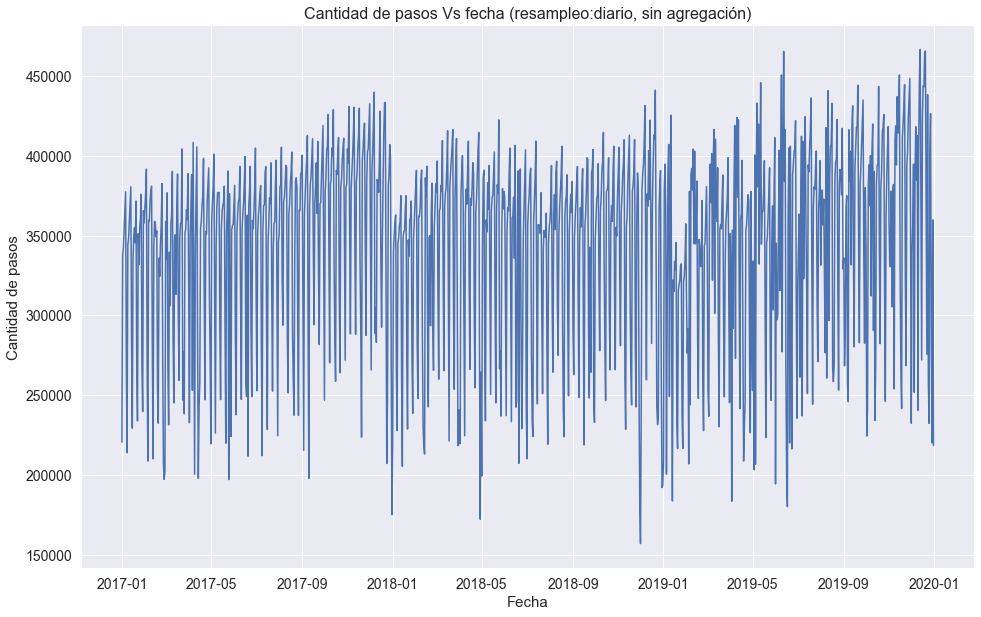

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_analisis, x='fecha', y='cantidad_pasos')

#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo:diario, sin agregación)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

In [ ]:
dataset_analisis.groupby(['periodo']).describe()

cantidad_pasos                                                   \
                 count           mean           std       min       25%   
periodo                                                                   
2017             365.0  342009.457534  59585.887708  174988.0  299491.0   
2018             365.0  337236.082192  60880.603983  156852.0  287589.0   
2019             365.0  347150.835616  66727.276771  180069.0  298206.0   

                                       
              50%       75%       max  
periodo                                
2017     359073.0  383828.0  439981.0  
2018     361381.0  381546.0  441305.0  
2019     363539.0  397094.0  466887.0

<Figure size 720x360 with 0 Axes>

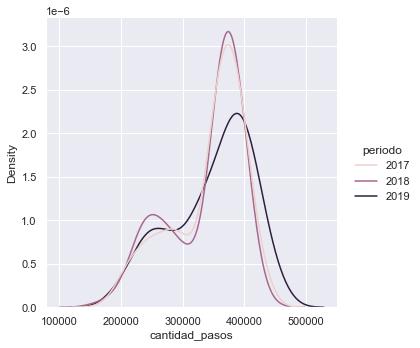

In [ ]:
plt.figure(figsize = (10,5))
sns.displot(data=dataset_analisis , x='cantidad_pasos', hue='periodo', kind="kde")

##### ---> Comportamiento por año

In [ ]:
dataset_analisis=dataset.groupby([dataset.periodo])['cantidad_pasos'].sum().to_frame().reset_index()
dataset_analisis.periodo=dataset_analisis.periodo.astype('str')
dataset_analisis.cantidad_pasos=round(100*(dataset_analisis.cantidad_pasos/dataset_analisis.cantidad_pasos.sum()),1)
dataset_analisis

periodo  cantidad_pasos
0    2017            33.3
1    2018            32.9
2    2019            33.8

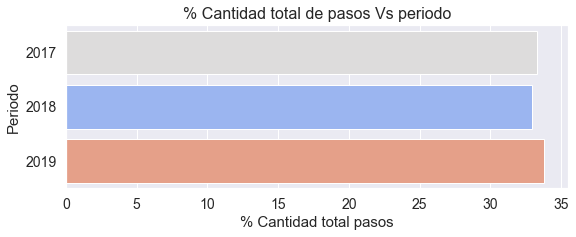

In [ ]:
plt.figure(figsize=(9, 3))
sns.barplot(y="periodo", 
            x="cantidad_pasos", 
            data=dataset_analisis,
            palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm"))
#Formato de la gráfica
plt.title('% Cantidad total de pasos Vs periodo',fontsize=16)
plt.xlabel('% Cantidad total pasos', fontsize=15)
plt.ylabel('Periodo', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

##### ---> Comportamiento por mes

In [ ]:
dataset_analisis=dataset.groupby([dataset.mes])['cantidad_pasos'].sum().to_frame().reset_index()
dataset_analisis.cantidad_pasos=round(100*(dataset_analisis.cantidad_pasos/dataset_analisis.cantidad_pasos.sum()),1)
dataset_analisis

mes  cantidad_pasos
0     1             7.9
1     2             7.3
2     3             8.4
3     4             7.9
4     5             8.4
5     6             8.1
6     7             8.5
7     8             8.7
8     9             8.4
9    10             8.9
10   11             8.7
11   12             8.7

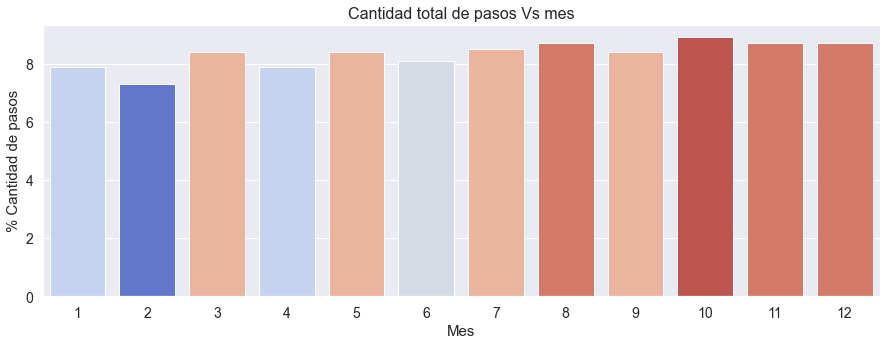

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x="mes", 
            y="cantidad_pasos", 
            data=dataset_analisis,
            palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm"))

#Formato de la gráfica
plt.title('Cantidad total de pasos Vs mes',fontsize=16)
plt.xlabel('Mes', fontsize=15)
plt.ylabel('% Cantidad de pasos', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

In [ ]:
dataset[['mes','cantidad_pasos']].groupby(['mes']).agg({'cantidad_pasos': ['mean', 'sum']})

cantidad_pasos          
              mean       sum
mes                         
1        99.384176  29777785
2       100.708964  27311264
3       104.166938  31642270
4       103.768370  29752986
5       105.683078  31508987
6       104.347550  30197868
7       104.765145  31676894
8       106.867214  32597920
9       107.666747  31656177
10      107.188938  33235002
11      109.625724  32766252
12      107.854285  32511272

##### ---> Comportamiento por dia de la semana

In [ ]:
dataset_analisis=dataset.groupby([dataset.dia_num])['cantidad_pasos'].sum().to_frame().reset_index()
dataset_analisis.cantidad_pasos=round(100*(dataset_analisis.cantidad_pasos/dataset_analisis.cantidad_pasos.sum()),1)
dataset_analisis

dia_num  cantidad_pasos
0        0            14.3
1        1            15.0
2        2            15.4
3        3            15.7
4        4            16.0
5        5            12.7
6        6            10.8

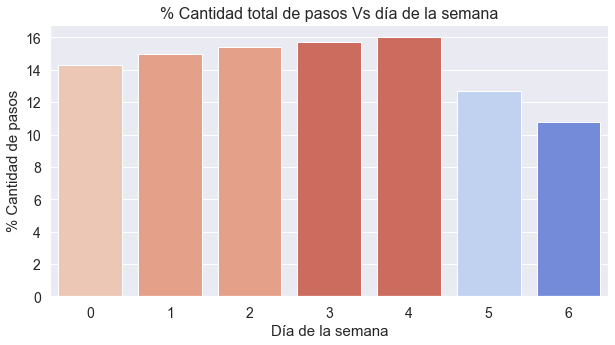

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x="dia_num", 
            y="cantidad_pasos", 
            data=dataset_analisis,
            palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm"))

#Formato de la gráfica
plt.title('% Cantidad total de pasos Vs día de la semana',fontsize=16)
plt.xlabel('Día de la semana', fontsize=15)
plt.ylabel('% Cantidad de pasos', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

##### ---> Comportamiento por hora del dia

In [ ]:
dataset_analisis=dataset.groupby([dataset.hora_fin])['cantidad_pasos'].sum().to_frame().reset_index()
dataset_analisis.cantidad_pasos=round(100*(dataset_analisis.cantidad_pasos/dataset_analisis.cantidad_pasos.sum()),1)
dataset_analisis

hora_fin  cantidad_pasos
0          1             1.6
1          2             1.2
2          3             0.8
3          4             0.7
4          5             0.8
5          6             1.6
6          7             3.4
7          8             5.2
8          9             5.8
9         10             5.6
10        11             5.5
11        12             5.8
12        13             6.1
13        14             6.1
14        15             5.9
15        16             5.9
16        17             6.1
17        18             6.4
18        19             6.4
19        20             5.5
20        21             4.9
21        22             3.8
22        23             2.7
23        24             2.0

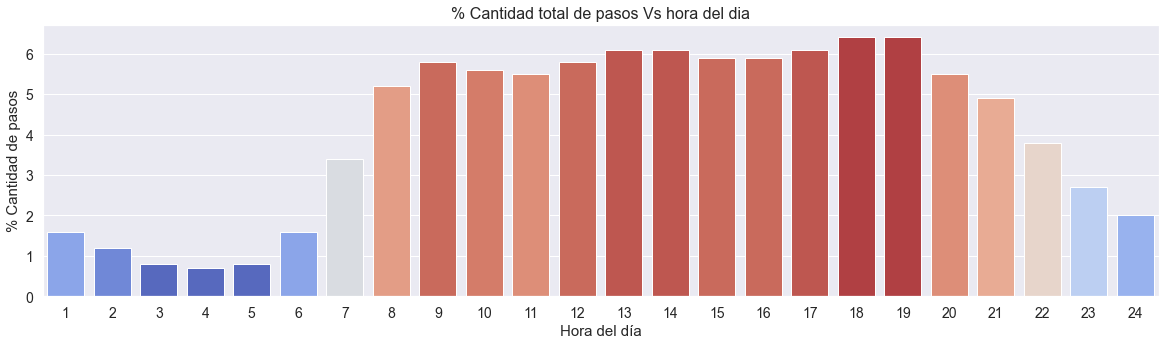

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(x="hora_fin", 
            y="cantidad_pasos", 
            data=dataset_analisis,
            palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm"))

#Formato de la gráfica
plt.title('% Cantidad total de pasos Vs hora del dia',fontsize=16)
plt.xlabel('Hora del día', fontsize=15)
plt.ylabel('% Cantidad de pasos', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

##### ---> Comportamiento por estación

In [ ]:
dataset_analisis=dataset.groupby([dataset.estacion])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='cantidad_pasos', ascending=False)
dataset_analisis.cantidad_pasos=round(100*(dataset_analisis.cantidad_pasos/dataset_analisis.cantidad_pasos.sum()),1)
dataset_analisis

estacion  cantidad_pasos
1  Avellaneda            39.7
3       Illia            27.3
2  Dellepiane            24.0
0     Alberti             4.6
4         PDB             1.5
5      Retiro             1.3
7   Sarmiento             0.9
6    Salguero             0.7

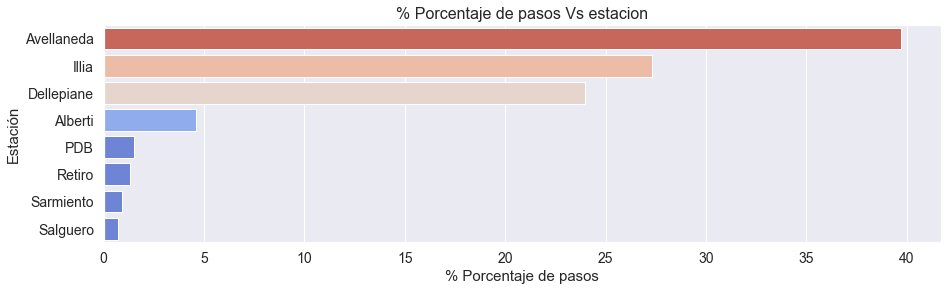

In [ ]:
plt.figure(figsize=(15, 4))
sns.barplot(y="estacion", 
            x="cantidad_pasos", 
            data=dataset_analisis,
            palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm")
            )

#Formato de la gráfica
plt.title('% Porcentaje de pasos Vs estacion',fontsize=16)
plt.xlabel('% Porcentaje de pasos', fontsize=15)
plt.ylabel('Estación', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

##### ---> Comportamiento por sentido

In [ ]:
dataset_analisis=dataset.groupby([dataset.sentido])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='cantidad_pasos', ascending=False)
dataset_analisis.cantidad_pasos=round(100*(dataset_analisis.cantidad_pasos/dataset_analisis.cantidad_pasos.sum()),1)
dataset_analisis

sentido  cantidad_pasos
1  Provincia            51.1
0     Centro            48.9

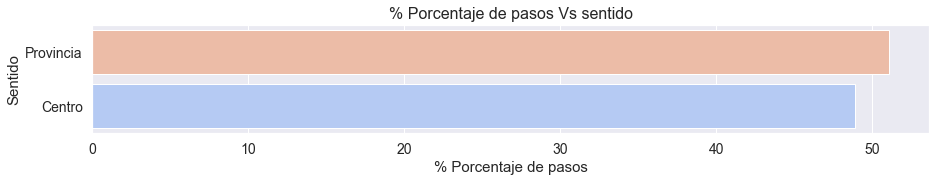

In [ ]:
plt.figure(figsize=(15, 2))
sns.barplot(y="sentido", 
            x="cantidad_pasos", 
            data=dataset_analisis,
            palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm")
            )
plt.title('% Porcentaje de pasos Vs sentido', fontsize=16)
plt.xlabel('% Porcentaje de pasos', fontsize=15)
plt.ylabel('Sentido', fontsize=15)
plt.tick_params(labelsize=14)

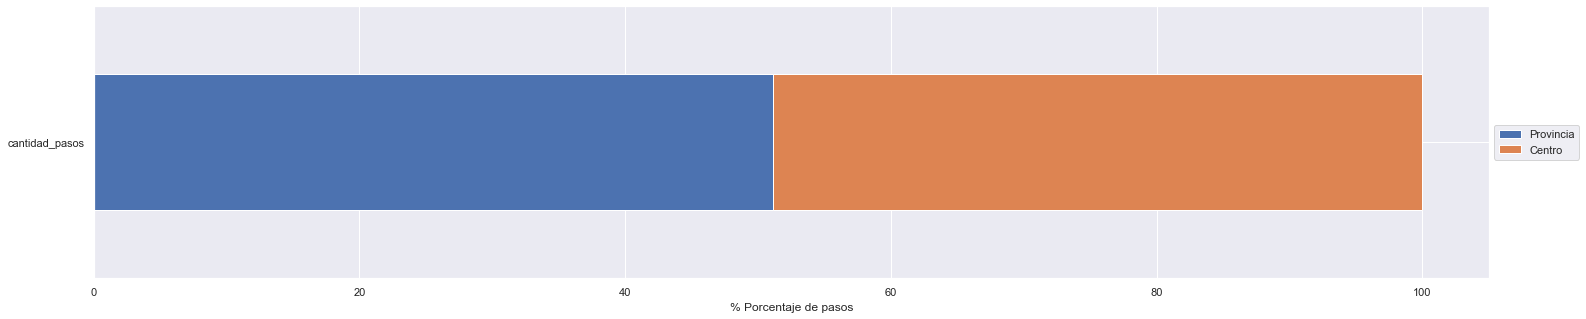

In [ ]:
dataset_analisis.set_index('sentido').T.plot(kind='barh', stacked=True, figsize=(25,5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('% Porcentaje de pasos')
plt.show()

##### ---> Comportamiento por tipo_vehiculo

In [ ]:
dataset_analisis=dataset.groupby([dataset.tipo_vehiculo])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='cantidad_pasos', ascending=False)
dataset_analisis.cantidad_pasos=round(100*(dataset_analisis.cantidad_pasos/dataset_analisis.cantidad_pasos.sum()),1)
dataset_analisis

tipo_vehiculo  cantidad_pasos
0       Liviano            90.3
1        Pesado             9.7

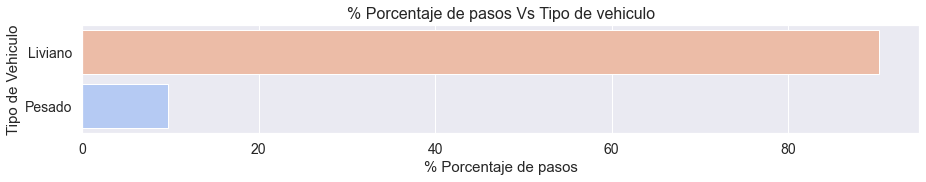

In [ ]:
plt.figure(figsize=(15, 2))
sns.barplot(y="tipo_vehiculo", 
            x="cantidad_pasos", 
            data=dataset_analisis,
            palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm")
            )
plt.title('% Porcentaje de pasos Vs Tipo de vehiculo', fontsize=16)
plt.xlabel('% Porcentaje de pasos', fontsize=15)
plt.ylabel('Tipo de Vehiculo', fontsize=15)
plt.tick_params(labelsize=14)

##### ---> Comportamiento por forma_pago

In [ ]:
dataset_analisis=dataset.groupby([dataset.forma_pago])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='cantidad_pasos', ascending=False)
dataset_analisis.cantidad_pasos=round(100*(dataset_analisis.cantidad_pasos/dataset_analisis.cantidad_pasos.sum()),1)
dataset_analisis

forma_pago  cantidad_pasos
0         EFECTIVO            48.9
5         TELEPASE            43.8
3       NO COBRADO             4.6
1           EXENTO             1.1
4  T. DISCAPACIDAD             0.9
2       INFRACCION             0.7

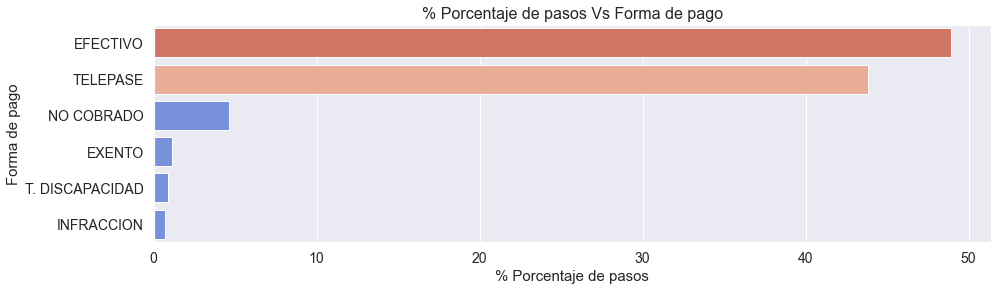

In [ ]:
plt.figure(figsize=(15, 4))
sns.barplot(y="forma_pago", 
            x="cantidad_pasos", 
            data=dataset_analisis,
            palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm")
            )
#Formato de la gráfica
plt.title('% Porcentaje de pasos Vs Forma de pago',fontsize=16)
plt.xlabel('% Porcentaje de pasos', fontsize=15)
plt.ylabel('Forma de pago', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

#### ---> Análisis multivariado

##### ---> Comportamiento: forma_pago Vs perido (implicito cantidad de pasos)

In [ ]:
# Generamos el dataset necesario para el analisis del comportamiento descrito
dataset_analisis=dataset.groupby([dataset.forma_pago, dataset.periodo])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='periodo', ascending=False)
dataset_analisis.periodo=dataset_analisis.periodo.astype('str')
dataset_analisis

forma_pago periodo  cantidad_pasos
17         TELEPASE    2019        63570137
2          EFECTIVO    2019        53621366
5            EXENTO    2019         1310720
8        INFRACCION    2019         1098458
11       NO COBRADO    2019         6267683
14  T. DISCAPACIDAD    2019          841691
13  T. DISCAPACIDAD    2018         1061579
16         TELEPASE    2018        53762646
4            EXENTO    2018         1250522
7        INFRACCION    2018          720296
1          EFECTIVO    2018        60223599
10       NO COBRADO    2018         6072528
15         TELEPASE    2017        46612698
0          EFECTIVO    2017        69502938
12  T. DISCAPACIDAD    2017         1565099
6        INFRACCION    2017          629550
3            EXENTO    2017         1677497
9        NO COBRADO    2017         4845670

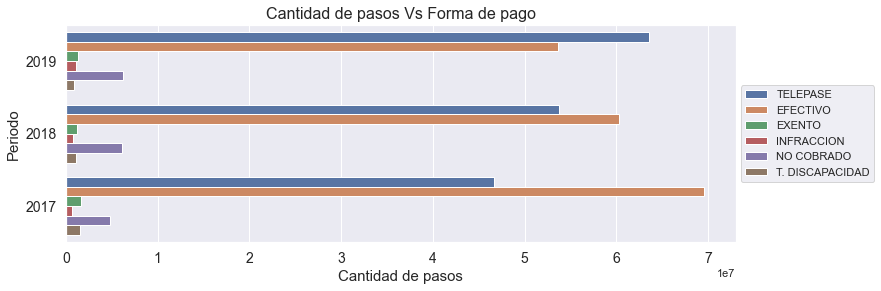

In [ ]:
# Generamos el barplot del comportmiento descrito
plt.figure(figsize=(12, 4))
sns.barplot(y="periodo", 
            x="cantidad_pasos", 
            hue='forma_pago',
            data=dataset_analisis
            )
#Formato de la gráfica
plt.title('Cantidad de pasos Vs Forma de pago',fontsize=16)
plt.xlabel('Cantidad de pasos', fontsize=15)
plt.ylabel('Periodo', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

In [ ]:
# Podemos generar la representación tambien a manera de staked bar, que es lo que haremos en las celdas siguientes
dataset_analisis=dataset.groupby([dataset.forma_pago, dataset.periodo])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='periodo', ascending=False)
dataset_analisis.periodo=dataset_analisis.periodo.astype('str')
dataset_analisis.sort_values(by=['periodo', 'cantidad_pasos'],  ascending=[False,False], inplace=True)
dataset_analisis

forma_pago periodo  cantidad_pasos
17         TELEPASE    2019        63570137
2          EFECTIVO    2019        53621366
11       NO COBRADO    2019         6267683
5            EXENTO    2019         1310720
8        INFRACCION    2019         1098458
14  T. DISCAPACIDAD    2019          841691
1          EFECTIVO    2018        60223599
16         TELEPASE    2018        53762646
10       NO COBRADO    2018         6072528
4            EXENTO    2018         1250522
13  T. DISCAPACIDAD    2018         1061579
7        INFRACCION    2018          720296
0          EFECTIVO    2017        69502938
15         TELEPASE    2017        46612698
9        NO COBRADO    2017         4845670
3            EXENTO    2017         1677497
12  T. DISCAPACIDAD    2017         1565099
6        INFRACCION    2017          629550

In [ ]:
# Debemos hacer un pivot de la tabla para poder generar la grafica tipo stacked bar
dataset_analisis=dataset_analisis.pivot_table(index=["periodo"], 
                    columns='forma_pago', 
                    values='cantidad_pasos')
dataset_analisis

forma_pago  EFECTIVO   EXENTO  INFRACCION  NO COBRADO  T. DISCAPACIDAD  \
periodo                                                                  
2017        69502938  1677497      629550     4845670          1565099   
2018        60223599  1250522      720296     6072528          1061579   
2019        53621366  1310720     1098458     6267683           841691   

forma_pago  TELEPASE  
periodo               
2017        46612698  
2018        53762646  
2019        63570137

In [ ]:
# Dado que queremos observar la grafica de manera porcentual, dividiremos los registros de cada año
# en el total de valores para ese año en especifico
for i in dataset_analisis.index:
    dataset_analisis.loc[i,:]=round(100*(dataset_analisis.loc[i,:]/(dataset_analisis.loc[i,:].sum())),1)
dataset_analisis

forma_pago  EFECTIVO  EXENTO  INFRACCION  NO COBRADO  T. DISCAPACIDAD  \
periodo                                                                 
2017            55.7     1.3         0.5         3.9              1.3   
2018            48.9     1.0         0.6         4.9              0.9   
2019            42.3     1.0         0.9         4.9              0.7   

forma_pago  TELEPASE  
periodo               
2017            37.3  
2018            43.7  
2019            50.2

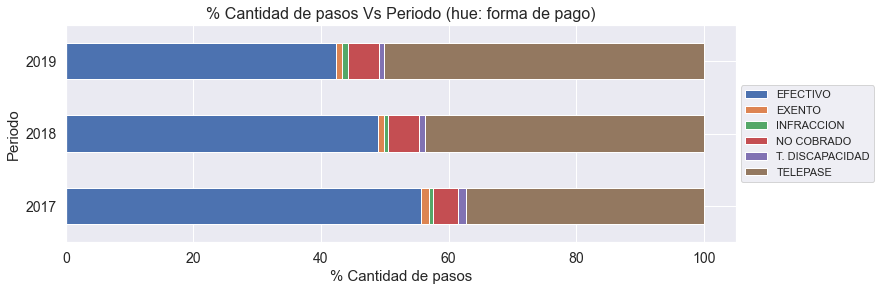

In [ ]:
# Generamos la grafica de tipo stacked bar de manera porcentual
dataset_analisis.plot(kind='barh', stacked=True, figsize=(12,4), legend='False')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#Formato de la gráfica
plt.title('% Cantidad de pasos Vs Periodo (hue: forma de pago)',fontsize=16)
plt.xlabel('% Cantidad de pasos', fontsize=15)
plt.ylabel('Periodo', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()


##### ---> Comportamiento: estacion Vs perido (implicito cantidad de pasos)

In [ ]:
# Podemos generar la representación tambien a manera de staked bar, que es lo que haremos en las celdas siguientes
dataset_analisis=dataset.groupby([dataset.estacion, dataset.periodo])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='periodo', ascending=False)
dataset_analisis.periodo=dataset_analisis.periodo.astype('str')
dataset_analisis.sort_values(by=['periodo', 'cantidad_pasos'],  ascending=[False,False], inplace=True)
dataset_analisis

estacion periodo  cantidad_pasos
5   Avellaneda    2019        48303554
11       Illia    2019        34155159
8   Dellepiane    2019        29295361
12         PDB    2019         5668376
2      Alberti    2019         5631247
21   Sarmiento    2019         1264678
18    Salguero    2019         1221380
15      Retiro    2019         1170300
4   Avellaneda    2018        49652020
10       Illia    2018        34489459
7   Dellepiane    2018        29761251
1      Alberti    2018         5734842
14      Retiro    2018         1398681
20   Sarmiento    2018         1102862
17    Salguero    2018          952055
3   Avellaneda    2017        50811590
9        Illia    2017        33570568
6   Dellepiane    2017        30693934
0      Alberti    2017         5789514
13      Retiro    2017         2352828
19   Sarmiento    2017          998190
16    Salguero    2017          616828

In [ ]:
# Debemos hacer un pivot de la tabla para poder generar la grafica tipo stacked bar
dataset_analisis=dataset_analisis.pivot_table(index=["periodo"], 
                    columns='estacion', 
                    values='cantidad_pasos')
dataset_analisis

estacion    Alberti  Avellaneda  Dellepiane       Illia        PDB     Retiro  \
periodo                                                                         
2017      5789514.0  50811590.0  30693934.0  33570568.0        NaN  2352828.0   
2018      5734842.0  49652020.0  29761251.0  34489459.0        NaN  1398681.0   
2019      5631247.0  48303554.0  29295361.0  34155159.0  5668376.0  1170300.0   

estacion   Salguero  Sarmiento  
periodo                         
2017       616828.0   998190.0  
2018       952055.0  1102862.0  
2019      1221380.0  1264678.0

In [ ]:
# Dado que queremos observar la grafica de manera porcentual, dividiremos los registros de cada año
# en el total de valores para ese año en especifico
for i in dataset_analisis.index:
    dataset_analisis.loc[i,:]=round(100*(dataset_analisis.loc[i,:]/(dataset_analisis.loc[i,:].sum())),1)
dataset_analisis

estacion  Alberti  Avellaneda  Dellepiane  Illia  PDB  Retiro  Salguero  \
periodo                                                                   
2017          4.6        40.7        24.6   26.9  NaN     1.9       0.5   
2018          4.7        40.3        24.2   28.0  NaN     1.1       0.8   
2019          4.4        38.1        23.1   27.0  4.5     0.9       1.0   

estacion  Sarmiento  
periodo              
2017            0.8  
2018            0.9  
2019            1.0

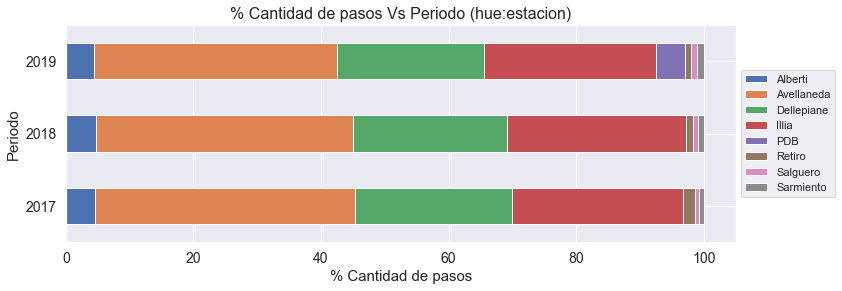

In [ ]:
# Generamos la grafica de tipo stacked bar de manera porcentual
dataset_analisis.plot(kind='barh', stacked=True, figsize=(12,4), legend='False')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('% Cantidad de pasos Vs Periodo (hue:estacion)',fontsize=16)
plt.xlabel('% Cantidad de pasos', fontsize=15)
plt.ylabel('Periodo', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

##### ---> Comportamiento: sentido Vs forma_pago (implicito cantidad de pasos)

In [ ]:
# Podemos generar la representación tambien a manera de staked bar, que es lo que haremos en las celdas siguientes
dataset_analisis=dataset.groupby([dataset.tipo_vehiculo, dataset.forma_pago])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='forma_pago', ascending=False)
dataset_analisis.forma_pago=dataset_analisis.forma_pago.astype('str')
dataset_analisis.sort_values(by=['forma_pago', 'cantidad_pasos'],  ascending=[False,False], inplace=True)
dataset_analisis

tipo_vehiculo       forma_pago  cantidad_pasos
5        Liviano         TELEPASE       140854411
11        Pesado         TELEPASE        23091070
4        Liviano  T. DISCAPACIDAD         3408349
10        Pesado  T. DISCAPACIDAD           60020
3        Liviano       NO COBRADO        15346681
9         Pesado       NO COBRADO         1839200
2        Liviano       INFRACCION         1844773
8         Pesado       INFRACCION          603531
1        Liviano           EXENTO         3166414
7         Pesado           EXENTO         1072325
0        Liviano         EFECTIVO       173541605
6         Pesado         EFECTIVO         9806298

In [ ]:
# Debemos hacer un pivot de la tabla para poder generar la grafica tipo stacked bar
dataset_analisis=dataset_analisis.pivot_table(index=["forma_pago"], 
                    columns='tipo_vehiculo', 
                    values='cantidad_pasos')
dataset_analisis

tipo_vehiculo      Liviano    Pesado
forma_pago                          
EFECTIVO         173541605   9806298
EXENTO             3166414   1072325
INFRACCION         1844773    603531
NO COBRADO        15346681   1839200
T. DISCAPACIDAD    3408349     60020
TELEPASE         140854411  23091070

In [ ]:
# Dado que queremos observar la grafica de manera porcentual, dividiremos los registros de cada año
# en el total de valores para ese año en especifico
for i in dataset_analisis.index:
    dataset_analisis.loc[i,:]=round(100*(dataset_analisis.loc[i,:]/(dataset_analisis.loc[i,:].sum())),1)
dataset_analisis

tipo_vehiculo    Liviano  Pesado
forma_pago                      
EFECTIVO            94.7     5.3
EXENTO              74.7    25.3
INFRACCION          75.3    24.7
NO COBRADO          89.3    10.7
T. DISCAPACIDAD     98.3     1.7
TELEPASE            85.9    14.1

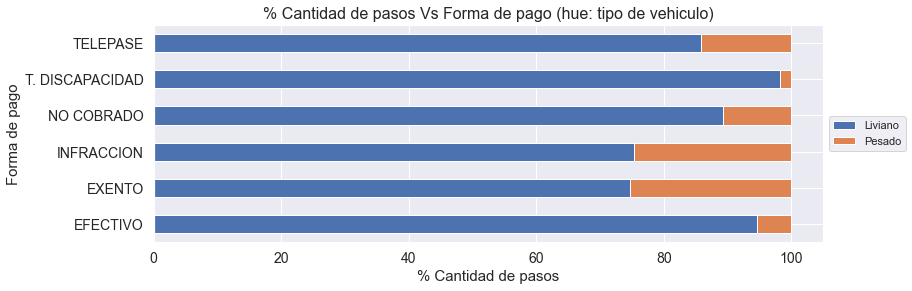

In [ ]:
# Generamos la grafica de tipo stacked bar de manera porcentual
dataset_analisis.plot(kind='barh', stacked=True, figsize=(12,4), legend='False')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#Formato de la gráfica
plt.title('% Cantidad de pasos Vs Forma de pago (hue: tipo de vehiculo)',fontsize=16)
plt.xlabel('% Cantidad de pasos', fontsize=15)
plt.ylabel('Forma de pago', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

##### ---> Comportamiento: tipo_vehiculo Vs estacion (implicito cantidad de pasos)

In [ ]:
# Podemos generar la representación tambien a manera de staked bar, que es lo que haremos en las celdas siguientes
dataset_analisis=dataset.groupby([dataset.tipo_vehiculo, dataset.estacion])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='estacion', ascending=False)
dataset_analisis.forma_pago=dataset_analisis.estacion.astype('str')
dataset_analisis.sort_values(by=['estacion', 'cantidad_pasos'],  ascending=[False,False], inplace=True)
dataset_analisis

tipo_vehiculo    estacion  cantidad_pasos
7        Liviano   Sarmiento         3315343
15        Pesado   Sarmiento           50387
6        Liviano    Salguero         2723682
14        Pesado    Salguero           66581
5        Liviano      Retiro         2886954
13        Pesado      Retiro         2034855
12        Pesado         PDB         4777445
4        Liviano         PDB          890931
3        Liviano       Illia        98218763
11        Pesado       Illia         3996423
2        Liviano  Dellepiane        80467381
10        Pesado  Dellepiane         9283165
1        Liviano  Avellaneda       133116334
9         Pesado  Avellaneda        15650830
0        Liviano     Alberti        16542845
8         Pesado     Alberti          612758

In [ ]:
# Debemos hacer un pivot de la tabla para poder generar la grafica tipo stacked bar
dataset_analisis=dataset_analisis.pivot_table(index=["estacion"], 
                    columns='tipo_vehiculo', 
                    values='cantidad_pasos')
dataset_analisis

tipo_vehiculo    Liviano    Pesado
estacion                          
Alberti         16542845    612758
Avellaneda     133116334  15650830
Dellepiane      80467381   9283165
Illia           98218763   3996423
PDB               890931   4777445
Retiro           2886954   2034855
Salguero         2723682     66581
Sarmiento        3315343     50387

In [ ]:
# Dado que queremos observar la grafica de manera porcentual, dividiremos los registros de cada año
# en el total de valores para ese año en especifico
for i in dataset_analisis.index:
    dataset_analisis.loc[i,:]=round(100*(dataset_analisis.loc[i,:]/(dataset_analisis.loc[i,:].sum())),1)
dataset_analisis

tipo_vehiculo  Liviano  Pesado
estacion                      
Alberti           96.4     3.6
Avellaneda        89.5    10.5
Dellepiane        89.7    10.3
Illia             96.1     3.9
PDB               15.7    84.3
Retiro            58.7    41.3
Salguero          97.6     2.4
Sarmiento         98.5     1.5

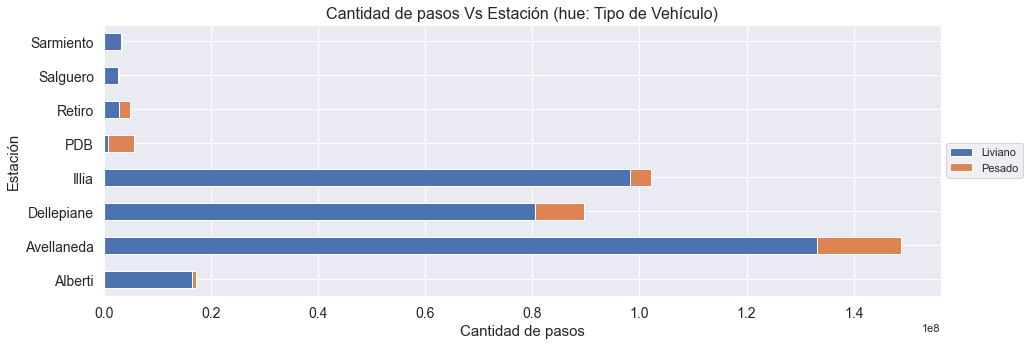

In [ ]:
# Generamos la grafica de tipo stacked bar de manera porcentual
dataset_analisis.plot(kind='barh', stacked=True, figsize=(15,5), legend='False')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#Formato de la gráfica
plt.title('Cantidad de pasos Vs Estación (hue: Tipo de Vehículo)',fontsize=16)
plt.xlabel('Cantidad de pasos', fontsize=15)
plt.ylabel('Estación', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

##### ---> Comportamiento: cantidad_pasos Vs hora (implicito periodo)

In [ ]:
dataset_analisis=dataset.groupby([dataset.periodo,dataset.hora_fin])['cantidad_pasos'].sum().to_frame().reset_index()
dataset_analisis

periodo  hora_fin  cantidad_pasos
0      2017         1         2012805
1      2017         2         1494631
2      2017         3         1035795
3      2017         4          806483
4      2017         5          974348
..      ...       ...             ...
67     2019        20         6905351
68     2019        21         6056895
69     2019        22         4714698
70     2019        23         3373187
71     2019        24         2509700

[72 rows x 3 columns]

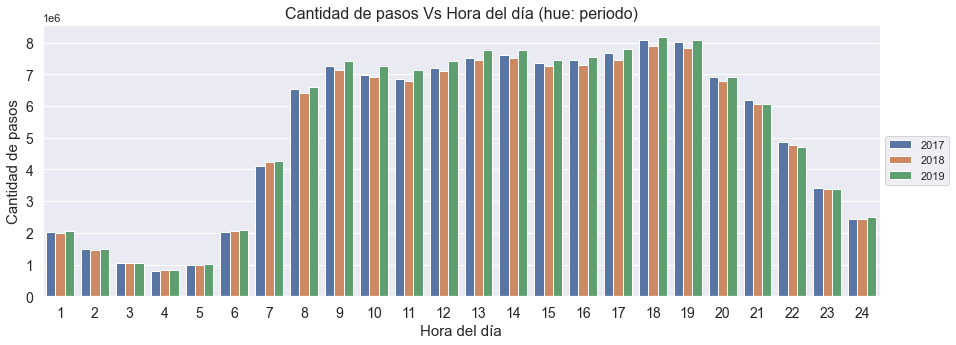

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x="hora_fin", 
            y="cantidad_pasos", 
            hue='periodo',
            data=dataset_analisis,
            #palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm")
            )
#Formato de la gráfica
plt.title('Cantidad de pasos Vs Hora del día (hue: periodo)',fontsize=16)
plt.xlabel('Hora del día', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

##### ---> Comportamiento: cantidad_pasos Vs hora (sentido)

In [ ]:
dataset_analisis=dataset.groupby([dataset.sentido,dataset.hora_fin])['cantidad_pasos'].sum().to_frame().reset_index()
dataset_analisis

sentido  hora_fin  cantidad_pasos
0      Centro         1         2538398
1      Centro         2         1906822
2      Centro         3         1355127
3      Centro         4         1090446
4      Centro         5         1505996
5      Centro         6         3669604
6      Centro         7         7918303
7      Centro         8        11801840
8      Centro         9        12434486
9      Centro        10        11761049
10     Centro        11        11216041
11     Centro        12        11149699
12     Centro        13        10992989
13     Centro        14        10934620
14     Centro        15        10062028
15     Centro        16         9742806
16     Centro        17         9946185
17     Centro        18        10819039
18     Centro        19        10695834
19     Centro        20         9075879
20     Centro        21         8151093
21     Centro        22         6524699
22     Centro        23         4498188
23     Centro        24         3309407
24  Provincia         1         3549782
25  Provincia         2         2547413
26  Provincia         3         1775642
27  Provincia         4         1363733
28  Provincia         5         1461937
29  Provincia         6         2489953
30  Provincia         7         4716783
31  Provincia         8         7749275
32  Provincia         9         9373258
33  Provincia        10         9379367
34  Provincia        11         9561913
35  Provincia        12        10552245
36  Provincia        13        11723058
37  Provincia        14        11961724
38  Provincia        15        11975200
39  Provincia        16        12544642
40  Provincia        17        12983210
41  Provincia        18        13330136
42  Provincia        19        13223164
43  Provincia        20        11539726
44  Provincia        21        10146678
45  Provincia        22         7810113
46  Provincia        23         5685746
47  Provincia        24         4089401

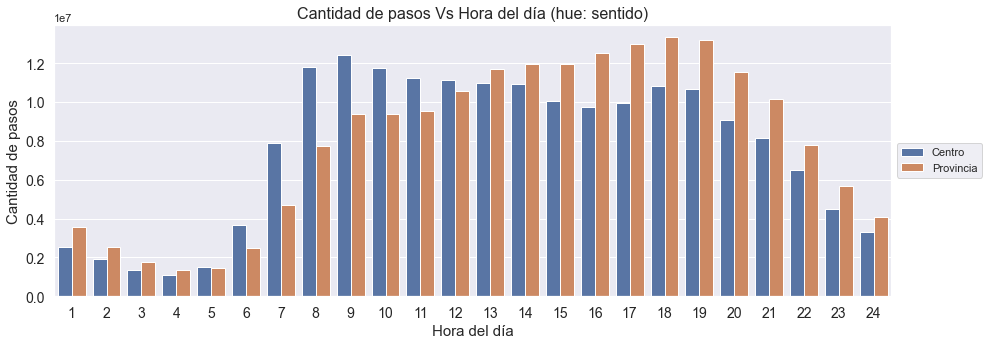

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x="hora_fin", 
            y="cantidad_pasos", 
            hue='sentido',
            data=dataset_analisis,
            #palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm")
            )
plt.title('Cantidad de pasos Vs Hora del día (hue: sentido)',fontsize=16)
plt.xlabel('Hora del día', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

##### ---> Comportamientos temporales: cantidad_paso Vs fecha (implicito forma_pago)

##### Sin agregación por fecha

In [ ]:
dataset

fecha_comp      fecha  periodo  mes  hora_inicio  hora_fin  \
0      2017-01-01 01:00:00 2017-01-01     2017    1            0         1   
1      2017-01-01 01:00:00 2017-01-01     2017    1            0         1   
2      2017-01-01 02:00:00 2017-01-01     2017    1            1         2   
3      2017-01-01 02:00:00 2017-01-01     2017    1            1         2   
4      2017-01-01 02:00:00 2017-01-01     2017    1            1         2   
...                    ...        ...      ...  ...          ...       ...   
812148 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812149 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812150 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812151 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   
812152 2020-01-01 00:00:00 2019-12-31     2019   12           23        24   

            dia  dia_num   estacion    sentido tipo_vehiculo  forma_pago  \
0       Domingo        6    Alberti     Centro       Liviano  NO COBRADO   
1       Domingo        6    Alberti     Centro       Liviano    TELEPASE   
2       Domingo        6    Alberti     Centro       Liviano  NO COBRADO   
3       Domingo        6    Alberti     Centro       Liviano    EFECTIVO   
4       Domingo        6    Alberti     Centro       Liviano    EFECTIVO   
...         ...      ...        ...        ...           ...         ...   
812148   Martes        1   Salguero  Provincia       Liviano  NO COBRADO   
812149   Martes        1   Salguero  Provincia       Liviano    TELEPASE   
812150   Martes        1   Salguero  Provincia        Pesado  NO COBRADO   
812151   Martes        1  Sarmiento  Provincia       Liviano  NO COBRADO   
812152   Martes        1  Sarmiento  Provincia       Liviano    TELEPASE   

        cantidad_pasos  
0                   25  
1                    7  
2                    5  
3                    2  
4                   94  
...                ...  
812148               7  
812149               4  
812150               1  
812151               7  
812152               7  

[3560648 rows x 13 columns]

<AxesSubplot:xlabel='fecha', ylabel='cantidad_pasos'>

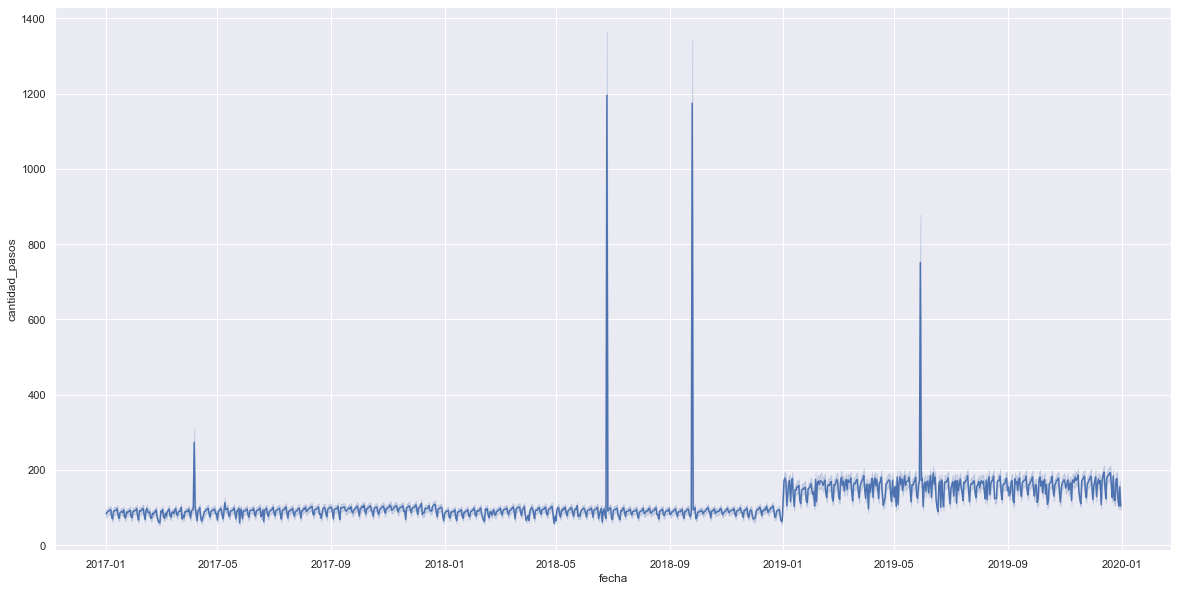

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=dataset, x='fecha', y='cantidad_pasos')

<AxesSubplot:xlabel='fecha', ylabel='cantidad_pasos'>

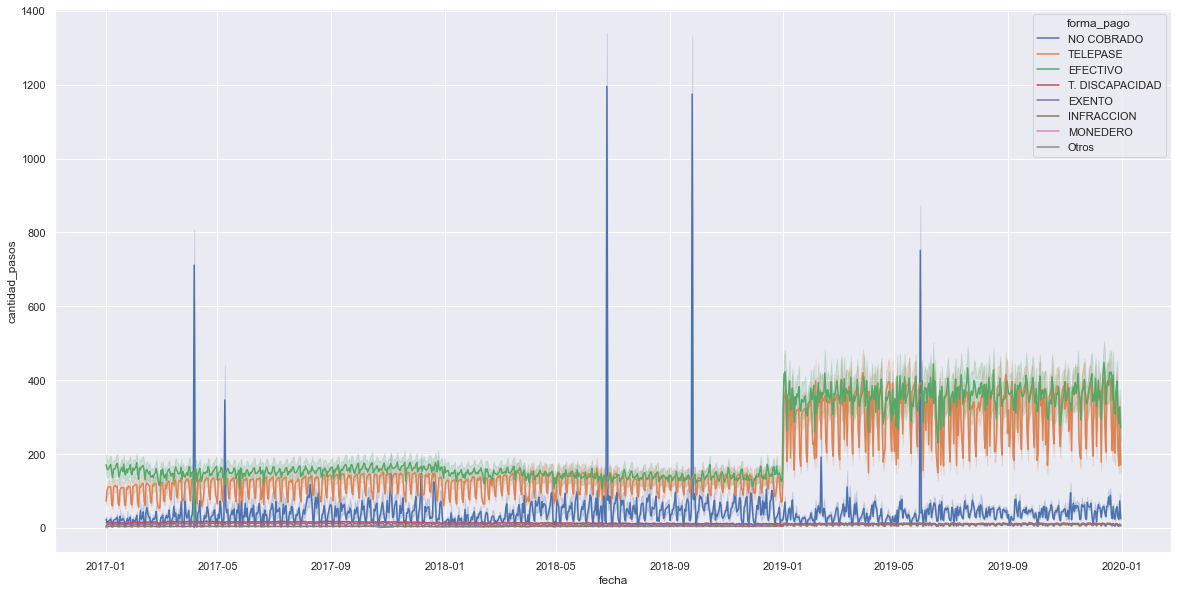

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=dataset, x='fecha', y='cantidad_pasos', hue="forma_pago")

##### Agragados por día

In [ ]:
dataset_analisis =  dataset[['fecha','periodo','cantidad_pasos']]\
        .groupby([pd.Grouper(key= 'fecha', freq='D'), 'periodo'])\
        .sum().reset_index()
dataset_analisis

fecha  periodo  cantidad_pasos
0    2017-01-01     2017          220442
1    2017-01-02     2017          337387
2    2017-01-03     2017          342933
3    2017-01-04     2017          355057
4    2017-01-05     2017          367739
...         ...      ...             ...
1090 2019-12-27     2019          426490
1091 2019-12-28     2019          282127
1092 2019-12-29     2019          220000
1093 2019-12-30     2019          359913
1094 2019-12-31     2019          218379

[1095 rows x 3 columns]

In [ ]:
dataset_analisis[['cantidad_pasos']].describe()

cantidad_pasos
count     1095.000000
mean    342132.125114
std      62549.360309
min     156852.000000
25%     293376.000000
50%     361423.000000
75%     388229.000000
max     466887.000000

In [ ]:
dataset_analisis.groupby('periodo').describe()

cantidad_pasos                                                   \
                 count           mean           std       min       25%   
periodo                                                                   
2017             365.0  342009.457534  59585.887708  174988.0  299491.0   
2018             365.0  337236.082192  60880.603983  156852.0  287589.0   
2019             365.0  347150.835616  66727.276771  180069.0  298206.0   

                                       
              50%       75%       max  
periodo                                
2017     359073.0  383828.0  439981.0  
2018     361381.0  381546.0  441305.0  
2019     363539.0  397094.0  466887.0

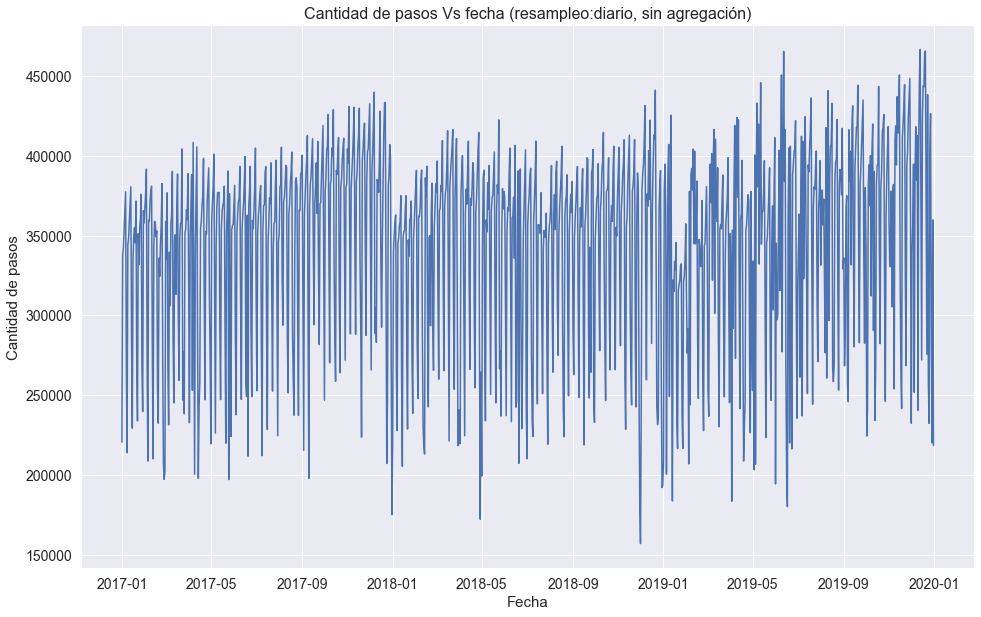

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_analisis, x='fecha', y='cantidad_pasos')

#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo:diario, sin agregación)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

<Figure size 720x360 with 0 Axes>

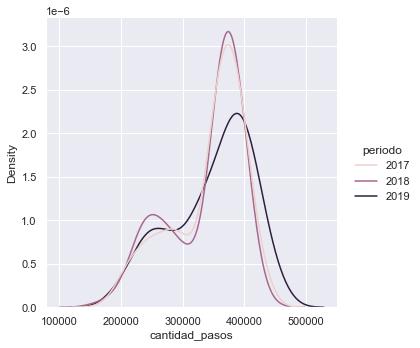

In [ ]:
plt.figure(figsize = (10,5))
sns.displot(data=dataset_analisis , x='cantidad_pasos', hue='periodo', kind="kde")

##### Agragados por semana

In [ ]:
dataset_analisis =  dataset[['fecha','periodo','cantidad_pasos']]\
        .groupby([pd.Grouper(key= 'fecha', freq='W'), 'periodo'])\
        .sum().reset_index()
dataset_analisis

fecha  periodo  cantidad_pasos
0   2017-01-01     2017          220442
1   2017-01-08     2017         2260581
2   2017-01-15     2017         2314268
3   2017-01-22     2017         2257919
4   2017-01-29     2017         2282364
..         ...      ...             ...
154 2019-12-08     2019         2533762
155 2019-12-15     2019         2613146
156 2019-12-22     2019         2882347
157 2019-12-29     2019         2259814
158 2020-01-05     2019          578292

[159 rows x 3 columns]

In [ ]:
dataset_analisis[['cantidad_pasos']].describe()

cantidad_pasos
count    1.590000e+02
mean     2.356193e+06
std      3.282608e+05
min      1.933550e+05
25%      2.277865e+06
50%      2.392401e+06
75%      2.500012e+06
max      2.882347e+06

In [ ]:
dataset_analisis.groupby('periodo').describe()

cantidad_pasos                                                    \
                 count          mean            std       min        25%   
periodo                                                                    
2017              53.0  2.355348e+06  332977.628562  220442.0  2271255.0   
2018              53.0  2.322475e+06  328023.094167  193355.0  2273366.0   
2019              53.0  2.390756e+06  326434.524579  578292.0  2311791.0   

                                          
               50%        75%        max  
periodo                                   
2017     2382623.0  2492836.0  2653142.0  
2018     2391074.0  2456470.0  2608145.0  
2019     2440537.0  2573575.0  2882347.0

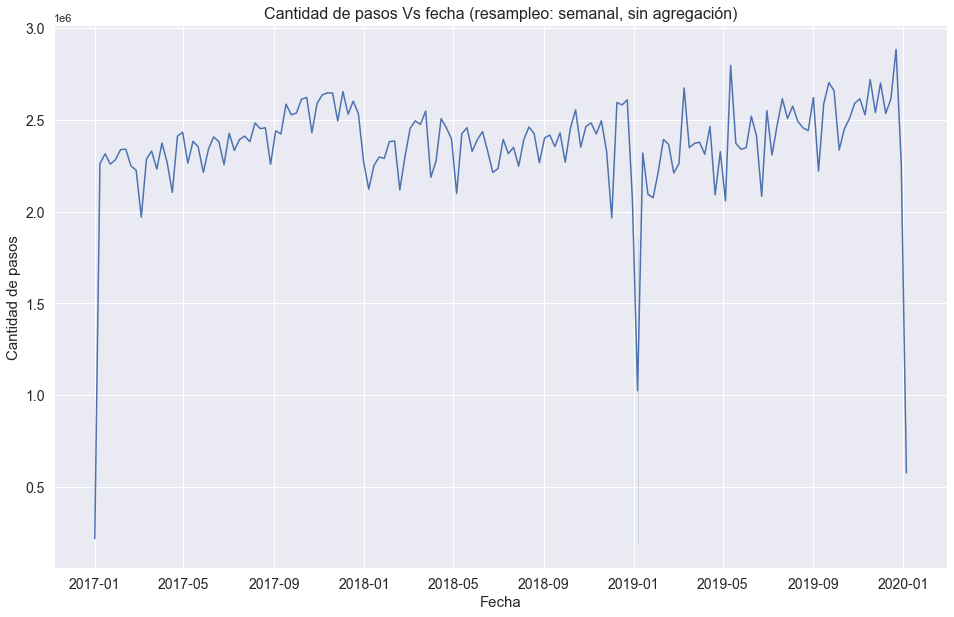

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_analisis, x='fecha', y='cantidad_pasos')

#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo: semanal, sin agregación)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

<Figure size 720x360 with 0 Axes>

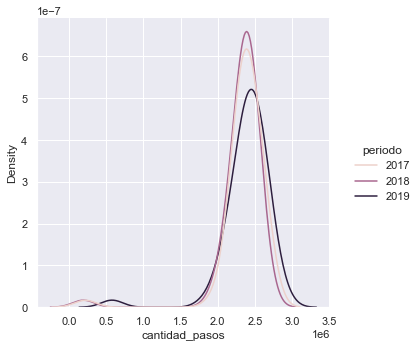

In [ ]:
plt.figure(figsize = (10,5))
sns.displot(data=dataset_analisis , x='cantidad_pasos', hue='periodo', kind="kde")

##### Agragados por mes

In [ ]:
dataset_analisis =  dataset[['fecha','periodo','cantidad_pasos']]\
        .groupby([pd.Grouper(key= 'fecha', freq='MS'), 'periodo'])\
        .sum().reset_index()
dataset_analisis

fecha  periodo  cantidad_pasos
0  2017-01-01     2017        10059282
1  2017-02-01     2017         8825599
2  2017-03-01     2017        10237044
3  2017-04-01     2017         9764941
4  2017-05-01     2017        10279229
5  2017-06-01     2017        10181601
6  2017-07-01     2017        10421643
7  2017-08-01     2017        10810670
8  2017-09-01     2017        10752454
9  2017-10-01     2017        11259140
10 2017-11-01     2017        11264358
11 2017-12-01     2017        10977491
12 2018-01-01     2018        10037441
13 2018-02-01     2018         9206000
14 2018-03-01     2018        10809046
15 2018-04-01     2018        10135667
16 2018-05-01     2018        10518753
17 2018-06-01     2018         9914701
18 2018-07-01     2018        10215822
19 2018-08-01     2018        10683620
20 2018-09-01     2018        10023512
21 2018-10-01     2018        10900036
22 2018-11-01     2018        10212539
23 2018-12-01     2018        10434033
24 2019-01-01     2019         9681062
25 2019-02-01     2019         9279665
26 2019-03-01     2019        10596180
27 2019-04-01     2019         9852378
28 2019-05-01     2019        10711005
29 2019-06-01     2019        10101566
30 2019-07-01     2019        11039429
31 2019-08-01     2019        11103630
32 2019-09-01     2019        10880211
33 2019-10-01     2019        11075826
34 2019-11-01     2019        11289355
35 2019-12-01     2019        11099748

In [ ]:
dataset_analisis[['cantidad_pasos']].describe()

cantidad_pasos
count    3.600000e+01
mean     1.040652e+07
std      6.083218e+05
min      8.825599e+06
25%      1.005382e+07
50%      1.042784e+07
75%      1.088517e+07
max      1.128936e+07

In [ ]:
dataset_analisis.groupby('periodo').describe()

cantidad_pasos                                                       \
                 count          mean            std        min          25%   
periodo                                                                       
2017              12.0  1.040279e+07  687482.006222  8825599.0  10151021.25   
2018              12.0  1.025760e+07  461518.467173  9206000.0  10033958.75   
2019              12.0  1.055917e+07  664972.146859  9279665.0  10039269.00   

                                              
                50%          75%         max  
periodo                                       
2017     10350436.0  10852375.25  11264358.0  
2018     10214180.5  10559969.75  10900036.0  
2019     10795608.0  11081806.50  11289355.0

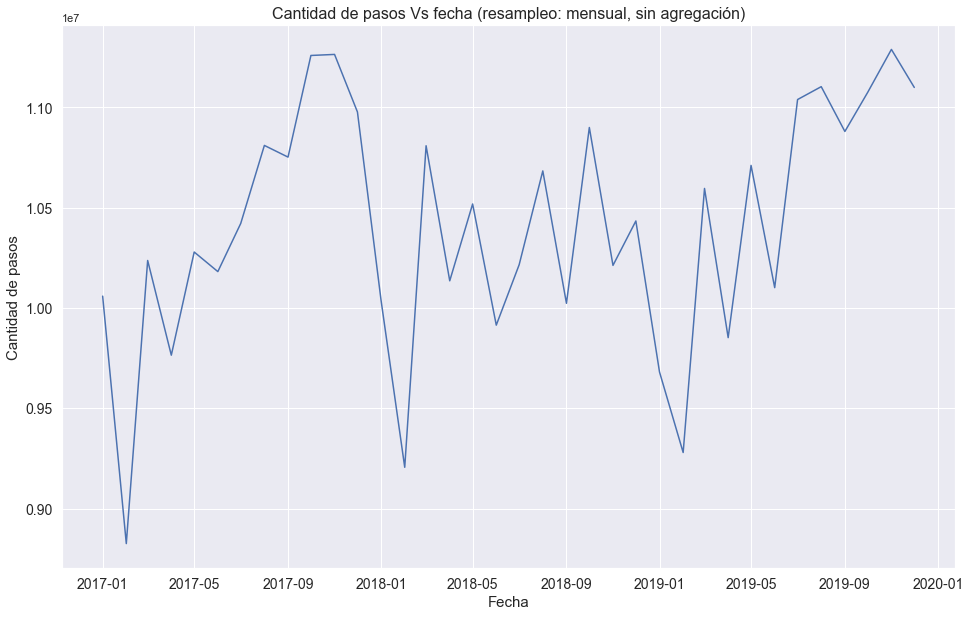

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_analisis, x='fecha', y='cantidad_pasos')

#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo: mensual, sin agregación)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

<Figure size 720x360 with 0 Axes>

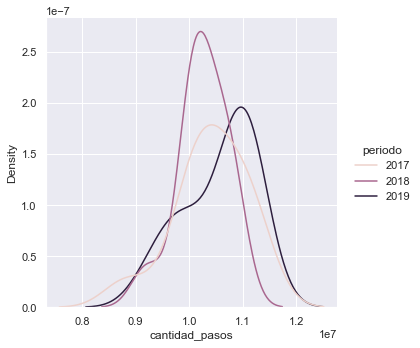

In [ ]:
plt.figure(figsize = (10,5))
sns.displot(data=dataset_analisis , x='cantidad_pasos', hue='periodo', kind="kde")

### Multivariado - forma de pago

##### ---> Resampleo diario

In [ ]:
dataset_analisis =  dataset[['fecha','periodo','forma_pago','cantidad_pasos']]\
        .groupby([pd.Grouper(key= 'fecha', freq='D'), 'periodo','forma_pago'])\
        .sum().reset_index()
dataset_analisis

fecha  periodo       forma_pago  cantidad_pasos
0    2017-01-01     2017         EFECTIVO          157472
1    2017-01-01     2017           EXENTO            1638
2    2017-01-01     2017       INFRACCION             670
3    2017-01-01     2017       NO COBRADO            5756
4    2017-01-01     2017  T. DISCAPACIDAD            2982
...         ...      ...              ...             ...
6548 2019-12-31     2019           EXENTO            1817
6549 2019-12-31     2019       INFRACCION            1902
6550 2019-12-31     2019       NO COBRADO           10375
6551 2019-12-31     2019  T. DISCAPACIDAD            1334
6552 2019-12-31     2019         TELEPASE           98603

[6553 rows x 4 columns]

In [ ]:
dataset_analisis[['cantidad_pasos']].describe()

cantidad_pasos
count     1095.000000
mean    342132.125114
std      62549.360309
min     156852.000000
25%     293376.000000
50%     361423.000000
75%     388229.000000
max     466887.000000

In [ ]:
dataset_analisis.groupby(['forma_pago','periodo']).describe()

cantidad_pasos                                        \
                                 count           mean           std      min   
forma_pago      periodo                                                        
EFECTIVO        2017             365.0  190419.008219  23131.664203     48.0   
                2018             363.0  165905.231405  19699.905076  87321.0   
                2019             364.0  147311.445055  15923.459468  88581.0   
EXENTO          2017             365.0    4595.882192   1625.078710      1.0   
                2018             363.0    3444.964187   1108.565454   1332.0   
                2019             364.0    3600.879121   1142.542567   1396.0   
INFRACCION      2017             364.0    1729.532967    500.653195    643.0   
                2018             363.0    1984.286501    518.314364    732.0   
                2019             364.0    3017.741758    652.394449   1324.0   
NO COBRADO      2017             365.0   13275.808219  14172.860130   1785.0   
                2018             365.0   16637.063014  20932.145077   1674.0   
                2019             365.0   17171.734247  17890.178470   2585.0   
T. DISCAPACIDAD 2017             364.0    4299.722527    661.242759   2147.0   
                2018             363.0    2924.460055    474.627863   1240.0   
                2019             364.0    2312.337912    341.827432   1248.0   
TELEPASE        2017             365.0  127706.021918  36027.863123  49547.0   
                2018             363.0  148106.462810  39415.708444  61379.0   
                2019             364.0  174643.233516  46616.531859  69624.0   

                                                                   
                               25%       50%        75%       max  
forma_pago      periodo                                            
EFECTIVO        2017     182460.00  193584.0  204371.00  234908.0  
                2018     155405.50  166053.0  178761.50  211039.0  
                2019     139588.25  149012.5  156786.00  184652.0  
EXENTO          2017       2863.00    5243.0    5939.00    7458.0  
                2018       2173.50    4019.0    4257.00    6228.0  
                2019       2335.75    4161.5    4448.75    5527.0  
INFRACCION      2017       1223.00    1959.0    2089.00    2588.0  
                2018       1543.00    2081.0    2390.50    3231.0  
                2019       2509.75    3206.0    3525.25    4124.0  
NO COBRADO      2017       5500.00   11118.0   17603.00  203456.0  
                2018       6710.00   14282.0   22587.00  273787.0  
                2019       9219.00   13348.0   22839.00  303470.0  
T. DISCAPACIDAD 2017       3825.75    4493.5    4839.50    5289.0  
                2018       2632.00    2951.0    3281.00    3806.0  
                2019       2077.50    2379.5    2566.75    2943.0  
TELEPASE        2017      95091.00  144164.0  155668.00  176709.0  
                2018     110312.50  166501.0  179202.50  197787.0  
                2019     132454.00  188982.5  214376.00  246502.0

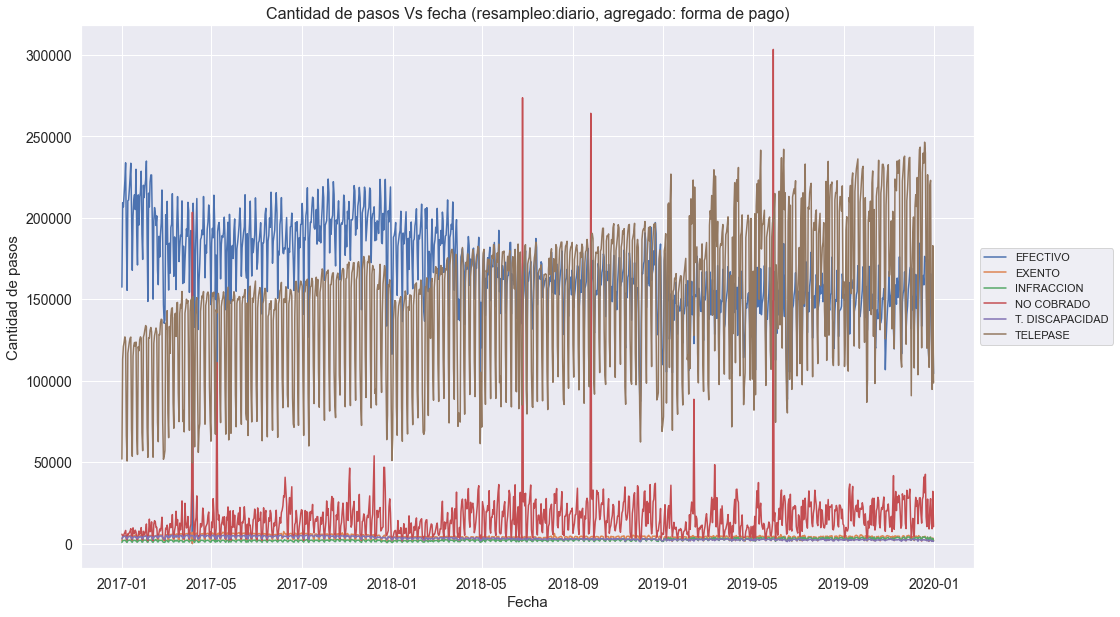

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_analisis, x='fecha', y='cantidad_pasos', hue='forma_pago')

#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo:diario, agregado: forma de pago)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

##### ---> Resampleo semanal

In [ ]:
dataset_analisis =  dataset[['fecha','periodo','forma_pago','cantidad_pasos']]\
        .groupby([pd.Grouper(key= 'fecha', freq='W'), 'periodo','forma_pago'])\
        .sum().reset_index()
dataset_analisis

fecha  periodo       forma_pago  cantidad_pasos
0   2017-01-01     2017         EFECTIVO          157472
1   2017-01-01     2017           EXENTO            1638
2   2017-01-01     2017       INFRACCION             670
3   2017-01-01     2017       NO COBRADO            5756
4   2017-01-01     2017  T. DISCAPACIDAD            2982
..         ...      ...              ...             ...
949 2020-01-05     2019           EXENTO            5286
950 2020-01-05     2019       INFRACCION            5035
951 2020-01-05     2019       NO COBRADO           42468
952 2020-01-05     2019  T. DISCAPACIDAD            3103
953 2020-01-05     2019         TELEPASE          281529

[954 rows x 4 columns]

In [ ]:
dataset_analisis[['cantidad_pasos']].describe()

cantidad_pasos
count     1095.000000
mean    342132.125114
std      62549.360309
min     156852.000000
25%     293376.000000
50%     361423.000000
75%     388229.000000
max     466887.000000

In [ ]:
dataset_analisis.groupby(['forma_pago','periodo']).describe()

cantidad_pasos                                         \
                                 count          mean            std       min   
forma_pago      periodo                                                         
EFECTIVO        2017              53.0  1.311376e+06  177839.177724  157472.0   
                2018              53.0  1.136294e+06  172216.119882  109867.0   
                2019              53.0  1.011724e+06  119298.379352  240871.0   
EXENTO          2017              53.0  3.165089e+04    5461.474729    1638.0   
                2018              53.0  2.359475e+04    3698.950116    1912.0   
                2019              53.0  2.473057e+04    3832.595262    5286.0   
INFRACCION      2017              53.0  1.187830e+04    1889.142455     670.0   
                2018              53.0  1.359049e+04    2568.532959    1388.0   
                2019              53.0  2.072562e+04    3051.235508    5035.0   
NO COBRADO      2017              53.0  9.142774e+04   45110.287493    5756.0   
                2018              53.0  1.145760e+05   63992.385984    5814.0   
                2019              53.0  1.182582e+05   52160.945342   42468.0   
T. DISCAPACIDAD 2017              53.0  2.953017e+04    4309.338151    2982.0   
                2018              53.0  2.002979e+04    3328.980032    1598.0   
                2019              53.0  1.588096e+04    2110.980359    3103.0   
TELEPASE        2017              53.0  8.794849e+05  149791.301654   51924.0   
                2018              53.0  1.014390e+06  167096.779078   72776.0   
                2019              53.0  1.199437e+06  190685.503603  281529.0   

                                                                     
                               25%        50%        75%        max  
forma_pago      periodo                                              
EFECTIVO        2017     1280462.0  1327848.0  1388160.0  1468278.0  
                2018     1108643.0  1143234.0  1215682.0  1315272.0  
                2019     1004718.0  1029880.0  1056881.0  1146883.0  
EXENTO          2017       28818.0    32925.0    34693.0    37705.0  
                2018       22508.0    24325.0    25353.0    27966.0  
                2019       23375.0    25183.0    26473.0    31474.0  
INFRACCION      2017       11598.0    12211.0    12679.0    14358.0  
                2018       12535.0    13767.0    15213.0    17773.0  
                2019       19542.0    21270.0    22581.0    25235.0  
NO COBRADO      2017       72238.0    84815.0   100593.0   301947.0  
                2018       85489.0   109258.0   129262.0   390385.0  
                2019       76771.0   126381.0   141195.0   369017.0  
T. DISCAPACIDAD 2017       28342.0    30496.0    31465.0    33014.0  
                2018       19269.0    20040.0    22044.0    24023.0  
                2019       15335.0    16183.0    17003.0    18224.0  
TELEPASE        2017      829802.0   915602.0   960410.0  1056733.0  
                2018      948334.0  1054663.0  1103902.0  1188376.0  
                2019     1120587.0  1224162.0  1310210.0  1472070.0

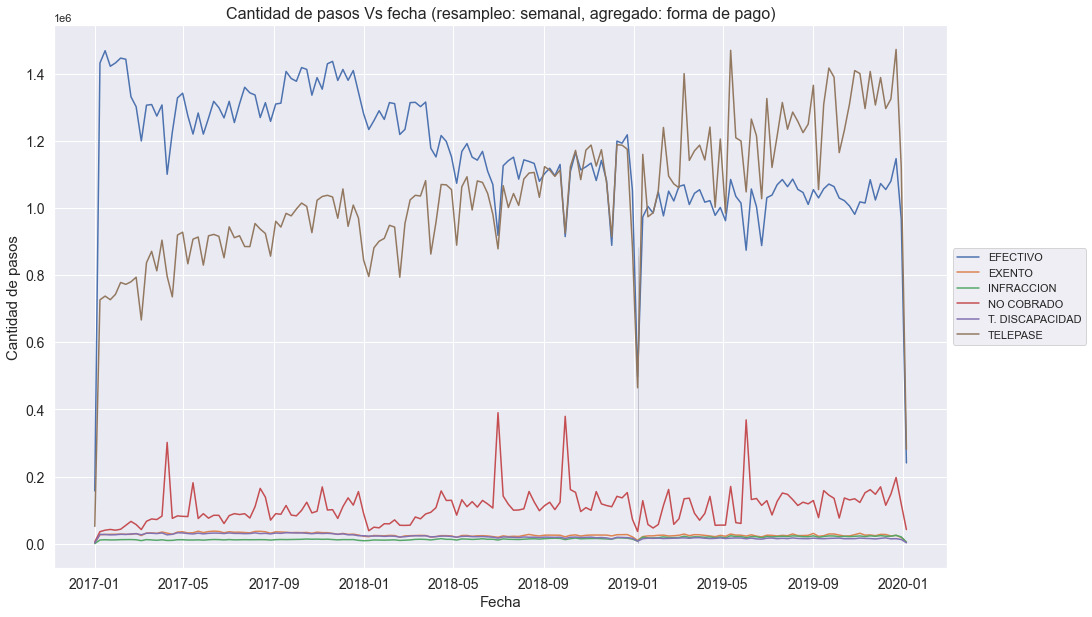

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_analisis, x='fecha', y='cantidad_pasos', hue='forma_pago')

#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo: semanal, agregado: forma de pago)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

### Multivariado - Estación

##### ---> Resampleo diario

In [ ]:
dataset_analisis =  dataset[['fecha','periodo','estacion','cantidad_pasos']]\
        .groupby([pd.Grouper(key= 'fecha', freq='D'), 'periodo','estacion'])\
        .sum().reset_index()
dataset_analisis

fecha  periodo    estacion  cantidad_pasos
0    2017-01-01     2017     Alberti            9638
1    2017-01-01     2017  Avellaneda           99631
2    2017-01-01     2017  Dellepiane           62026
3    2017-01-01     2017       Illia           45477
4    2017-01-01     2017      Retiro            2532
...         ...      ...         ...             ...
7848 2019-12-31     2019       Illia           43010
7849 2019-12-31     2019         PDB           11802
7850 2019-12-31     2019      Retiro            1151
7851 2019-12-31     2019    Salguero            2261
7852 2019-12-31     2019   Sarmiento            2175

[7853 rows x 4 columns]

In [ ]:
dataset_analisis[['cantidad_pasos']].describe()

cantidad_pasos
count     1095.000000
mean    342132.125114
std      62549.360309
min     156852.000000
25%     293376.000000
50%     361423.000000
75%     388229.000000
max     466887.000000

In [ ]:
dataset_analisis.groupby(['estacion','periodo']).describe()

cantidad_pasos                                        \
                            count           mean           std      min   
estacion   periodo                                                        
Alberti    2017             365.0   15861.682192   3278.391490   7347.0   
           2018             365.0   15711.895890   3375.428980   7685.0   
           2019             365.0   15428.073973   3353.699960   7437.0   
Avellaneda 2017             365.0  139209.835616  23143.078178  76421.0   
           2018             365.0  136032.931507  23465.741979  66780.0   
           2019             365.0  132338.504110  21922.418379  68460.0   
Dellepiane 2017             365.0   84092.969863  11756.172051  50802.0   
           2018             365.0   81537.673973  11293.792757  46629.0   
           2019             365.0   80261.263014  11714.063813  47628.0   
Illia      2017             365.0   91974.158904  20101.004502  35435.0   
           2018             365.0   94491.668493  22427.688890    387.0   
           2019             365.0   93575.778082  20395.165583  33529.0   
PDB        2019             216.0   26242.481481  11265.602172     14.0   
Retiro     2017             365.0    6446.104110   2164.232047   1491.0   
           2018             364.0    3842.530220   1263.428290    260.0   
           2019             365.0    3206.301370   1128.797346    892.0   
Salguero   2017             355.0    1737.543662    532.346931     15.0   
           2018             363.0    2622.741047   1362.665048     75.0   
           2019             355.0    3440.507042    894.454160    350.0   
Sarmiento  2017             363.0    2749.834711    676.528027    737.0   
           2018             363.0    3038.187328    820.976307    113.0   
           2019             364.0    3474.390110    871.820101    849.0   

                                                              
                          25%       50%        75%       max  
estacion   periodo                                            
Alberti    2017      14209.00   17088.0   18212.00   21024.0  
           2018      13564.00   16906.0   18187.00   21020.0  
           2019      13590.00   16531.0   17882.00   21303.0  
Avellaneda 2017     124684.00  145869.0  155460.00  179343.0  
           2018     118680.00  144526.0  153334.00  181648.0  
           2019     118755.00  138739.0  148169.00  168417.0  
Dellepiane 2017      77438.00   86509.0   92473.00  107973.0  
           2018      75088.00   84752.0   89129.00  105118.0  
           2019      74284.00   82711.0   88359.00  105392.0  
Illia      2017      74283.00   99296.0  107263.00  123854.0  
           2018      74194.00  103680.0  112327.00  125519.0  
           2019      75908.00  102459.0  109905.00  122390.0  
PDB        2019      14501.75   30310.5   33486.50   53568.0  
Retiro     2017       4139.00    7120.0    8413.00    9895.0  
           2018       2791.25    3960.0    4589.00    6649.0  
           2019       2130.00    3610.0    4051.00    5585.0  
Salguero   2017       1361.00    1810.0    2123.00    2942.0  
           2018       1954.00    2455.0    2941.50   10766.0  
           2019       2883.50    3519.0    4047.50    5819.0  
Sarmiento  2017       2360.00    2795.0    3136.50    4554.0  
           2018       2553.00    3046.0    3516.50    7740.0  
           2019       2957.25    3476.0    4032.25    6188.0

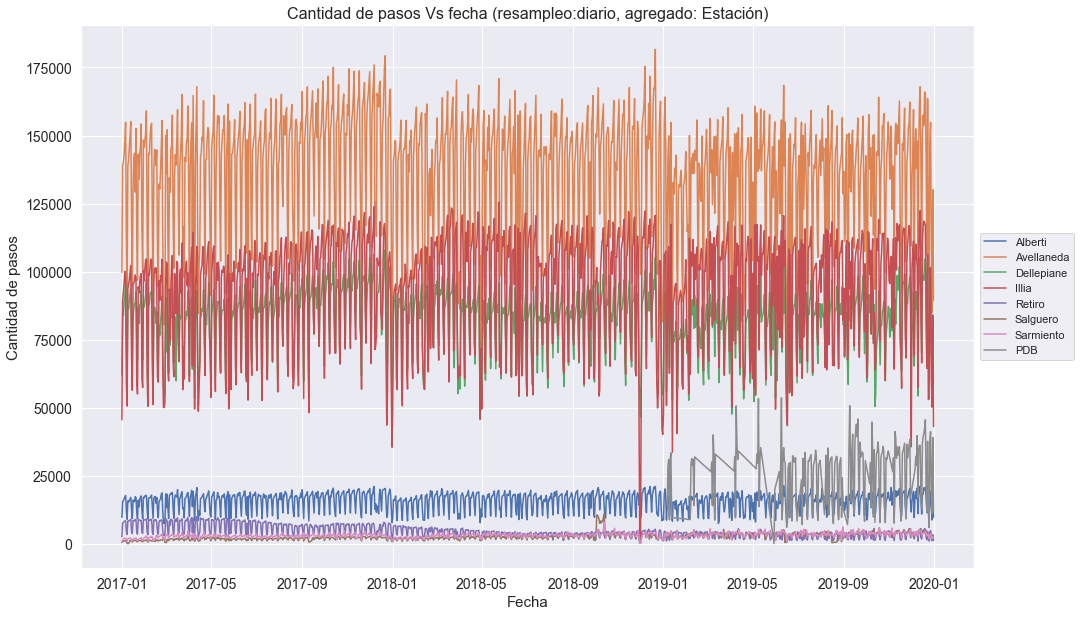

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_analisis, x='fecha', y='cantidad_pasos', hue='estacion')

#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo:diario, agregado: Estación)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

##### ---> Resampleo semanal

In [ ]:
dataset_analisis =  dataset[['fecha','periodo','estacion','cantidad_pasos']]\
        .groupby([pd.Grouper(key= 'fecha', freq='W'), 'periodo','estacion'])\
        .sum().reset_index()
dataset_analisis

fecha  periodo    estacion  cantidad_pasos
0    2017-01-01     2017     Alberti            9638
1    2017-01-01     2017  Avellaneda           99631
2    2017-01-01     2017  Dellepiane           62026
3    2017-01-01     2017       Illia           45477
4    2017-01-01     2017      Retiro            2532
...         ...      ...         ...             ...
1149 2020-01-05     2019       Illia          127053
1150 2020-01-05     2019         PDB           50782
1151 2020-01-05     2019      Retiro            4379
1152 2020-01-05     2019    Salguero            5281
1153 2020-01-05     2019   Sarmiento            4655

[1154 rows x 4 columns]

In [ ]:
dataset_analisis[['cantidad_pasos']].describe()

cantidad_pasos
count     1095.000000
mean    342132.125114
std      62549.360309
min     156852.000000
25%     293376.000000
50%     361423.000000
75%     388229.000000
max     466887.000000

In [ ]:
dataset_analisis.groupby(['estacion','periodo']).describe()

cantidad_pasos                                          \
                            count           mean            std       min   
estacion   periodo                                                          
Alberti    2017              53.0  109236.113208   15562.868002    9638.0   
           2018              53.0  108204.566038   15783.166272    9063.0   
           2019              53.0  106249.943396   13884.245059   25629.0   
Avellaneda 2017              53.0  958709.245283  132958.125439   99631.0   
           2018              53.0  936830.566038  128479.476265   85601.0   
           2019              53.0  911387.811321  111411.007198  219405.0   
Dellepiane 2017              53.0  579130.830189   81785.034073   62026.0   
           2018              53.0  561533.037736   76868.124452   54639.0   
           2019              53.0  552742.660377   69207.315546  141108.0   
Illia      2017              53.0  633406.943396   95037.593847   45477.0   
           2018              53.0  650744.509434  103635.092846   40103.0   
           2019              53.0  644436.962264   89481.737141  127053.0   
PDB        2019              41.0  138253.073171   62058.041954   13992.0   
Retiro     2017              53.0   44392.981132    7719.374527    2532.0   
           2018              53.0   26390.207547    6024.661706    1205.0   
           2019              53.0   22081.132075    3766.908782    4379.0   
Salguero   2017              53.0   11638.264151    3507.755167     401.0   
           2018              53.0   17963.301887    8258.568808    1312.0   
           2019              53.0   23044.905660    5151.662298    5281.0   
Sarmiento  2017              53.0   18833.773585    3981.452859     737.0   
           2018              53.0   20808.716981    4650.840223    1432.0   
           2019              53.0   23861.849057    4314.021564    4655.0   

                                                              
                         25%       50%        75%        max  
estacion   periodo                                            
Alberti    2017     105339.0  111453.0   114777.0   124861.0  
           2018     104294.0  110774.0   114081.0   126838.0  
           2019     102274.0  108703.0   113156.0   125806.0  
Avellaneda 2017     932110.0  972611.0  1011838.0  1078510.0  
           2018     915263.0  959324.0   984854.0  1062382.0  
           2019     902705.0  927571.0   956925.0  1039883.0  
Dellepiane 2017     561110.0  583798.0   615316.0   659108.0  
           2018     551763.0  573816.0   585726.0   634812.0  
           2019     541990.0  559436.0   578388.0   670699.0  
Illia      2017     605508.0  640626.0   671795.0   727544.0  
           2018     638604.0  673936.0   701209.0   744460.0  
           2019     633384.0  656928.0   687950.0   732906.0  
PDB        2019      89252.0  151548.0   181425.0   247650.0  
Retiro     2017      40484.0   44207.0    49864.0    53557.0  
           2018      23238.0   24831.0    29338.0    38875.0  
           2019      20314.0   22854.0    24019.0    29557.0  
Salguero   2017      10617.0   12023.0    14149.0    16454.0  
           2018      14275.0   16454.0    19035.0    58395.0  
           2019      20121.0   23741.0    26691.0    30405.0  
Sarmiento  2017      17865.0   19787.0    21135.0    24765.0  
           2018      18849.0   21522.0    23686.0    32441.0  
           2019      21735.0   24326.0    26928.0    29211.0

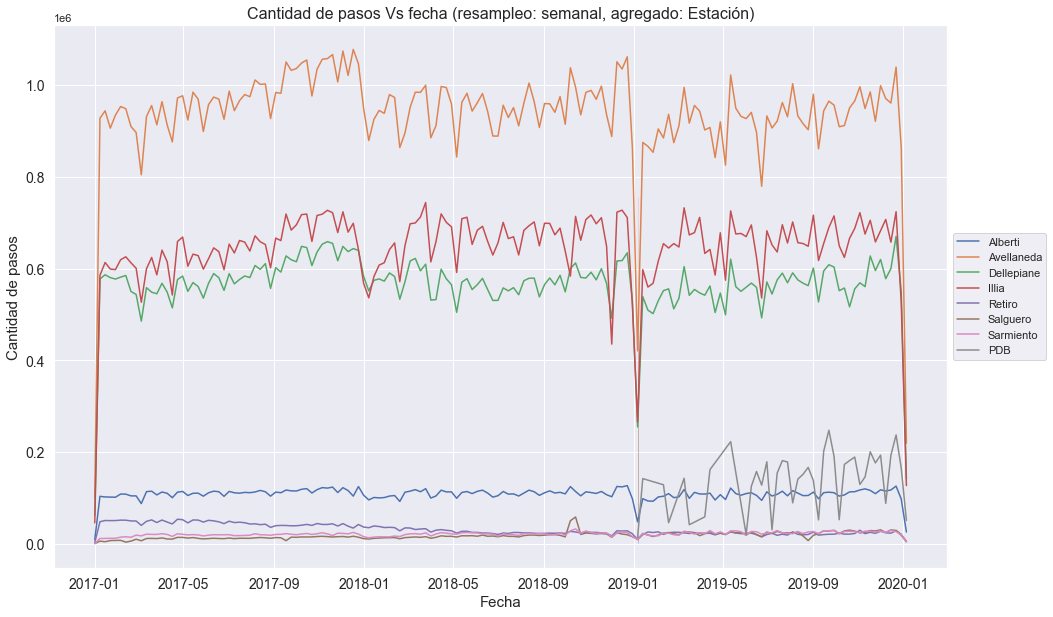

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_analisis, x='fecha', y='cantidad_pasos', hue='estacion')

#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo: semanal, agregado: Estación)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

##### ---> Comportamiento temporal: cantidad_paso Vs fecha (implicito estacion)

##### Sin agregación por fecha

<AxesSubplot:xlabel='fecha', ylabel='cantidad_pasos'>

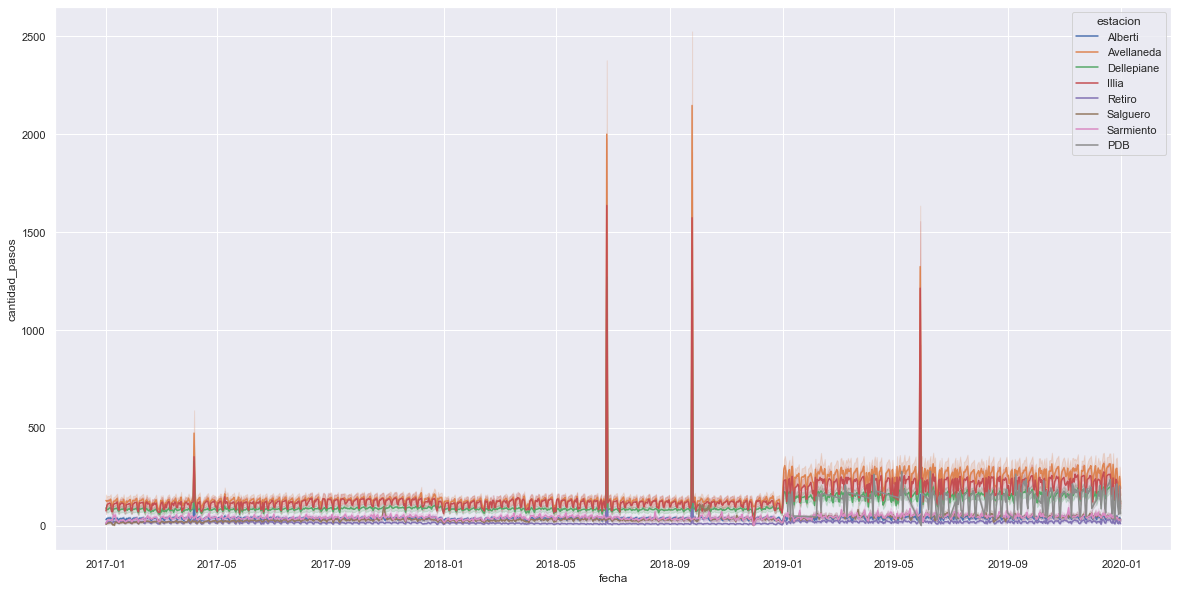

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=dataset, x='fecha', y='cantidad_pasos', hue="estacion")

##### Agragados por día

In [ ]:
df =  dataset[['fecha','cantidad_pasos','estacion']]\
        .groupby([pd.Grouper(key= 'fecha', freq='D'),'estacion'])\
        .sum().reset_index()
df

fecha    estacion  cantidad_pasos
0    2017-01-01     Alberti            9638
1    2017-01-01  Avellaneda           99631
2    2017-01-01  Dellepiane           62026
3    2017-01-01       Illia           45477
4    2017-01-01      Retiro            2532
...         ...         ...             ...
7848 2019-12-31       Illia           43010
7849 2019-12-31         PDB           11802
7850 2019-12-31      Retiro            1151
7851 2019-12-31    Salguero            2261
7852 2019-12-31   Sarmiento            2175

[7853 rows x 3 columns]

<AxesSubplot:xlabel='fecha', ylabel='cantidad_pasos'>

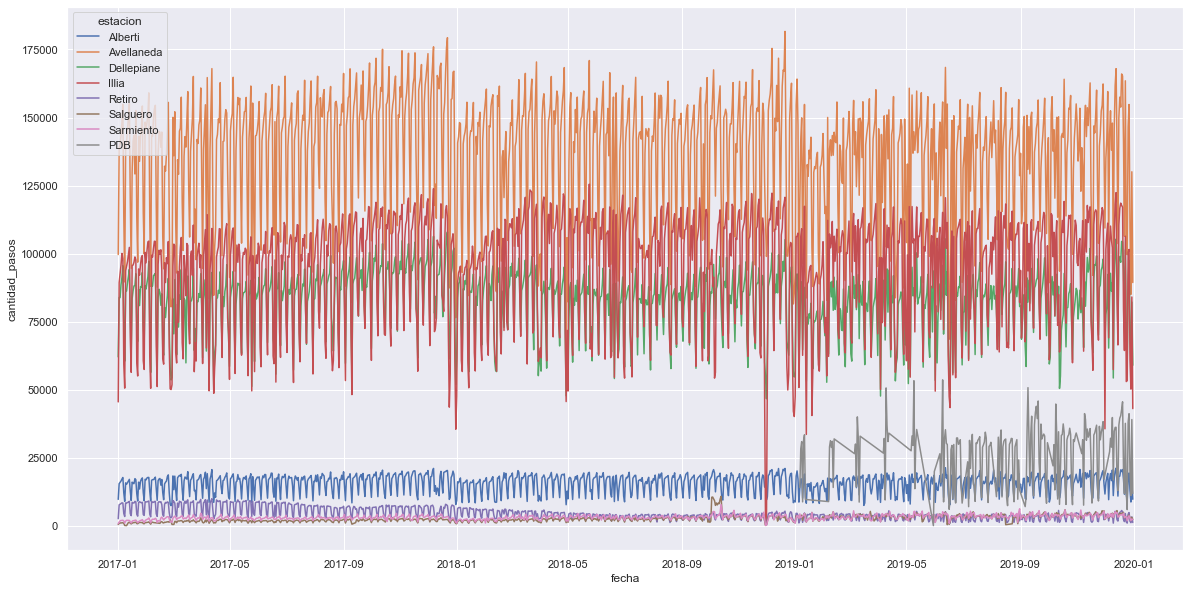

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x='fecha', y='cantidad_pasos',  hue="estacion")

##### Agragados por mes

In [ ]:
df =  dataset[['fecha','cantidad_pasos','estacion']]\
        .groupby([pd.Grouper(key= 'fecha', freq='MS'),'estacion'])\
        .sum().reset_index()
df

fecha    estacion  cantidad_pasos
0   2017-01-01     Alberti          452578
1   2017-01-01  Avellaneda         4108488
2   2017-01-01  Dellepiane         2559988
3   2017-01-01       Illia         2639349
4   2017-01-01      Retiro          220065
..         ...         ...             ...
259 2019-12-01       Illia         2778602
260 2019-12-01         PDB          734579
261 2019-12-01      Retiro          101547
262 2019-12-01    Salguero          112010
263 2019-12-01   Sarmiento          107072

[264 rows x 3 columns]

<AxesSubplot:xlabel='fecha', ylabel='cantidad_pasos'>

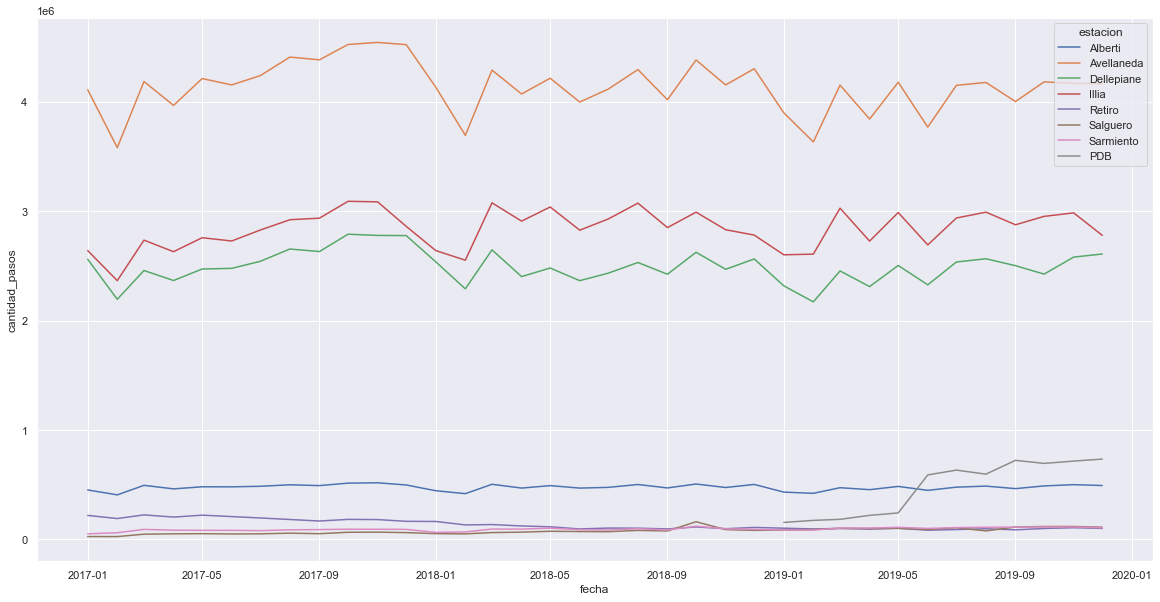

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x='fecha', y='cantidad_pasos',  hue="estacion")

# Illia - Efectivo

In [ ]:
dataset_Illia_efectivo =  dataset[(dataset.estacion=='Illia') & (dataset.forma_pago=='EFECTIVO')]\
                .drop(columns=['estacion', 'forma_pago']).reset_index(drop=True)
dataset_Illia_efectivo

fecha_comp      fecha  fecha_num  periodo  mes  hora_inicio  \
0      2017-01-01 01:00:00 2017-01-01     736330     2017    1            0   
1      2017-01-01 02:00:00 2017-01-01     736330     2017    1            1   
2      2017-01-01 02:00:00 2017-01-01     736330     2017    1            1   
3      2017-01-01 02:00:00 2017-01-01     736330     2017    1            1   
4      2017-01-01 03:00:00 2017-01-01     736330     2017    1            2   
...                    ...        ...        ...      ...  ...          ...   
238857 2019-12-31 22:00:00 2019-12-31     737424     2019   12           21   
238858 2019-12-31 22:00:00 2019-12-31     737424     2019   12           21   
238859 2019-12-31 23:00:00 2019-12-31     737424     2019   12           22   
238860 2019-12-31 23:00:00 2019-12-31     737424     2019   12           22   
238861 2020-01-01 00:00:00 2019-12-31     737424     2019   12           23   

        hora_fin      dia  dia_num    sentido tipo_vehiculo  cantidad_pasos  
0              1  Domingo        6     Centro       Liviano               1  
1              2  Domingo        6     Centro       Liviano              10  
2              2  Domingo        6     Centro       Liviano             783  
3              2  Domingo        6     Centro        Pesado               3  
4              3  Domingo        6     Centro       Liviano              14  
...          ...      ...      ...        ...           ...             ...  
238857        22   Martes        1  Provincia       Liviano             556  
238858        22   Martes        1  Provincia        Pesado               1  
238859        23   Martes        1     Centro       Liviano             214  
238860        23   Martes        1  Provincia       Liviano             190  
238861        24   Martes        1     Centro       Liviano               4  

[238862 rows x 12 columns]

<AxesSubplot:xlabel='fecha_comp', ylabel='cantidad_pasos'>

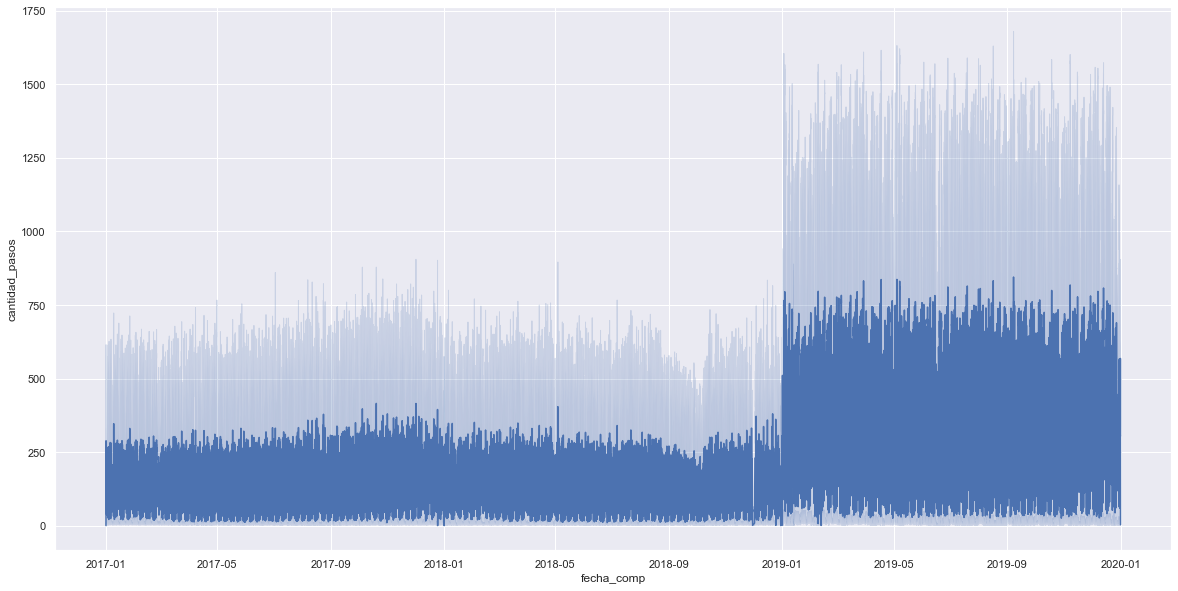

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=dataset_Illia_efectivo, x='fecha_comp', y='cantidad_pasos')

<AxesSubplot:xlabel='fecha', ylabel='cantidad_pasos'>

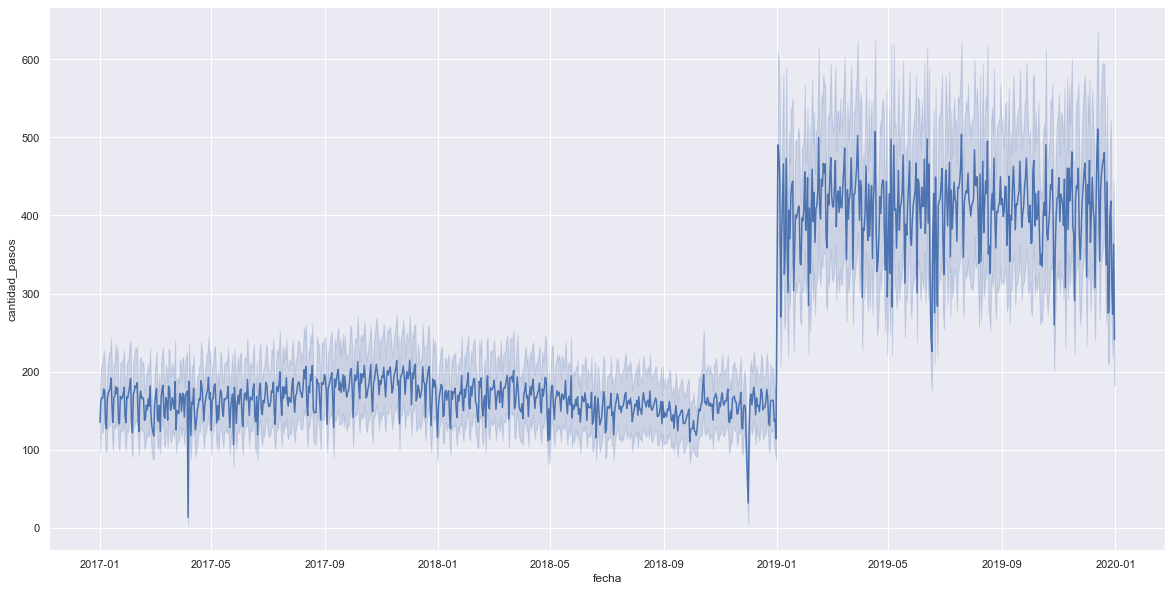

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=dataset_Illia_efectivo, x='fecha', y='cantidad_pasos')

# Illia - Efectivo: resample diario

In [ ]:
dataset_Illia_efectivo_diario =  dataset_Illia_efectivo[['fecha','fecha_num','periodo','mes', 'dia','cantidad_pasos']]\
        .groupby([pd.Grouper(key= 'fecha', freq='D'),'fecha_num','periodo','mes', 'dia' ])\
        .sum().reset_index()
dataset_Illia_efectivo_diario

fecha  fecha_num  periodo  mes        dia  cantidad_pasos
0    2017-01-01     736330     2017    1    Domingo           31183
1    2017-01-02     736331     2017    1      Lunes           51568
2    2017-01-03     736332     2017    1     Martes           51093
3    2017-01-04     736333     2017    1  Miércoles           53332
4    2017-01-05     736334     2017    1     Jueves           56486
...         ...        ...      ...  ...        ...             ...
1086 2019-12-27     737420     2019   12    Viernes           40182
1087 2019-12-28     737421     2019   12     Sábado           30681
1088 2019-12-29     737422     2019   12    Domingo           26259
1089 2019-12-30     737423     2019   12      Lunes           34523
1090 2019-12-31     737424     2019   12     Martes           21447

[1091 rows x 6 columns]

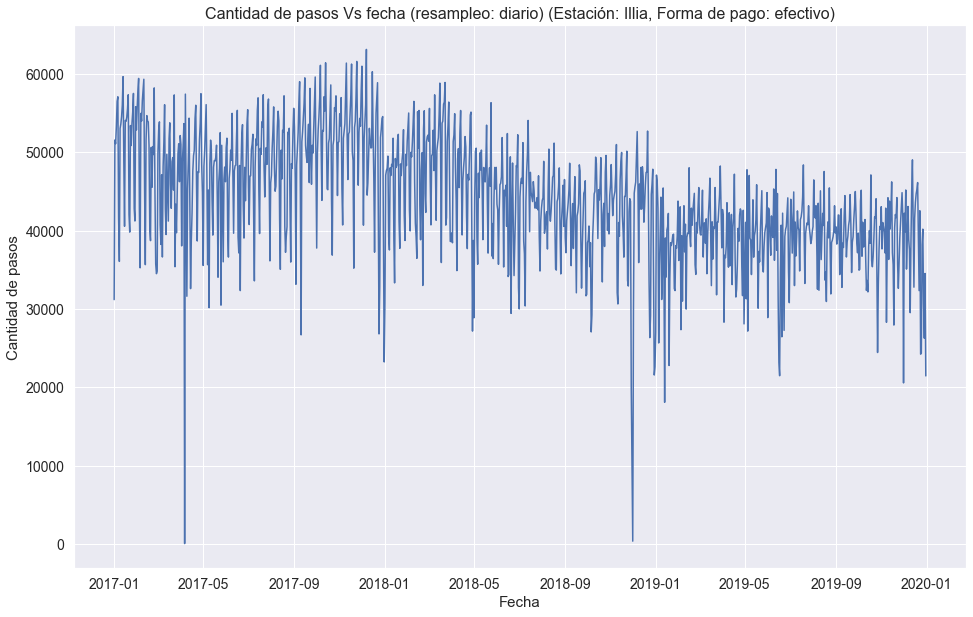

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_Illia_efectivo_diario, x='fecha', y='cantidad_pasos')
#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo: diario) (Estación: Illia, Forma de pago: efectivo)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

### Preprocesamiento

##### ---> Valores nulos

In [ ]:
dataset_Illia_efectivo_diario.isnull().sum()

fecha             0
fecha_num         0
periodo           0
mes               0
dia               0
cantidad_pasos    0
dtype: int64

In [ ]:
(dataset_Illia_efectivo_diario.cantidad_pasos==0).sum()

0

##### ---> Valores faltantes

In [ ]:
dataset_Illia_efectivo_diario

fecha  fecha_num  periodo  mes        dia  cantidad_pasos
0    2017-01-01     736330     2017    1    Domingo           31183
1    2017-01-02     736331     2017    1      Lunes           51568
2    2017-01-03     736332     2017    1     Martes           51093
3    2017-01-04     736333     2017    1  Miércoles           53332
4    2017-01-05     736334     2017    1     Jueves           56486
...         ...        ...      ...  ...        ...             ...
1086 2019-12-27     737420     2019   12    Viernes           40182
1087 2019-12-28     737421     2019   12     Sábado           30681
1088 2019-12-29     737422     2019   12    Domingo           26259
1089 2019-12-30     737423     2019   12      Lunes           34523
1090 2019-12-31     737424     2019   12     Martes           21447

[1091 rows x 6 columns]

In [ ]:
df_validacion = pd.date_range(start='2017-01-01', end='2019-12-31',freq='D').to_frame().rename(columns={0:'fecha'})
df_validacion

fecha
2017-01-01 2017-01-01
2017-01-02 2017-01-02
2017-01-03 2017-01-03
2017-01-04 2017-01-04
2017-01-05 2017-01-05
...               ...
2019-12-27 2019-12-27
2019-12-28 2019-12-28
2019-12-29 2019-12-29
2019-12-30 2019-12-30
2019-12-31 2019-12-31

[1095 rows x 1 columns]

In [ ]:
merge_validation = df_validacion.merge(dataset_Illia_efectivo_diario, on='fecha', how='left')
merge_validation

fecha  fecha_num  periodo   mes        dia  cantidad_pasos
0    2017-01-01   736330.0   2017.0   1.0    Domingo         31183.0
1    2017-01-02   736331.0   2017.0   1.0      Lunes         51568.0
2    2017-01-03   736332.0   2017.0   1.0     Martes         51093.0
3    2017-01-04   736333.0   2017.0   1.0  Miércoles         53332.0
4    2017-01-05   736334.0   2017.0   1.0     Jueves         56486.0
...         ...        ...      ...   ...        ...             ...
1090 2019-12-27   737420.0   2019.0  12.0    Viernes         40182.0
1091 2019-12-28   737421.0   2019.0  12.0     Sábado         30681.0
1092 2019-12-29   737422.0   2019.0  12.0    Domingo         26259.0
1093 2019-12-30   737423.0   2019.0  12.0      Lunes         34523.0
1094 2019-12-31   737424.0   2019.0  12.0     Martes         21447.0

[1095 rows x 6 columns]

In [ ]:
merge_validation.isnull().sum()

fecha             0
fecha_num         4
periodo           4
mes               4
dia               4
cantidad_pasos    4
dtype: int64

In [ ]:
indices_a_reemplazar = merge_validation[merge_validation.cantidad_pasos.isnull()].index
indices_a_reemplazar

Int64Index([540, 632, 698, 878], dtype='int64')

In [ ]:
merge_validation.iloc[indices_a_reemplazar]

fecha  fecha_num  periodo  mes  dia  cantidad_pasos
540 2018-06-25        NaN      NaN  NaN  NaN             NaN
632 2018-09-25        NaN      NaN  NaN  NaN             NaN
698 2018-11-30        NaN      NaN  NaN  NaN             NaN
878 2019-05-29        NaN      NaN  NaN  NaN             NaN

In [ ]:
merge_validation.cantidad_pasos.iloc[indices_a_reemplazar]=\
merge_validation.cantidad_pasos.iloc[indices_a_reemplazar].replace(np.nan, 0)

In [ ]:
merge_validation.fecha_num.iloc[indices_a_reemplazar]=\
merge_validation.fecha.iloc[indices_a_reemplazar].map(datetime.datetime.toordinal)

In [ ]:
merge_validation.periodo.iloc[indices_a_reemplazar]=\
merge_validation.fecha.iloc[indices_a_reemplazar].dt.year

In [ ]:
merge_validation.mes.iloc[indices_a_reemplazar]=\
merge_validation.fecha.iloc[indices_a_reemplazar].dt.month

In [ ]:
merge_validation.dia.iloc[indices_a_reemplazar]=\
merge_validation.fecha.iloc[indices_a_reemplazar].dt.weekday

In [ ]:
merge_validation.dia.iloc[indices_a_reemplazar] = merge_validation.dia.iloc[indices_a_reemplazar]\
        .replace({0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'})

In [ ]:
merge_validation.iloc[indices_a_reemplazar]

fecha  fecha_num  periodo   mes        dia  cantidad_pasos
540 2018-06-25   736870.0   2018.0   6.0      Lunes             0.0
632 2018-09-25   736962.0   2018.0   9.0     Martes             0.0
698 2018-11-30   737028.0   2018.0  11.0    Viernes             0.0
878 2019-05-29   737208.0   2019.0   5.0  Miércoles             0.0

In [ ]:
merge_validation = merge_validation.astype({'cantidad_pasos': int, 'fecha_num': int, 'periodo': int, 'mes': int})
merge_validation

fecha  fecha_num  periodo  mes        dia  cantidad_pasos
0    2017-01-01     736330     2017    1    Domingo           31183
1    2017-01-02     736331     2017    1      Lunes           51568
2    2017-01-03     736332     2017    1     Martes           51093
3    2017-01-04     736333     2017    1  Miércoles           53332
4    2017-01-05     736334     2017    1     Jueves           56486
...         ...        ...      ...  ...        ...             ...
1090 2019-12-27     737420     2019   12    Viernes           40182
1091 2019-12-28     737421     2019   12     Sábado           30681
1092 2019-12-29     737422     2019   12    Domingo           26259
1093 2019-12-30     737423     2019   12      Lunes           34523
1094 2019-12-31     737424     2019   12     Martes           21447

[1095 rows x 6 columns]

In [ ]:
dataset_Illia_efectivo_diario_no_faltantes = merge_validation
dataset_Illia_efectivo_diario_no_faltantes

fecha  fecha_num  periodo  mes        dia  cantidad_pasos
0    2017-01-01     736330     2017    1    Domingo           31183
1    2017-01-02     736331     2017    1      Lunes           51568
2    2017-01-03     736332     2017    1     Martes           51093
3    2017-01-04     736333     2017    1  Miércoles           53332
4    2017-01-05     736334     2017    1     Jueves           56486
...         ...        ...      ...  ...        ...             ...
1090 2019-12-27     737420     2019   12    Viernes           40182
1091 2019-12-28     737421     2019   12     Sábado           30681
1092 2019-12-29     737422     2019   12    Domingo           26259
1093 2019-12-30     737423     2019   12      Lunes           34523
1094 2019-12-31     737424     2019   12     Martes           21447

[1095 rows x 6 columns]

##### ---> Outliers: Metodo 1

In [ ]:
dataset_Illia_efectivo_diario_no_faltantes

fecha  fecha_num  periodo  mes        dia  cantidad_pasos
0    2017-01-01     736330     2017    1    Domingo           31183
1    2017-01-02     736331     2017    1      Lunes           51568
2    2017-01-03     736332     2017    1     Martes           51093
3    2017-01-04     736333     2017    1  Miércoles           53332
4    2017-01-05     736334     2017    1     Jueves           56486
...         ...        ...      ...  ...        ...             ...
1090 2019-12-27     737420     2019   12    Viernes           40182
1091 2019-12-28     737421     2019   12     Sábado           30681
1092 2019-12-29     737422     2019   12    Domingo           26259
1093 2019-12-30     737423     2019   12      Lunes           34523
1094 2019-12-31     737424     2019   12     Martes           21447

[1095 rows x 6 columns]

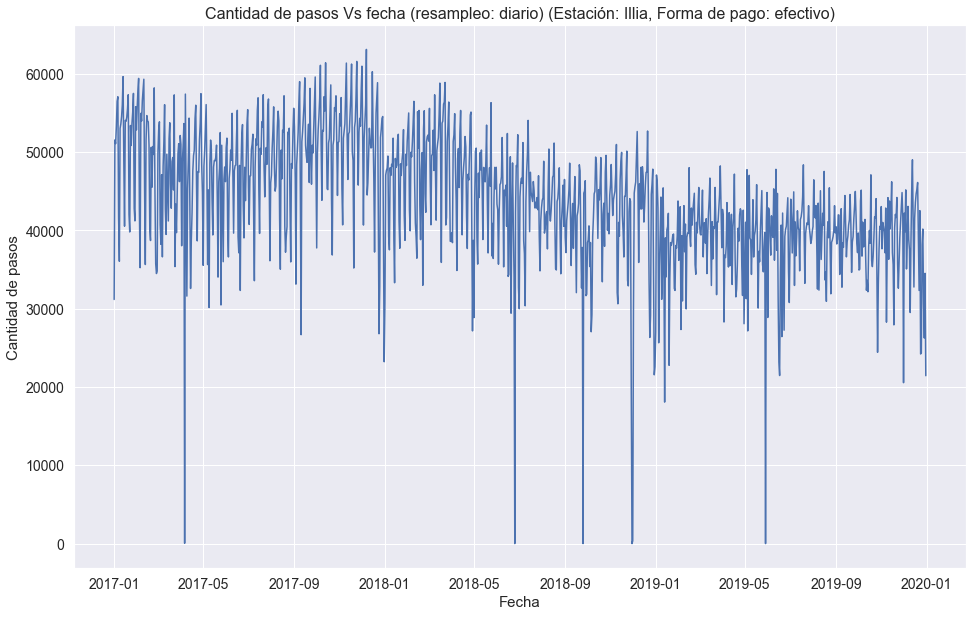

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_Illia_efectivo_diario_no_faltantes, x='fecha', y='cantidad_pasos')
#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo: diario) (Estación: Illia, Forma de pago: efectivo)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

In [ ]:
dataset_analisis =  dataset_Illia_efectivo_diario_no_faltantes[['fecha','cantidad_pasos']].set_index('fecha')
dataset_analisis

cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486
...                    ...
2019-12-27           40182
2019-12-28           30681
2019-12-29           26259
2019-12-30           34523
2019-12-31           21447

[1095 rows x 1 columns]

In [ ]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, 
                      plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    global rolling_mean
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(16,10))
    plt.plot(series[window:], label="Actual values")
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "yellow", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * 1.5*deviation)
        upper_bond = rolling_mean + (mae + scale * 1.5* deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            global anomalies
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)

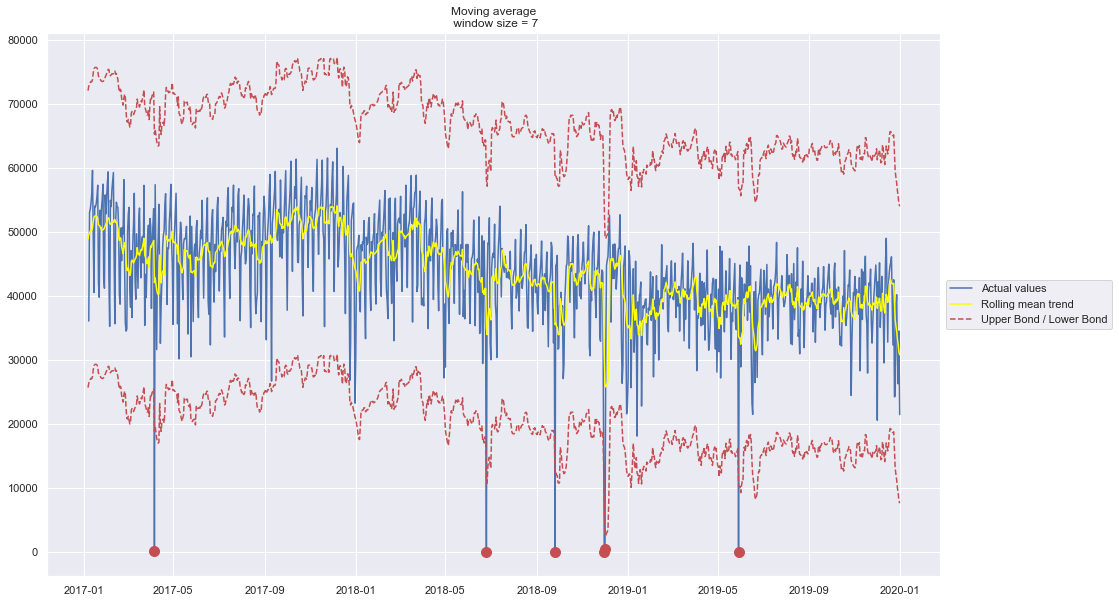

In [ ]:
plotMovingAverage(dataset_analisis, 7, plot_intervals=True, plot_anomalies=True)

In [ ]:
anomalies.reset_index().dropna()

fecha cantidad_pasos
95  2017-04-06             40
540 2018-06-25              0
632 2018-09-25              0
698 2018-11-30              0
699 2018-12-01            350
878 2019-05-29              0

In [ ]:
indx_anomalies = anomalies.reset_index().dropna().index
indx_anomalies

Int64Index([95, 540, 632, 698, 699, 878], dtype='int64')

In [ ]:
rolling_mean.reset_index().cantidad_pasos.iloc[indx_anomalies].map(lambda x: int(round(x,0)))

95     42084
540    34945
632    35539
698    30923
699    26167
878    33679
Name: cantidad_pasos, dtype: int64

In [ ]:
dataset_Illia_efectivo_diario_no_faltantes_no_outliers = dataset_Illia_efectivo_diario_no_faltantes.copy()
dataset_Illia_efectivo_diario_no_faltantes_no_outliers

fecha  fecha_num  periodo  mes        dia  cantidad_pasos
0    2017-01-01     736330     2017    1    Domingo           31183
1    2017-01-02     736331     2017    1      Lunes           51568
2    2017-01-03     736332     2017    1     Martes           51093
3    2017-01-04     736333     2017    1  Miércoles           53332
4    2017-01-05     736334     2017    1     Jueves           56486
...         ...        ...      ...  ...        ...             ...
1090 2019-12-27     737420     2019   12    Viernes           40182
1091 2019-12-28     737421     2019   12     Sábado           30681
1092 2019-12-29     737422     2019   12    Domingo           26259
1093 2019-12-30     737423     2019   12      Lunes           34523
1094 2019-12-31     737424     2019   12     Martes           21447

[1095 rows x 6 columns]

In [ ]:
dataset_Illia_efectivo_diario_no_faltantes_no_outliers.cantidad_pasos.iloc[indx_anomalies]

95      40
540      0
632      0
698      0
699    350
878      0
Name: cantidad_pasos, dtype: int32

In [ ]:
dataset_Illia_efectivo_diario_no_faltantes_no_outliers.cantidad_pasos.iloc[indx_anomalies]=\
rolling_mean.reset_index().cantidad_pasos.iloc[indx_anomalies].map(lambda x: int(round(x,0)))

In [ ]:
dataset_Illia_efectivo_diario_no_faltantes_no_outliers.iloc[indx_anomalies]

fecha  fecha_num  periodo  mes        dia  cantidad_pasos
95  2017-04-06     736425     2017    4     Jueves           42084
540 2018-06-25     736870     2018    6      Lunes           34945
632 2018-09-25     736962     2018    9     Martes           35539
698 2018-11-30     737028     2018   11    Viernes           30923
699 2018-12-01     737029     2018   12     Sábado           26167
878 2019-05-29     737208     2019    5  Miércoles           33679

In [ ]:
dataset_Illia_efectivo_diario_no_faltantes_no_outliers

fecha  fecha_num  periodo  mes        dia  cantidad_pasos
0    2017-01-01     736330     2017    1    Domingo           31183
1    2017-01-02     736331     2017    1      Lunes           51568
2    2017-01-03     736332     2017    1     Martes           51093
3    2017-01-04     736333     2017    1  Miércoles           53332
4    2017-01-05     736334     2017    1     Jueves           56486
...         ...        ...      ...  ...        ...             ...
1090 2019-12-27     737420     2019   12    Viernes           40182
1091 2019-12-28     737421     2019   12     Sábado           30681
1092 2019-12-29     737422     2019   12    Domingo           26259
1093 2019-12-30     737423     2019   12      Lunes           34523
1094 2019-12-31     737424     2019   12     Martes           21447

[1095 rows x 6 columns]

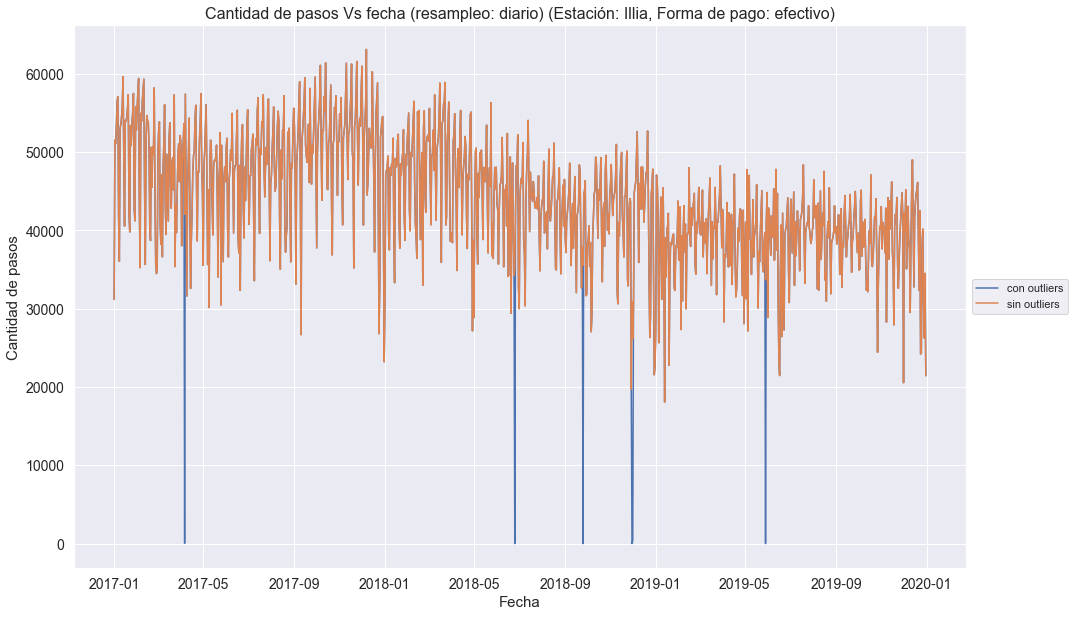

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(dataset_Illia_efectivo_diario_no_faltantes.fecha, 
         dataset_Illia_efectivo_diario_no_faltantes.cantidad_pasos, label="con outliers")
plt.plot(dataset_Illia_efectivo_diario_no_faltantes.fecha, 
         dataset_Illia_efectivo_diario_no_faltantes_no_outliers.cantidad_pasos, label="sin outliers")
#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo: diario) (Estación: Illia, Forma de pago: efectivo)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

##### ---> Outliers: Metodo 2

In [ ]:
#import warnings
def hampel_filter_forloop(input_series, window_size, n_sigmas=4):
    
    n = len(input_series)
    new_series = input_series.copy()
    k = 1.4826 # scale factor for Gaussian distribution
    
    indices = []
    
    # possibly use np.nanmedian 
    for i in range((window_size),(n - window_size)):
        x0 = np.median(input_series[(i - window_size):(i + window_size)])
        S0 = k * np.median(np.abs(input_series[(i - window_size):(i + window_size)] - x0))
        if (np.abs(input_series[i] - x0) > n_sigmas * S0):
            new_series[i] = x0
            indices.append(i)
    
    return new_series, indices

In [ ]:
res, detected_outliers = hampel_filter_forloop(dataset_analisis.cantidad_pasos, 10, n_sigmas=5)

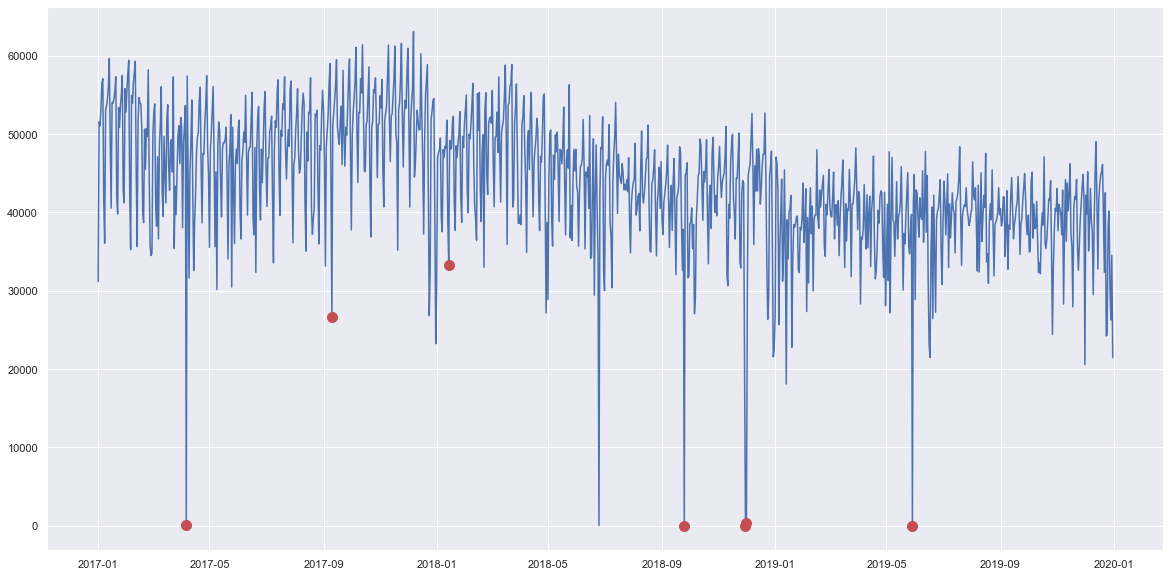

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(dataset_analisis.cantidad_pasos, label="Actual values")
plt.plot(dataset_analisis.cantidad_pasos[detected_outliers], "ro", markersize=10)

# Componentes de la serie (empleando Statsmodels)

In [ ]:
dataset_Illia_efectivo_diario_no_faltantes_no_outliers

fecha  fecha_num  periodo  mes        dia  cantidad_pasos
0    2017-01-01     736330     2017    1    Domingo           31183
1    2017-01-02     736331     2017    1      Lunes           51568
2    2017-01-03     736332     2017    1     Martes           51093
3    2017-01-04     736333     2017    1  Miércoles           53332
4    2017-01-05     736334     2017    1     Jueves           56486
...         ...        ...      ...  ...        ...             ...
1090 2019-12-27     737420     2019   12    Viernes           40182
1091 2019-12-28     737421     2019   12     Sábado           30681
1092 2019-12-29     737422     2019   12    Domingo           26259
1093 2019-12-30     737423     2019   12      Lunes           34523
1094 2019-12-31     737424     2019   12     Martes           21447

[1095 rows x 6 columns]

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

### ---> Componentes resampleo diario (modelo aditivo)

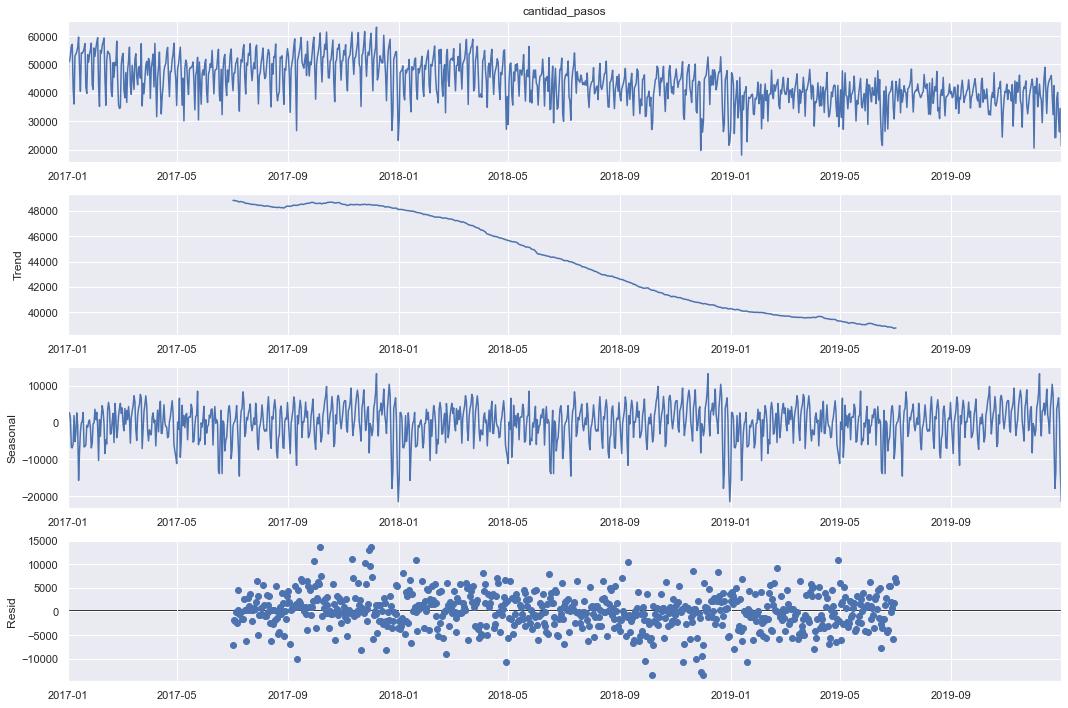

In [ ]:
plt.rcParams['figure.figsize'] = [15,10]

#para Seasonal decomposition using moving averages.
result_additive = seasonal_decompose(dataset_Illia_efectivo_diario_no_faltantes_no_outliers\
                                     .set_index('fecha').cantidad_pasos,
                                     period=365, model='additive')
result_additive.plot()

plt.show()

<AxesSubplot:xlabel='resid', ylabel='Density'>

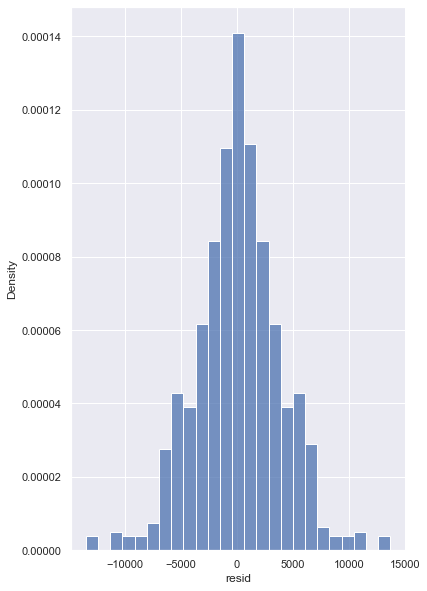

In [ ]:
plt.figure(figsize=(6,10))
sns.histplot(result_additive.resid, stat= 'density', bins = 25, element='bars', fill=True)

In [ ]:
result_additive.trend

fecha
2017-01-01   NaN
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Name: trend, Length: 1095, dtype: float64

In [ ]:
result_additive.seasonal

fecha
2017-01-01   -15452.471541
2017-01-02     2754.854487
2017-01-03     2633.890103
2017-01-04     1125.943528
2017-01-05    -6708.197568
                  ...     
2019-12-27     5020.358596
2019-12-28     6679.358596
2019-12-29      634.210651
2019-12-30   -13569.035924
2019-12-31   -21409.552363
Name: seasonal, Length: 1095, dtype: float64

### ---> Componentes resampleo diario  (modelo multiplicativo)

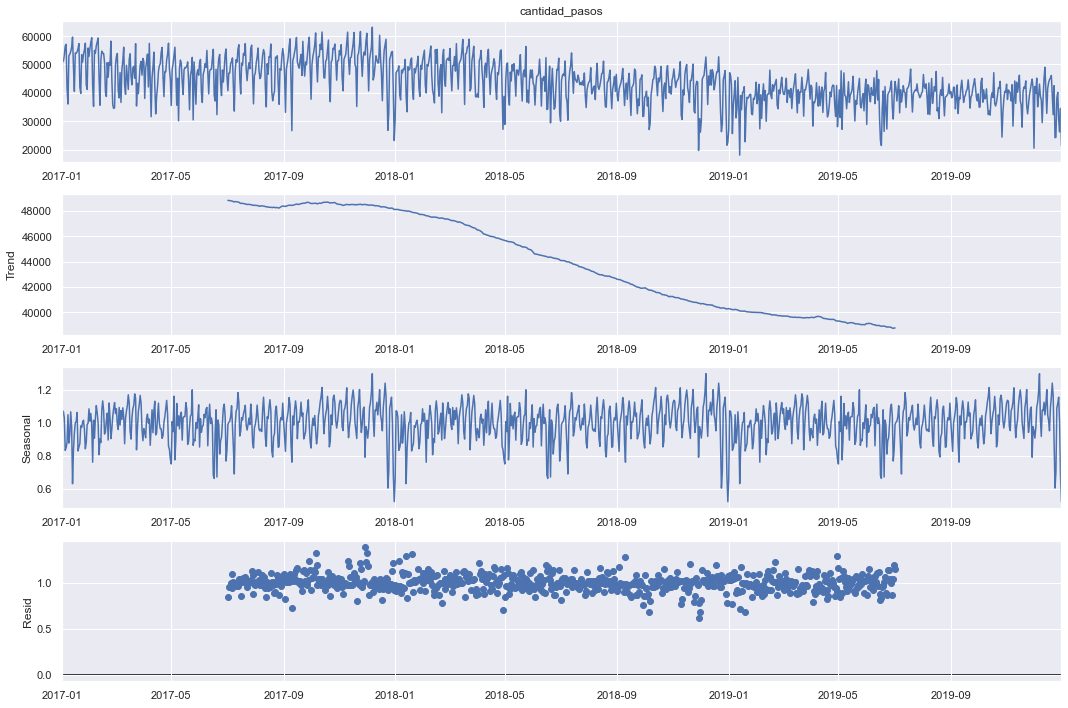

In [ ]:
plt.rcParams['figure.figsize'] = [15,10]

#para Seasonal decomposition using moving averages.
result_multiplicative = seasonal_decompose(dataset_Illia_efectivo_diario_no_faltantes_no_outliers\
                                     .set_index('fecha').cantidad_pasos,
                                     period=365, model='multiplicative')
result_multiplicative.plot()
plt.show()

<AxesSubplot:xlabel='resid', ylabel='Density'>

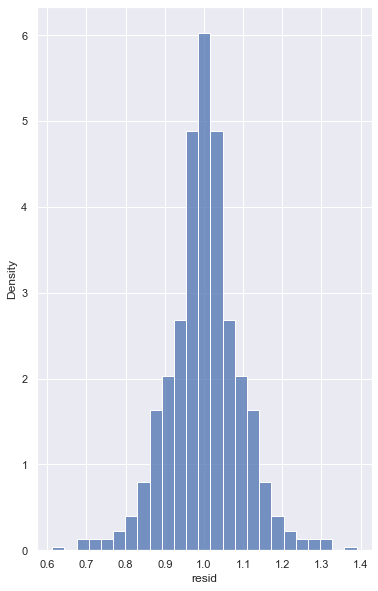

In [ ]:
plt.figure(figsize=(6,10))
sns.histplot(result_multiplicative.resid, stat= 'density', bins = 25, element='bars', fill=True)

### ---> Componentes resampleo semanal (modelo aditivo)

In [ ]:
dataset_analisis = dataset_Illia_efectivo_diario_no_faltantes_no_outliers\
                   .groupby([pd.Grouper(key= 'fecha',freq='W')]).sum()[['cantidad_pasos']]
dataset_analisis

cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-08          347212
2017-01-15          366413
2017-01-22          357215
2017-01-29          354581
...                    ...
2019-12-08          282891
2019-12-15          272960
2019-12-22          292881
2019-12-29          226390
2020-01-05           55970

[158 rows x 1 columns]

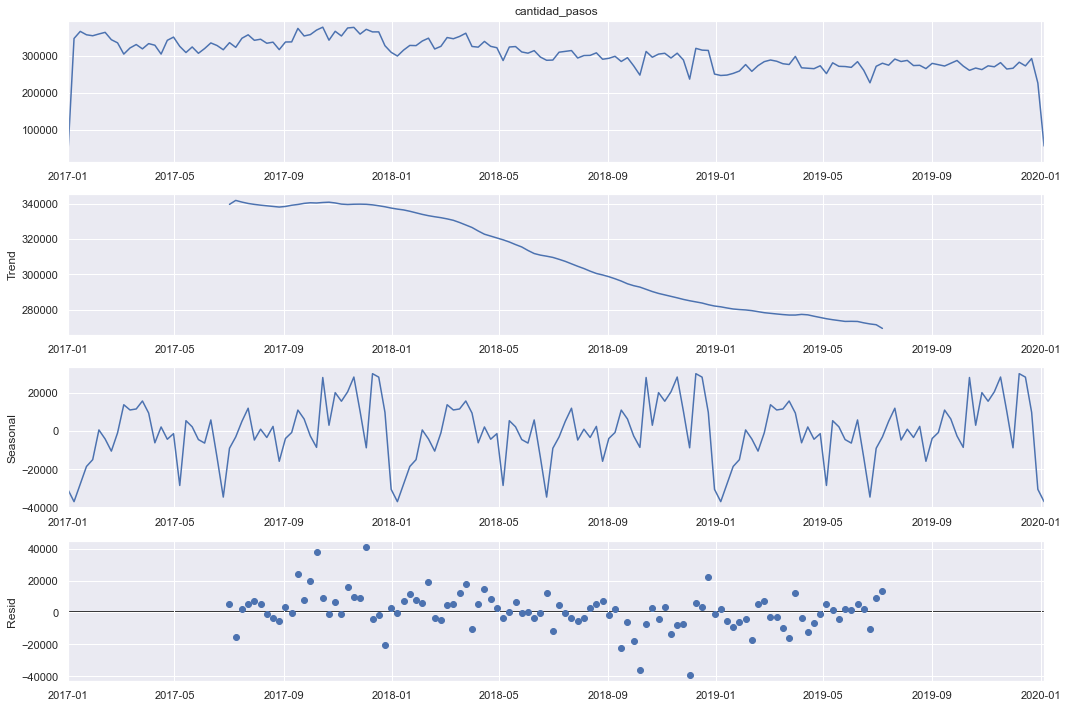

In [ ]:
plt.rcParams['figure.figsize'] = [15,10]

#para Seasonal decomposition using moving averages.
result_additive = seasonal_decompose(dataset_analisis.cantidad_pasos,
                                     period=52, model='additive')
result_additive.plot()
plt.show()

<AxesSubplot:xlabel='resid', ylabel='Density'>

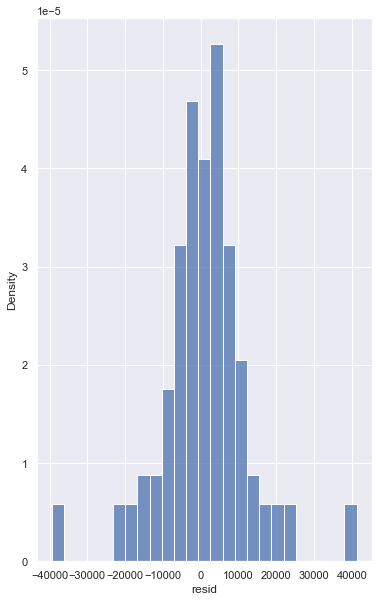

In [ ]:
plt.figure(figsize=(6,10))
sns.histplot(result_additive.resid, stat= 'density', bins = 25, element='bars', fill=True)

### ---> Componentes resampleo semanal (modelo multiplicativo)

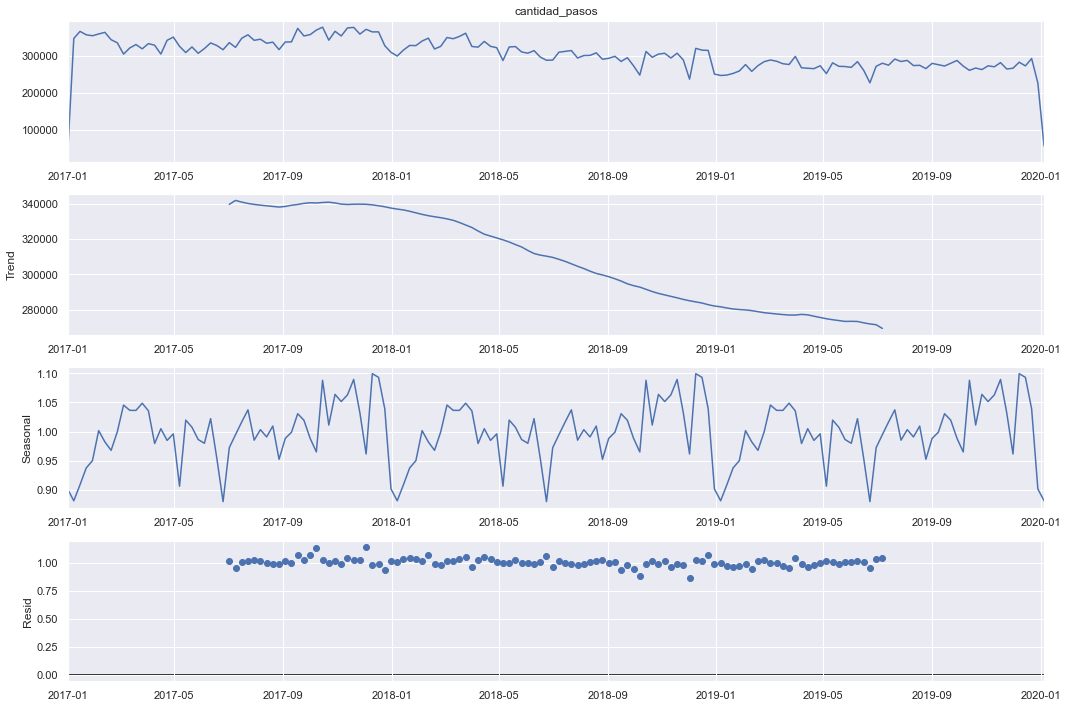

In [ ]:
plt.rcParams['figure.figsize'] = [15,10]

#para Seasonal decomposition using moving averages.
result_multiplicative = seasonal_decompose(dataset_analisis.cantidad_pasos,
                                     period=52, model='multiplicative')
result_multiplicative.plot()
plt.show()

<AxesSubplot:xlabel='resid', ylabel='Density'>

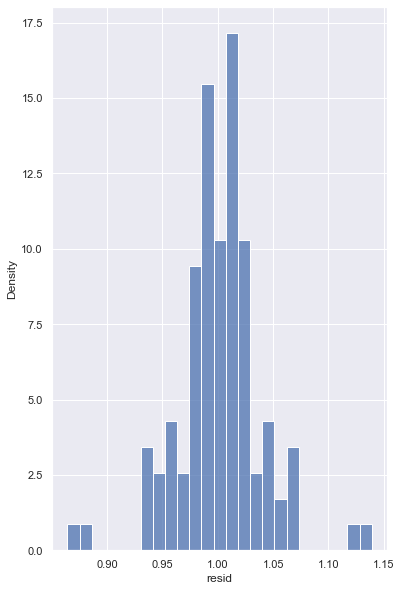

In [ ]:
plt.figure(figsize=(6,10))
sns.histplot(result_multiplicative.resid, stat= 'density', bins = 25, element='bars', fill=True)

# Train - Test Split

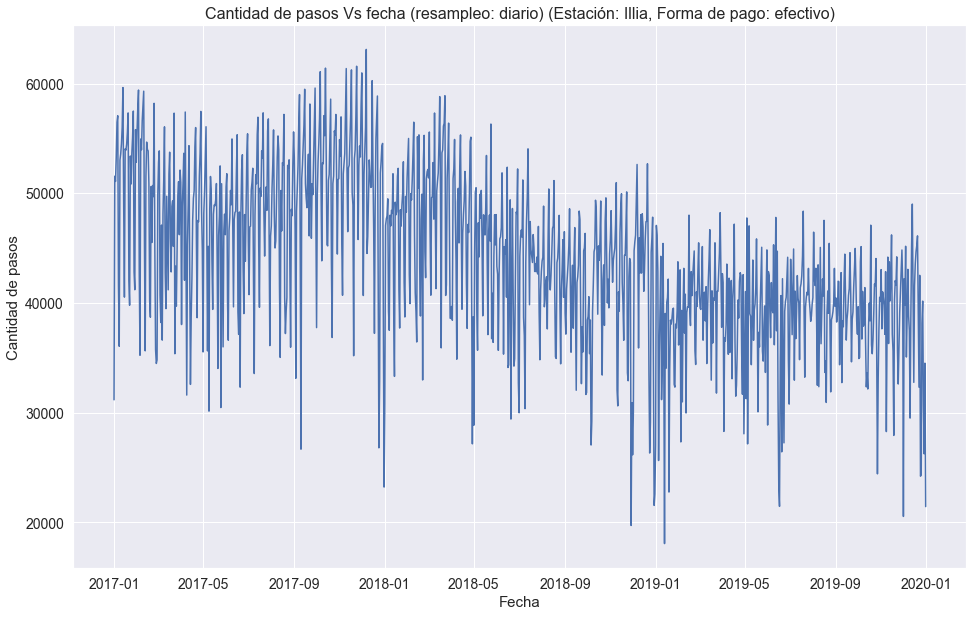

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(dataset_Illia_efectivo_diario_no_faltantes_no_outliers.fecha, 
         dataset_Illia_efectivo_diario_no_faltantes_no_outliers.cantidad_pasos)
#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo: diario) (Estación: Illia, Forma de pago: efectivo)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

In [ ]:
dataset_analisis = dataset_Illia_efectivo_diario_no_faltantes_no_outliers.\
                   set_index('fecha')[['fecha_num', 'cantidad_pasos']]
dataset_analisis

fecha_num  cantidad_pasos
fecha                                
2017-01-01     736330           31183
2017-01-02     736331           51568
2017-01-03     736332           51093
2017-01-04     736333           53332
2017-01-05     736334           56486
...               ...             ...
2019-12-27     737420           40182
2019-12-28     737421           30681
2019-12-29     737422           26259
2019-12-30     737423           34523
2019-12-31     737424           21447

[1095 rows x 2 columns]

In [ ]:
df_train = dataset_analisis.loc['2017-01-01':'2019-09-30']
df_train

fecha_num  cantidad_pasos
fecha                                
2017-01-01     736330           31183
2017-01-02     736331           51568
2017-01-03     736332           51093
2017-01-04     736333           53332
2017-01-05     736334           56486
...               ...             ...
2019-09-26     737328           43110
2019-09-27     737329           44985
2019-09-28     737330           41925
2019-09-29     737331           38348
2019-09-30     737332           37170

[1003 rows x 2 columns]

In [ ]:
df_test = dataset_analisis.loc['2019-10-01':]
df_test

fecha_num  cantidad_pasos
fecha                                
2019-10-01     737333           39669
2019-10-02     737334           34943
2019-10-03     737335           35054
2019-10-04     737336           43775
2019-10-05     737337           45150
...               ...             ...
2019-12-27     737420           40182
2019-12-28     737421           30681
2019-12-29     737422           26259
2019-12-30     737423           34523
2019-12-31     737424           21447

[92 rows x 2 columns]

In [ ]:
X_train = df_train.fecha_num.values.reshape(-1, 1)
y_train = df_train.cantidad_pasos.values.reshape(-1, 1)
X_test = df_test.fecha_num.values.reshape(-1, 1)
y_test = df_test.cantidad_pasos.values.reshape(-1, 1)

# Benchmark

In [ ]:
# Modelo de benchmark
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = lr.predict(X_train)
y_test_pred= lr.predict(X_test)

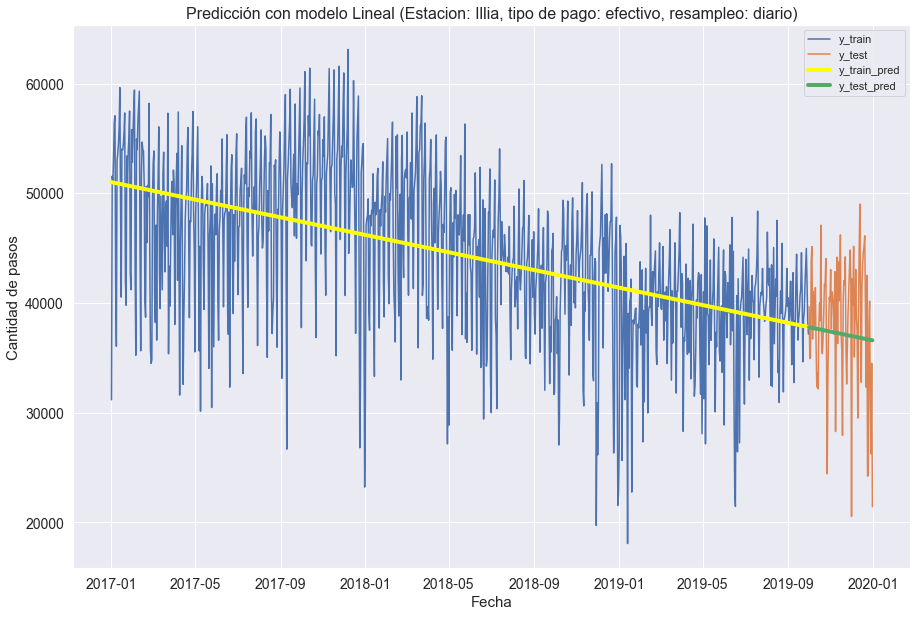

In [ ]:
plt.figure(figsize = (15,10))
# Series de datos de la gráfica
plt.plot(df_train.index, df_train.cantidad_pasos, label = 'y_train')
plt.plot(df_test.index, df_test.cantidad_pasos, label = 'y_test')
plt.plot(df_train.index, y_train_pred, label = 'y_train_pred', color='yellow', lw = 4)
plt.plot(df_test.index, y_test_pred, label = 'y_test_pred',  lw = 4)
#Formato de la gráfica
plt.title('Predicción con modelo Lineal (Estacion: Illia, tipo de pago: efectivo, resampleo: diario)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
import sklearn

![image.png](attachment:d4279509-da83-4f0c-aca7-20e85de55d5c.png)

In [ ]:
def evaluar_modelo(modelo, y_train, y_test, y_train_pred, y_test_pred):

    print('El modelo a evaluar: ', modelo)
    ### CALCULAMOS EL ERROR
    
    rmse_train = round(mean_squared_error(y_train, y_train_pred, squared=False),1)
    rmse_test = round(mean_squared_error(y_test, y_test_pred, squared=False),1)
    
    mape_train = round(100*mean_absolute_percentage_error(y_train, y_train_pred),1)
    mape_test = round(100*mean_absolute_percentage_error(y_test, y_test_pred),1)

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print(f'Porcentaje del Error Absoluto medio en Train: {mape_train}')
    print(f'Porcentaje del Error Absoluto medio en Test: {mape_test}\n')
    
        ### GRAFICAMOS LOS RESULTADOS
      
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

El modelo a evaluar:  Lineal regressor
Raíz del error cuadrático medio en Train: 6451.3
Raíz del error cuadrático medio en Test: 5825.3
Porcentaje del Error Absoluto medio en Train: 12.3
Porcentaje del Error Absoluto medio en Test: 13.2



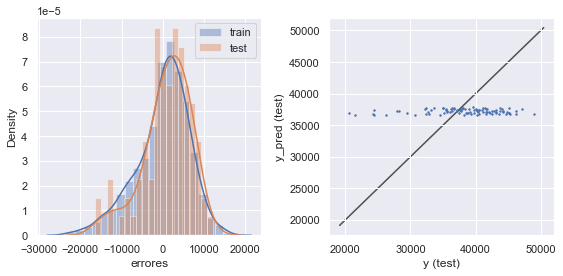

In [ ]:
evaluar_modelo('Lineal regressor', y_train, y_test, y_train_pred, y_test_pred)

# XGBoost

In [ ]:
# Importamos la librería que nos permitirá hacer uso del modelo
import xgboost as xgb

In [ ]:
# Instanciaremos el modelo con sus caracteristicas por defecto
reg = xgb.XGBRegressor()

In [ ]:
# Corroboramos los hiperparametros que el modelo presenta
reg

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [ ]:
# Hacemos que el modelo se entrene con el set de entrenamiento (X_train, y_train)
# Caracteristicas: 
# evalset : el modelo evaluara las métricas mape y rmse y se detendra tras 50 iteraciones
# en las que el modelo ho haya logrado obtener una metrica más baja. 
# evalmetric: serán las metricas que emplearemos para evaluar lo pasos del del entrenamiento.
# La última de ellas es la que se constituye como criterio de parada para elearly stopping. 
# early_stopping_rounds: cantidad de rondas que avanzará sin (si incluimos este parameto se almacenará el mejor modelo respecto a la metrica de evaluación)
# (Sino el modelo evaluará hasta el valor n_estimators y tomnara el valor del ultimo estimador)
# Verbose: Imprimirá cada una de los pasos del entrenamiento con sus respectivas evaluaciones sobre el eval_set
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric= ['mape','rmse'],
        early_stopping_rounds=50,
        verbose=1
       )

[0]	validation_0-mape:0.69327	validation_0-rmse:31883.75781	validation_1-mape:0.67426	validation_1-rmse:26736.20508
[1]	validation_0-mape:0.47958	validation_0-rmse:22783.76562	validation_1-mape:0.45826	validation_1-rmse:18988.77930
[2]	validation_0-mape:0.33406	validation_0-rmse:16550.91602	validation_1-mape:0.31772	validation_1-rmse:13634.20996
[3]	validation_0-mape:0.23911	validation_0-rmse:12313.71094	validation_1-mape:0.23537	validation_1-rmse:10175.92578
[4]	validation_0-mape:0.18064	validation_0-rmse:9507.04004	validation_1-mape:0.18421	validation_1-rmse:8038.71582
[5]	validation_0-mape:0.14765	validation_0-rmse:7708.86377	validation_1-mape:0.15717	validation_1-rmse:6858.51123
[6]	validation_0-mape:0.12707	validation_0-rmse:6591.61670	validation_1-mape:0.14139	validation_1-rmse:6219.93848
[7]	validation_0-mape:0.11443	validation_0-rmse:5918.63379	validation_1-mape:0.13275	validation_1-rmse:5857.66162
[8]	validation_0-mape:0.10632	validation_0-rmse:5517.34375	validation_1-mape:0.1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# Visualizamos el mejor valor para la métrica de criterio de entrenamiento
reg.best_score

5766.853027

In [ ]:
# Visualizamos cual fue la mejor iteración en la que dicho valor se obtuvo
reg.best_iteration

10

In [ ]:
# Generamos las predicciones para los valores de test y de de train para graficarlas
y_train_pred = reg.predict(X_train)
y_test_pred= reg.predict(X_test)

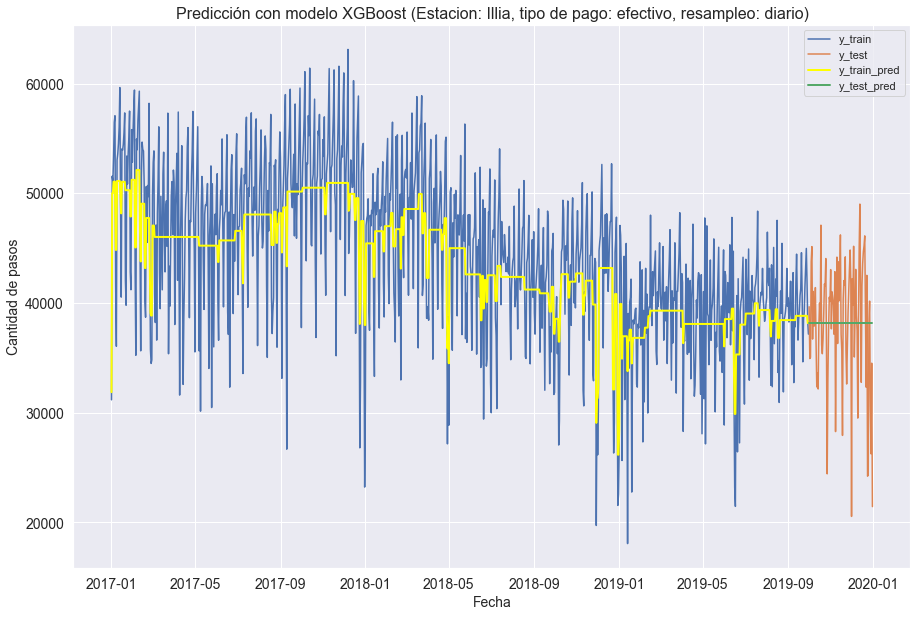

In [ ]:
# Generamos el gráfico de comparación de los valores de entrenamiento y de testeo del modelo
plt.figure(figsize = (15,10))
# Series de datos de la gráfica
plt.plot(df_train.index, df_train.cantidad_pasos, label = 'y_train')
plt.plot(df_test.index, df_test.cantidad_pasos, label = 'y_test')
plt.plot(df_train.index, y_train_pred, label = 'y_train_pred', color='yellow', lw = 2)
plt.plot(df_test.index, y_test_pred, label = 'y_test_pred',  lw = 2)
#Formato de la gráfica
plt.title('Predicción con modelo XGBoost (Estacion: Illia, tipo de pago: efectivo, resampleo: diario)',fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)
plt.tick_params(labelsize=14)
plt.legend()

El modelo a evaluar:  XGBoost
Raíz del error cuadrático medio en Train: 5111.1
Raíz del error cuadrático medio en Test: 5766.9
Porcentaje del Error Absoluto medio en Train: 9.7
Porcentaje del Error Absoluto medio en Test: 13.0



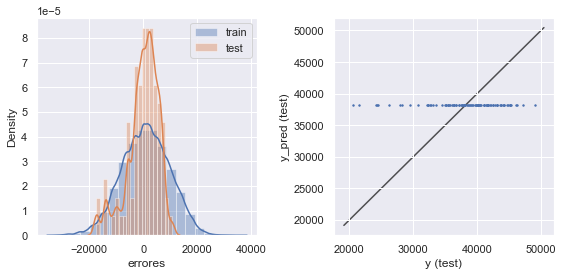

In [ ]:
evaluar_modelo('XGBoost', y_train, y_test, y_train_pred, y_test_pred)

### XGBoost (Optimización)

In [ ]:
reg

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
param_mios = \
{
'base_score':[0.5],
'booster':['gbtree'], 
'colsample_bylevel':[1],
'colsample_bynode':[1], 
'colsample_bytree':[1], 
'gamma':[0], 
'gpu_id':[-1],
'importance_type':['gain'], 
'interaction_constraints':[''],
'learning_rate':[0.300000012, 0.03], 
'max_delta_step':[0], 
'max_depth':[6,5,4,7,8],
'min_child_weight':[1], 
'missing':[np.nan], 
'monotone_constraints':['()'],
'n_estimators':[100,1000], 
'n_jobs':[0], 
'num_parallel_tree':[1], 
'random_state':[0],
'reg_alpha':[0], 
'reg_lambda':[1], 
'scale_pos_weight':[1], 
'subsample':[1],
'tree_method':['exact'], 
'validate_parameters':[1], 
'verbosity':[1]
}

In [ ]:
rg_rs = RandomizedSearchCV(reg, param_mios,n_iter=100, random_state=0, cv=5,
                            scoring='neg_root_mean_squared_error', verbose=True, n_jobs=-1, refit=True)

In [ ]:
rg_rs.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[0]	validation_0-rmse:31883.75781	validation_1-rmse:26736.20508
[1]	validation_0-rmse:22783.76562	validation_1-rmse:18988.77930
[2]	validation_0-rmse:16550.91602	validation_1-rmse:13634.20996
[3]	validation_0-rmse:12324.78125	validation_1-rmse:10175.92578
[4]	validation_0-rmse:9562.80859	validation_1-rmse:8038.71582
[5]	validation_0-rmse:7862.50684	validation_1-rmse:6829.98047
[6]	validation_0-rmse:6818.05615	validation_1-rmse:6204.14990
[7]	validation_0-rmse:6225.84814	validation_1-rmse:5909.04590
[8]	validation_0-rmse:5874.13818	validation_1-rmse:5800.50000
[9]	validation_0-rmse:5670.90527	validation_1-rmse:5767.65234
[10]	validation_0-rmse:5549.61719	validation_1-rmse:5777.44336
[11]	validation_0-rmse:5466.80957	validation_1-rmse:5800.05859
[12]	validation_0-rmse:5369.56152	validation_1-rmse:5816.72656
[13]	validation_0-rmse:5335.67480	validation_1-rmse:5790.33887
[14]	validation_0-rmse:5306.12744	validation_1-rmse:5798.6

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=8,
                                          num_par...
                                        'min_child_weight': [1],
                                        'missing': [nan],
                        

In [ ]:
rg_rs.best_score_

-6280.61674516282

In [ ]:
rg_rs.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [ ]:
list(rg_rs.cv_results_.keys())

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_verbosity',
 'param_validate_parameters',
 'param_tree_method',
 'param_subsample',
 'param_scale_pos_weight',
 'param_reg_lambda',
 'param_reg_alpha',
 'param_random_state',
 'param_num_parallel_tree',
 'param_n_jobs',
 'param_n_estimators',
 'param_monotone_constraints',
 'param_missing',
 'param_min_child_weight',
 'param_max_depth',
 'param_max_delta_step',
 'param_learning_rate',
 'param_interaction_constraints',
 'param_importance_type',
 'param_gpu_id',
 'param_gamma',
 'param_colsample_bytree',
 'param_colsample_bynode',
 'param_colsample_bylevel',
 'param_booster',
 'param_base_score',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score']

In [ ]:
best_score = np.argmax(rg_rs.cv_results_['mean_test_score'])
best_score

4

In [ ]:
print('mean_test_f1', rg_rs.cv_results_['mean_test_score'][best_score])

print('params', rg_rs.cv_results_['params'][best_score])

mean_test_f1 -6280.61674516282
params {'verbosity': 1, 'validate_parameters': 1, 'tree_method': 'exact', 'subsample': 1, 'scale_pos_weight': 1, 'reg_lambda': 1, 'reg_alpha': 0, 'random_state': 0, 'num_parallel_tree': 1, 'n_jobs': 0, 'n_estimators': 100, 'monotone_constraints': '()', 'missing': nan, 'min_child_weight': 1, 'max_depth': 4, 'max_delta_step': 0, 'learning_rate': 0.300000012, 'interaction_constraints': '', 'importance_type': 'gain', 'gpu_id': -1, 'gamma': 0, 'colsample_bytree': 1, 'colsample_bynode': 1, 'colsample_bylevel': 1, 'booster': 'gbtree', 'base_score': 0.5}


In [ ]:
y_train_pred = rg_rs.predict(X_train)
y_test_pred= rg_rs.predict(X_test)

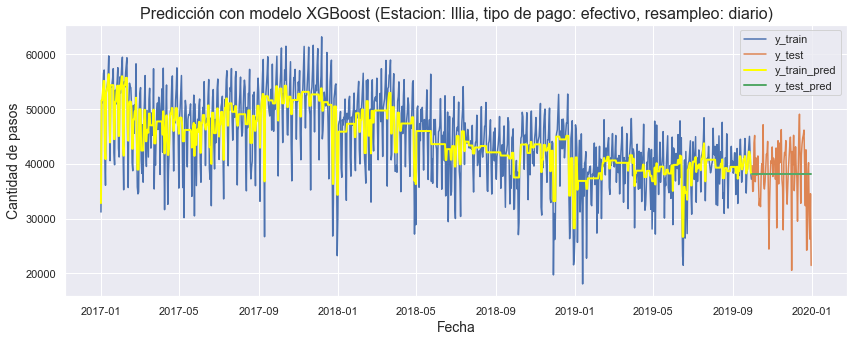

In [ ]:
plt.figure(figsize = (14,5))
# Series de datos de la gráfica
plt.plot(df_train.index, df_train.cantidad_pasos, label = 'y_train')
plt.plot(df_test.index, df_test.cantidad_pasos, label = 'y_test')
plt.plot(df_train.index, y_train_pred, label = 'y_train_pred', color='yellow', lw = 2)
plt.plot(df_test.index, y_test_pred, label = 'y_test_pred',  lw = 2)
#Formato de la gráfica
plt.title('Predicción con modelo XGBoost (Estacion: Illia, tipo de pago: efectivo, resampleo: diario)',fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)
plt.legend()

El modelo a evaluar:  XGBoost_optimizado
Raíz del error cuadrático medio en Train: 4273.890482268585
Raíz del error cuadrático medio en Test: 5766.844580126509
Porcentaje del Error Absoluto medio en Train: 0.07925340651581814
Porcentaje del Error Absoluto medio en Test: 0.13027984797603717



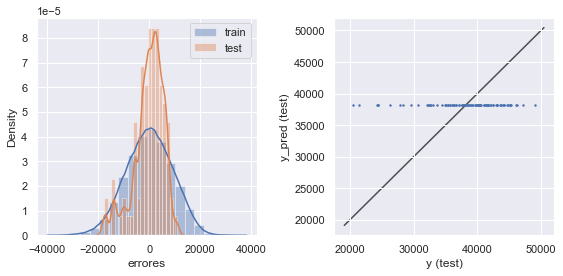

In [ ]:
evaluar_modelo('XGBoost_optimizado', y_train, y_test, y_train_pred, y_test_pred)

# Prophet

In [ ]:
df_train_prophet = df_train.reset_index().drop(columns='fecha_num').rename(columns={'fecha':'ds', 'cantidad_pasos':'y'})
df_train_prophet

ds      y
0    2017-01-01  31183
1    2017-01-02  51568
2    2017-01-03  51093
3    2017-01-04  53332
4    2017-01-05  56486
...         ...    ...
998  2019-09-26  43110
999  2019-09-27  44985
1000 2019-09-28  41925
1001 2019-09-29  38348
1002 2019-09-30  37170

[1003 rows x 2 columns]

In [ ]:
df_test_prophet = df_test.reset_index().drop(columns='fecha_num').rename(columns={'fecha':'ds', 'cantidad_pasos':'y'})
df_test_prophet

ds      y
0  2019-10-01  39669
1  2019-10-02  34943
2  2019-10-03  35054
3  2019-10-04  43775
4  2019-10-05  45150
..        ...    ...
87 2019-12-27  40182
88 2019-12-28  30681
89 2019-12-29  26259
90 2019-12-30  34523
91 2019-12-31  21447

[92 rows x 2 columns]

In [ ]:
# Omitimos los diferentes warnings que se generan con el uso de las librerias
import warnings
warnings.simplefilter('ignore')

In [ ]:
# Esta linea deberia correrse en caso de que las librerias no esten instaladas
# !pip install pystan fbprophet

In [ ]:
# Importamos la librería
from fbprophet import Prophet

In [ ]:
# Instanciamos el modelo
prophet_model = Prophet()

In [ ]:
# Entrenamos nuestro modelo con los datos de entrenamiento
prophet_model.fit(df_train_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df_train_prophet_pred = prophet_model.predict(df_train_prophet)[['ds','yhat']]
df_train_prophet_pred

ds          yhat
0    2017-01-01  39066.394756
1    2017-01-02  45111.617934
2    2017-01-03  46311.755100
3    2017-01-04  48109.759523
4    2017-01-05  49250.201655
...         ...           ...
998  2019-09-26  43724.241317
999  2019-09-27  45895.909636
1000 2019-09-28  37826.241508
1001 2019-09-29  33214.536879
1002 2019-09-30  39348.869595

[1003 rows x 2 columns]

In [ ]:
df_test_prophet_pred = prophet_model.predict(df_test_prophet)[['ds','yhat']]
df_test_prophet_pred

ds          yhat
0  2019-10-01  40602.395779
1  2019-10-02  42420.349795
2  2019-10-03  43550.192165
3  2019-10-04  45726.240807
4  2019-10-05  37675.573021
..        ...           ...
87 2019-12-27  43706.949693
88 2019-12-28  35364.418178
89 2019-12-29  30508.789807
90 2019-12-30  36429.367342
91 2019-12-31  37499.880314

[92 rows x 2 columns]

In [ ]:
y_train_pred = df_train_prophet_pred.yhat.values.reshape(-1, 1)
y_test_pred= df_test_prophet_pred.yhat.values.reshape(-1, 1)

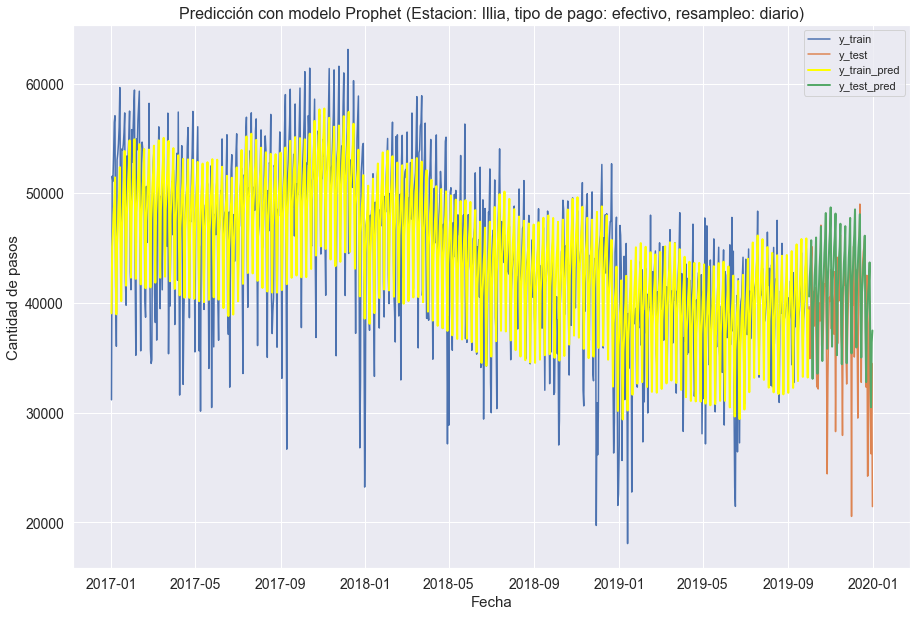

In [ ]:
plt.figure(figsize = (15,10))
# Series de datos de la gráfica
plt.plot(df_train.index, df_train.cantidad_pasos, label = 'y_train')
plt.plot(df_test.index, df_test.cantidad_pasos, label = 'y_test')
plt.plot(df_train.index, y_train_pred, label = 'y_train_pred', color='yellow', lw = 2)
plt.plot(df_test.index, y_test_pred, label = 'y_test_pred',  lw = 2)
#Formato de la gráfica
plt.title('Predicción con modelo Prophet (Estacion: Illia, tipo de pago: efectivo, resampleo: diario)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.tick_params(labelsize=14)
plt.legend()

El modelo a evaluar:  Prophet
Raíz del error cuadrático medio en Train: 4663.9
Raíz del error cuadrático medio en Test: 6110.3
Porcentaje del Error Absoluto medio en Train: 8.3
Porcentaje del Error Absoluto medio en Test: 13.8



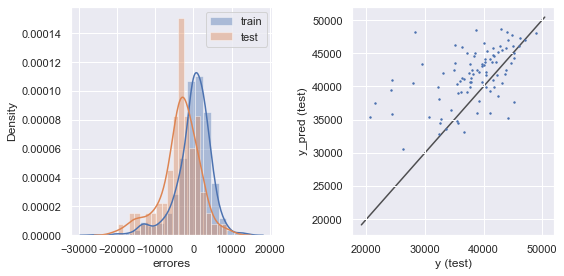

In [ ]:
evaluar_modelo('Prophet', y_train, y_test, y_train_pred, y_test_pred)

# Train - Test Split (con más atributos)

In [ ]:
dataset_analisis = dataset_Illia_efectivo_diario_no_faltantes_no_outliers.\
                   set_index('fecha')
dataset_analisis

fecha_num  periodo  mes        dia  cantidad_pasos
fecha                                                         
2017-01-01     736330     2017    1    Domingo           31183
2017-01-02     736331     2017    1      Lunes           51568
2017-01-03     736332     2017    1     Martes           51093
2017-01-04     736333     2017    1  Miércoles           53332
2017-01-05     736334     2017    1     Jueves           56486
...               ...      ...  ...        ...             ...
2019-12-27     737420     2019   12    Viernes           40182
2019-12-28     737421     2019   12     Sábado           30681
2019-12-29     737422     2019   12    Domingo           26259
2019-12-30     737423     2019   12      Lunes           34523
2019-12-31     737424     2019   12     Martes           21447

[1095 rows x 5 columns]

In [ ]:
#dataset_analisis= pd.get_dummies(dataset_analisis, columns=['periodo','mes','dia'], sparse=True)
dataset_analisis= pd.get_dummies(dataset_analisis, columns=['periodo','mes','dia'], sparse=True)
dataset_analisis

fecha_num  cantidad_pasos  periodo_2017  periodo_2018  \
fecha                                                               
2017-01-01     736330           31183             1             0   
2017-01-02     736331           51568             1             0   
2017-01-03     736332           51093             1             0   
2017-01-04     736333           53332             1             0   
2017-01-05     736334           56486             1             0   
...               ...             ...           ...           ...   
2019-12-27     737420           40182             0             0   
2019-12-28     737421           30681             0             0   
2019-12-29     737422           26259             0             0   
2019-12-30     737423           34523             0             0   
2019-12-31     737424           21447             0             0   

            periodo_2019  mes_1  mes_2  mes_3  mes_4  mes_5  ...  mes_10  \
fecha                                                        ...           
2017-01-01             0      1      0      0      0      0  ...       0   
2017-01-02             0      1      0      0      0      0  ...       0   
2017-01-03             0      1      0      0      0      0  ...       0   
2017-01-04             0      1      0      0      0      0  ...       0   
2017-01-05             0      1      0      0      0      0  ...       0   
...                  ...    ...    ...    ...    ...    ...  ...     ...   
2019-12-27             1      0      0      0      0      0  ...       0   
2019-12-28             1      0      0      0      0      0  ...       0   
2019-12-29             1      0      0      0      0      0  ...       0   
2019-12-30             1      0      0      0      0      0  ...       0   
2019-12-31             1      0      0      0      0      0  ...       0   

            mes_11  mes_12  dia_Domingo  dia_Jueves  dia_Lunes  dia_Martes  \
fecha                                                                        
2017-01-01       0       0            1           0          0           0   
2017-01-02       0       0            0           0          1           0   
2017-01-03       0       0            0           0          0           1   
2017-01-04       0       0            0           0          0           0   
2017-01-05       0       0            0           1          0           0   
...            ...     ...          ...         ...        ...         ...   
2019-12-27       0       1            0           0          0           0   
2019-12-28       0       1            0           0          0           0   
2019-12-29       0       1            1           0          0           0   
2019-12-30       0       1            0           0          1           0   
2019-12-31       0       1            0           0          0           1   

            dia_Miércoles  dia_Sábado  dia_Viernes  
fecha                                               
2017-01-01              0           0            0  
2017-01-02              0           0            0  
2017-01-03              0           0            0  
2017-01-04              1           0            0  
2017-01-05              0           0            0  
...                   ...         ...          ...  
2019-12-27              0           0            1  
2019-12-28              0           1            0  
2019-12-29              0           0            0  
2019-12-30              0           0            0  
2019-12-31              0           0            0  

[1095 rows x 24 columns]

In [ ]:
df_train = dataset_analisis.loc['2017-01-01':'2019-09-30']
df_train

fecha_num  cantidad_pasos  periodo_2017  periodo_2018  \
fecha                                                               
2017-01-01     736330           31183             1             0   
2017-01-02     736331           51568             1             0   
2017-01-03     736332           51093             1             0   
2017-01-04     736333           53332             1             0   
2017-01-05     736334           56486             1             0   
...               ...             ...           ...           ...   
2019-09-26     737328           43110             0             0   
2019-09-27     737329           44985             0             0   
2019-09-28     737330           41925             0             0   
2019-09-29     737331           38348             0             0   
2019-09-30     737332           37170             0             0   

            periodo_2019  mes_1  mes_2  mes_3  mes_4  mes_5  ...  mes_10  \
fecha                                                        ...           
2017-01-01             0      1      0      0      0      0  ...       0   
2017-01-02             0      1      0      0      0      0  ...       0   
2017-01-03             0      1      0      0      0      0  ...       0   
2017-01-04             0      1      0      0      0      0  ...       0   
2017-01-05             0      1      0      0      0      0  ...       0   
...                  ...    ...    ...    ...    ...    ...  ...     ...   
2019-09-26             1      0      0      0      0      0  ...       0   
2019-09-27             1      0      0      0      0      0  ...       0   
2019-09-28             1      0      0      0      0      0  ...       0   
2019-09-29             1      0      0      0      0      0  ...       0   
2019-09-30             1      0      0      0      0      0  ...       0   

            mes_11  mes_12  dia_Domingo  dia_Jueves  dia_Lunes  dia_Martes  \
fecha                                                                        
2017-01-01       0       0            1           0          0           0   
2017-01-02       0       0            0           0          1           0   
2017-01-03       0       0            0           0          0           1   
2017-01-04       0       0            0           0          0           0   
2017-01-05       0       0            0           1          0           0   
...            ...     ...          ...         ...        ...         ...   
2019-09-26       0       0            0           1          0           0   
2019-09-27       0       0            0           0          0           0   
2019-09-28       0       0            0           0          0           0   
2019-09-29       0       0            1           0          0           0   
2019-09-30       0       0            0           0          1           0   

            dia_Miércoles  dia_Sábado  dia_Viernes  
fecha                                               
2017-01-01              0           0            0  
2017-01-02              0           0            0  
2017-01-03              0           0            0  
2017-01-04              1           0            0  
2017-01-05              0           0            0  
...                   ...         ...          ...  
2019-09-26              0           0            0  
2019-09-27              0           0            1  
2019-09-28              0           1            0  
2019-09-29              0           0            0  
2019-09-30              0           0            0  

[1003 rows x 24 columns]

In [ ]:
df_test = dataset_analisis.loc['2019-10-01':]
df_test

fecha_num  cantidad_pasos  periodo_2017  periodo_2018  \
fecha                                                               
2019-10-01     737333           39669             0             0   
2019-10-02     737334           34943             0             0   
2019-10-03     737335           35054             0             0   
2019-10-04     737336           43775             0             0   
2019-10-05     737337           45150             0             0   
...               ...             ...           ...           ...   
2019-12-27     737420           40182             0             0   
2019-12-28     737421           30681             0             0   
2019-12-29     737422           26259             0             0   
2019-12-30     737423           34523             0             0   
2019-12-31     737424           21447             0             0   

            periodo_2019  mes_1  mes_2  mes_3  mes_4  mes_5  ...  mes_10  \
fecha                                                        ...           
2019-10-01             1      0      0      0      0      0  ...       1   
2019-10-02             1      0      0      0      0      0  ...       1   
2019-10-03             1      0      0      0      0      0  ...       1   
2019-10-04             1      0      0      0      0      0  ...       1   
2019-10-05             1      0      0      0      0      0  ...       1   
...                  ...    ...    ...    ...    ...    ...  ...     ...   
2019-12-27             1      0      0      0      0      0  ...       0   
2019-12-28             1      0      0      0      0      0  ...       0   
2019-12-29             1      0      0      0      0      0  ...       0   
2019-12-30             1      0      0      0      0      0  ...       0   
2019-12-31             1      0      0      0      0      0  ...       0   

            mes_11  mes_12  dia_Domingo  dia_Jueves  dia_Lunes  dia_Martes  \
fecha                                                                        
2019-10-01       0       0            0           0          0           1   
2019-10-02       0       0            0           0          0           0   
2019-10-03       0       0            0           1          0           0   
2019-10-04       0       0            0           0          0           0   
2019-10-05       0       0            0           0          0           0   
...            ...     ...          ...         ...        ...         ...   
2019-12-27       0       1            0           0          0           0   
2019-12-28       0       1            0           0          0           0   
2019-12-29       0       1            1           0          0           0   
2019-12-30       0       1            0           0          1           0   
2019-12-31       0       1            0           0          0           1   

            dia_Miércoles  dia_Sábado  dia_Viernes  
fecha                                               
2019-10-01              0           0            0  
2019-10-02              1           0            0  
2019-10-03              0           0            0  
2019-10-04              0           0            1  
2019-10-05              0           1            0  
...                   ...         ...          ...  
2019-12-27              0           0            1  
2019-12-28              0           1            0  
2019-12-29              0           0            0  
2019-12-30              0           0            0  
2019-12-31              0           0            0  

[92 rows x 24 columns]

In [ ]:
X_train = df_train.drop(columns='cantidad_pasos')
y_train = df_train.cantidad_pasos.values.reshape(-1, 1)
X_test = df_test.drop(columns='cantidad_pasos')
y_test = df_test.cantidad_pasos.values.reshape(-1, 1)

# XGBoost con tutti

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [ ]:
reg = xgb.XGBRegressor()
reg

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [ ]:
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        eval_metric= ['mape','rmse'],
        verbose=True)

[0]	validation_0-mape:0.69672	validation_0-rmse:31819.18555	validation_1-mape:0.68830	validation_1-rmse:27191.35938
[1]	validation_0-mape:0.48409	validation_0-rmse:22617.60938	validation_1-mape:0.46090	validation_1-rmse:18920.53906
[2]	validation_0-mape:0.33845	validation_0-rmse:16250.85449	validation_1-mape:0.31597	validation_1-rmse:13461.04492
[3]	validation_0-mape:0.24293	validation_0-rmse:11874.39062	validation_1-mape:0.23019	validation_1-rmse:9838.56055
[4]	validation_0-mape:0.17852	validation_0-rmse:8859.53418	validation_1-mape:0.17744	validation_1-rmse:7574.64941
[5]	validation_0-mape:0.13684	validation_0-rmse:6854.20312	validation_1-mape:0.14689	validation_1-rmse:6362.16211
[6]	validation_0-mape:0.10988	validation_0-rmse:5570.06250	validation_1-mape:0.12992	validation_1-rmse:5675.70215
[7]	validation_0-mape:0.09126	validation_0-rmse:4684.71728	validation_1-mape:0.12086	validation_1-rmse:5357.02734
[8]	validation_0-mape:0.07968	validation_0-rmse:4153.39111	validation_1-mape:0.11

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_train_pred = reg.predict(X_train)
y_test_pred= reg.predict(X_test)

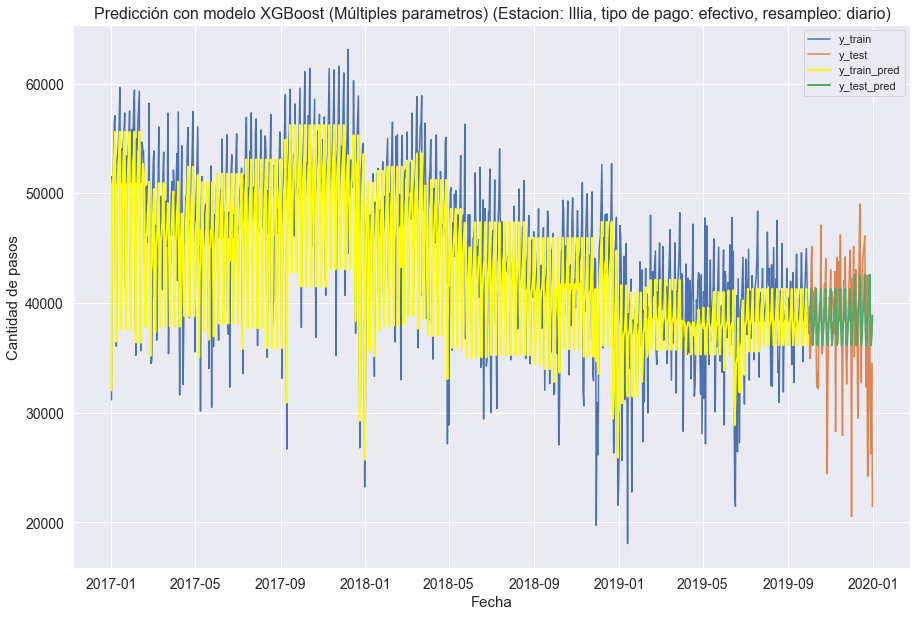

In [ ]:
plt.figure(figsize = (15,10))
# Series de datos de la gráfica
plt.plot(df_train.index, df_train.cantidad_pasos, label = 'y_train')
plt.plot(df_test.index, df_test.cantidad_pasos, label = 'y_test')
plt.plot(df_train.index, y_train_pred, label = 'y_train_pred', color='yellow', lw = 2)
plt.plot(df_test.index, y_test_pred, label = 'y_test_pred',  lw = 2)
#Formato de la gráfica
plt.title('Predicción con modelo XGBoost (Múltiples parametros) (Estacion: Illia, tipo de pago: efectivo, resampleo: diario)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.tick_params(labelsize=14)
plt.legend()

El modelo a evaluar:  XGBoost (Múltiples parametros)
Raíz del error cuadrático medio en Train: 3792.5
Raíz del error cuadrático medio en Test: 5292.4
Porcentaje del Error Absoluto medio en Train: 7.2
Porcentaje del Error Absoluto medio en Test: 11.8



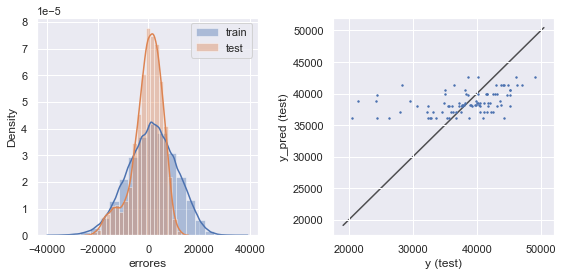

In [ ]:
evaluar_modelo('XGBoost (Múltiples parametros)', y_train, y_test, y_train_pred, y_test_pred)

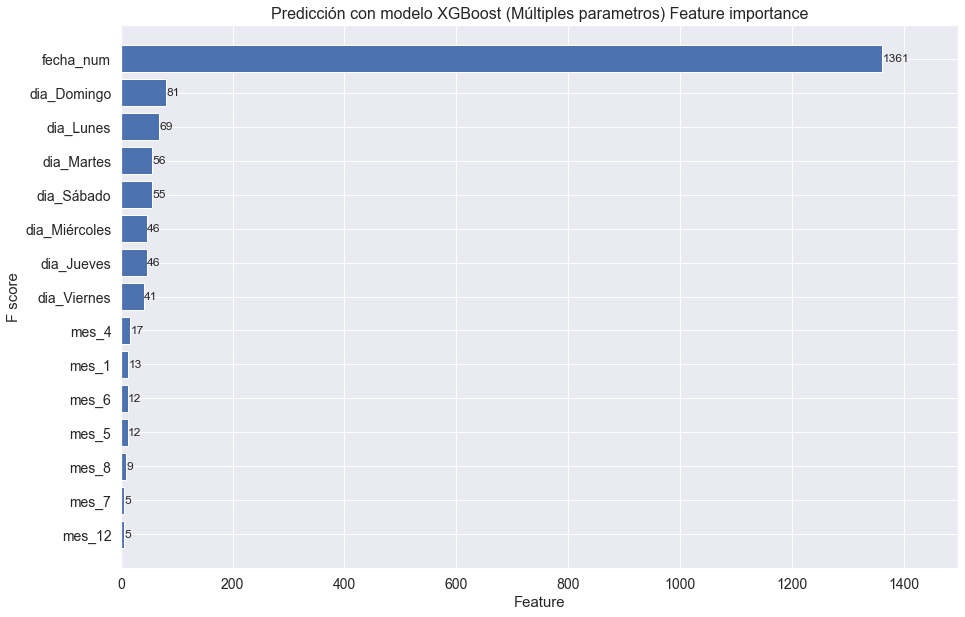

In [ ]:
plot_importance(reg, height=0.8,max_num_features=15)
plt.title('Predicción con modelo XGBoost (Múltiples parametros) Feature importance',fontsize=16)
plt.xlabel('Feature', fontsize=15)
plt.ylabel('F score', fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

# XGBoost con tutti (optimizado)

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
xgb_model=xgb.XGBRegressor()

In [ ]:
param_rs = {'nthread':[1, 2, 3, 4, 5], 
              'objective':['reg:squarederror'],
              'learning_rate': np.arange(.05, 1, .05),
              'max_depth': np.arange(1,10),
              'min_child_weight': [3, 4, 5, 6, 7, 8],
              'subsample': np.arange(.05, 1, .05),
              'colsample_bytree': np.arange(.05, 1, .05),
              'n_estimators': [200, 300, 400, 500, 600]}
param_rs

{'nthread': [1, 2, 3, 4, 5],
 'objective': ['reg:squarederror'],
 'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
        0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'min_child_weight': [3, 4, 5, 6, 7, 8],
 'subsample': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
        0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 'colsample_bytree': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
        0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 'n_estimators': [200, 300, 400, 500, 600]}

In [ ]:
xgb_rs = RandomizedSearchCV(xgb_model, param_rs,n_iter=50, random_state=0, cv=5,
                            scoring='neg_root_mean_squared_error', verbose=True, n_jobs=-1, refit=True)

In [ ]:
xgb_rs.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[0]	validation_0-rmse:16842.12695	validation_1-rmse:14255.70019
[1]	validation_0-rmse:7683.47607	validation_1-rmse:6927.71777
[2]	validation_0-rmse:5161.58008	validation_1-rmse:5276.70264
[3]	validation_0-rmse:4224.71680	validation_1-rmse:5375.77441
[4]	validation_0-rmse:3940.44238	validation_1-rmse:5491.58447
[5]	validation_0-rmse:3897.63062	validation_1-rmse:5360.13379
[6]	validation_0-rmse:3722.41187	validation_1-rmse:5410.74951
[7]	validation_0-rmse:3691.95435	validation_1-rmse:5484.00684
[8]	validation_0-rmse:3559.85840	validation_1-rmse:5547.87109
[9]	validation_0-rmse:3541.32178	validation_1-rmse:5566.96973
[10]	validation_0-rmse:3441.97900	validation_1-rmse:5523.38965
[11]	validation_0-rmse:3448.54297	validation_1-rmse:5472.61914
[12]	validation_0-rmse:3422.11084	validation_1-rmse:5366.56055
[13]	validation_0-rmse:3281.29053	validation_1-rmse:5662.71387
[14]	validation_0-rmse:3273.98682	validation_1-rmse:5697.69873
[

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min

In [ ]:
xgb_rs.best_score_

-5061.0845775102125

In [ ]:
xgb_rs.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7000000000000001, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.6500000000000001, max_delta_step=0, max_depth=7,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7500000000000001, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
xgb_rs.params

AttributeError: 'RandomizedSearchCV' object has no attribute 'params'

In [ ]:
xgb_rs.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
xgb_rs.best_score_

-5133.337589539457

In [ ]:
list(xgb_rs.cv_results_.keys())

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_verbosity',
 'param_validate_parameters',
 'param_tree_method',
 'param_subsample',
 'param_scale_pos_weight',
 'param_reg_lambda',
 'param_reg_alpha',
 'param_random_state',
 'param_num_parallel_tree',
 'param_n_jobs',
 'param_n_estimators',
 'param_monotone_constraints',
 'param_missing',
 'param_min_child_weight',
 'param_max_depth',
 'param_max_delta_step',
 'param_learning_rate',
 'param_interaction_constraints',
 'param_importance_type',
 'param_gpu_id',
 'param_gamma',
 'param_colsample_bytree',
 'param_colsample_bynode',
 'param_colsample_bylevel',
 'param_booster',
 'param_base_score',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score']

In [ ]:
best_score = np.argmax(xgb_rs.cv_results_['mean_test_score'])
best_score

14

In [ ]:
print('mean_test_f1', xgb_rs.cv_results_['mean_test_score'][best_score])

print('params', xgb_rs.cv_results_['params'][best_score])

mean_test_f1 -5061.0845775102125
params {'subsample': 0.7500000000000001, 'objective': 'reg:squarederror', 'nthread': 4, 'n_estimators': 500, 'min_child_weight': 6, 'max_depth': 7, 'learning_rate': 0.6500000000000001, 'colsample_bytree': 0.7000000000000001}


In [ ]:
y_train_pred = xgb_rs.predict(X_train)
y_test_pred= xgb_rs.predict(X_test)

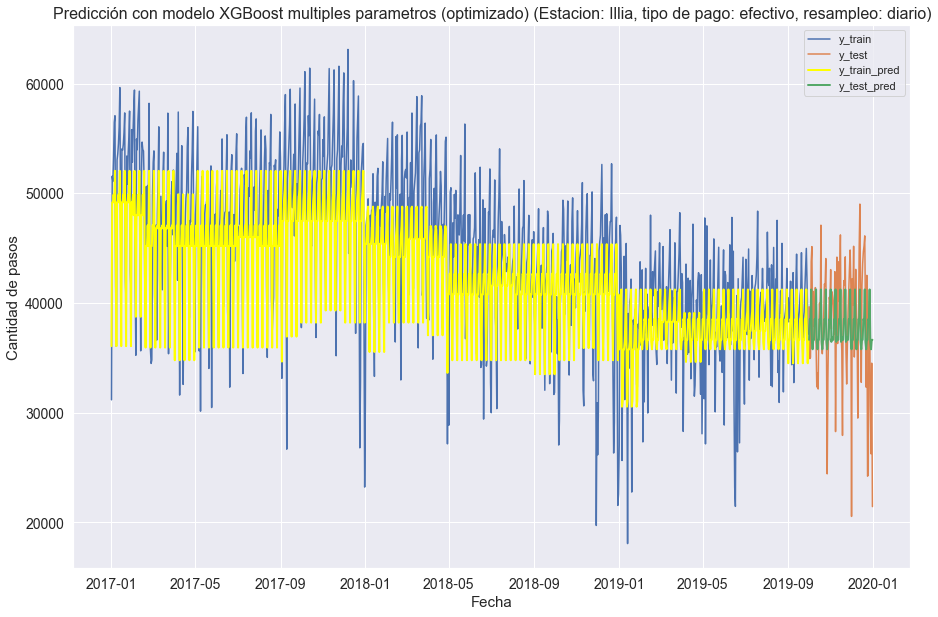

In [ ]:
plt.figure(figsize = (15,10))
# Series de datos de la gráfica
plt.plot(df_train.index, df_train.cantidad_pasos, label = 'y_train')
plt.plot(df_test.index, df_test.cantidad_pasos, label = 'y_test')
plt.plot(df_train.index, y_train_pred, label = 'y_train_pred', color='yellow', lw = 2)
plt.plot(df_test.index, y_test_pred, label = 'y_test_pred',  lw = 2)
#Formato de la gráfica
plt.title('Predicción con modelo XGBoost multiples parametros (optimizado) (Estacion: Illia, tipo de pago: efectivo, resampleo: diario)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.tick_params(labelsize=14)
plt.legend()

El modelo a evaluar:  XGBoost multiples parametros optimizado
Raíz del error cuadrático medio en Train: 5161.6
Raíz del error cuadrático medio en Test: 5276.7
Porcentaje del Error Absoluto medio en Train: 9.9
Porcentaje del Error Absoluto medio en Test: 12.0



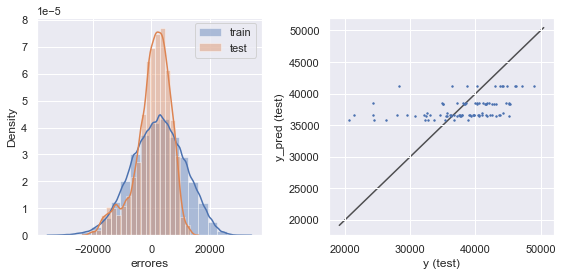

In [ ]:
evaluar_modelo('XGBoost multiples parametros optimizado', y_train, y_test, y_train_pred, y_test_pred)

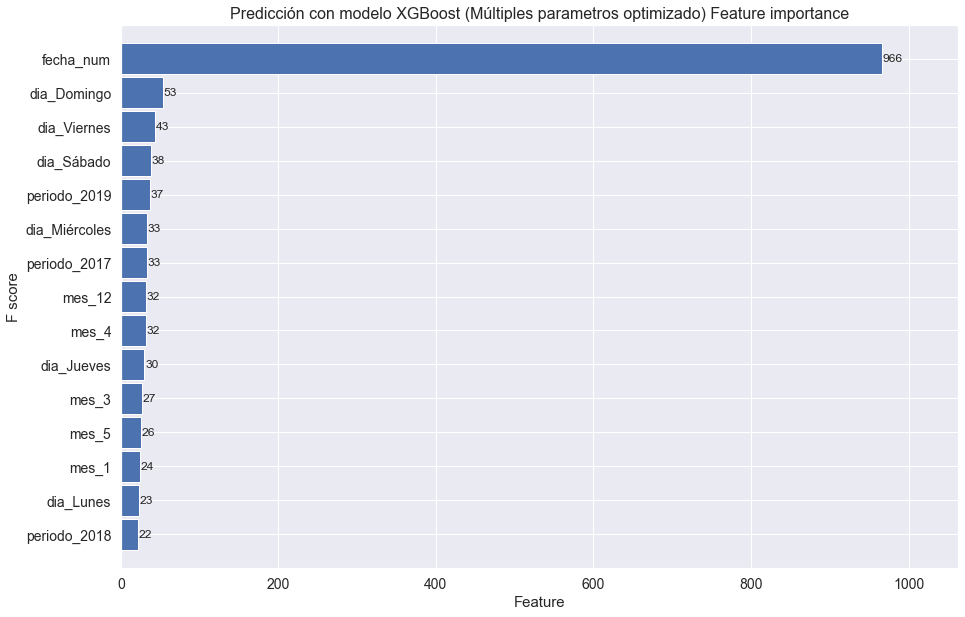

In [ ]:
plot_importance(xgb_rs.best_estimator_, height=0.9,max_num_features=15)
plt.title('Predicción con modelo XGBoost (Múltiples parametros optimizado) Feature importance',fontsize=16)
plt.xlabel('Feature', fontsize=15)
plt.ylabel('F score', fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

In [ ]:
param_default = \
{
'base_score':[0.5],
'booster':['gbtree'], 
'colsample_bylevel':[1],
'colsample_bynode':[1], 
'colsample_bytree':[1], 
'gamma':[0], 
'gpu_id':[-1],
'importance_type':['gain'], 
'interaction_constraints':[''],
'learning_rate':[0.300000012], 
'max_delta_step':[0], 
'max_depth':[6],
'min_child_weight':[1], 
'missing':[np.nan], 
'monotone_constraints':['()'],
'n_estimators':[100], 
'n_jobs':[0], 
'num_parallel_tree':[1], 
'random_state':[0],
'reg_alpha':[0], 
'reg_lambda':[1], 
'scale_pos_weight':[1], 
'subsample':[1],
'tree_method':['exact'], 
'validate_parameters':[1], 
'verbosity':[None]
}

In [ ]:
param_mios = \
{
'base_score':[0.5],
'booster':['gbtree'], 
'colsample_bylevel':[1],
'colsample_bynode':[1], 
'colsample_bytree':[1], 
'gamma':[0], 
'gpu_id':[-1],
'importance_type':['gain'], 
'interaction_constraints':[''],
'learning_rate':[0.300000012], 
'max_delta_step':[0], 
'max_depth':[6,5,4,7,8],
'min_child_weight':[1], 
'missing':[np.nan], 
'monotone_constraints':['()'],
'n_estimators':[100,1000], 
'n_jobs':[0], 
'num_parallel_tree':[1], 
'random_state':[0],
'reg_alpha':[0], 
'reg_lambda':[1], 
'scale_pos_weight':[1], 
'subsample':[1],
'tree_method':['exact'], 
'validate_parameters':[1], 
'verbosity':[None]
}

# Forecast 2020 (empleando Prophet)

In [ ]:
dataset_Illia_efectivo_diario_no_faltantes_no_outliers

fecha  fecha_num  periodo  mes        dia  cantidad_pasos
0    2017-01-01     736330     2017    1    Domingo           31183
1    2017-01-02     736331     2017    1      Lunes           51568
2    2017-01-03     736332     2017    1     Martes           51093
3    2017-01-04     736333     2017    1  Miércoles           53332
4    2017-01-05     736334     2017    1     Jueves           56486
...         ...        ...      ...  ...        ...             ...
1090 2019-12-27     737420     2019   12    Viernes           40182
1091 2019-12-28     737421     2019   12     Sábado           30681
1092 2019-12-29     737422     2019   12    Domingo           26259
1093 2019-12-30     737423     2019   12      Lunes           34523
1094 2019-12-31     737424     2019   12     Martes           21447

[1095 rows x 6 columns]

In [ ]:
df_train_prophet_forecast = dataset_Illia_efectivo_diario_no_faltantes_no_outliers\
                            .drop(columns=['fecha_num','periodo','mes','dia'])\
                            .rename(columns={'fecha':'ds', 'cantidad_pasos':'y'})
df_train_prophet_forecast

ds      y
0    2017-01-01  31183
1    2017-01-02  51568
2    2017-01-03  51093
3    2017-01-04  53332
4    2017-01-05  56486
...         ...    ...
1090 2019-12-27  40182
1091 2019-12-28  30681
1092 2019-12-29  26259
1093 2019-12-30  34523
1094 2019-12-31  21447

[1095 rows x 2 columns]

In [ ]:
# Importamos la librería
from fbprophet import Prophet

In [ ]:
# Instanciamos el modelo
prophet_model = Prophet()

In [ ]:
prophet_model.fit(df_train_prophet_forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Dado que queremos hacer una predición para un año más (todo 2020), 
# creamos un vector que incluya los valores a futuro
# Dado que las muestras son diarias, deben incluirse 365 para generar todo el año a predecir.
future = prophet_model.make_future_dataframe(periods=365)
future.tail()

ds
1455 2020-12-26
1456 2020-12-27
1457 2020-12-28
1458 2020-12-29
1459 2020-12-30

In [ ]:
future.head()

ds
0 2017-01-01
1 2017-01-02
2 2017-01-03
3 2017-01-04
4 2017-01-05

In [ ]:
forecast = prophet_model.predict(future)
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0    2017-01-01  49229.834560  32884.889374  44631.824174  49229.834560   
1    2017-01-02  49225.990615  38474.534073  50894.241992  49225.990615   
2    2017-01-03  49222.146671  39552.879771  51816.694497  49222.146671   
3    2017-01-04  49218.302726  41684.212104  53694.519110  49218.302726   
4    2017-01-05  49214.458781  43196.517910  54601.650268  49214.458781   
...         ...           ...           ...           ...           ...   
1455 2020-12-26  34302.354563  23308.826188  36436.053124  32241.277473   
1456 2020-12-27  34294.305339  18560.970128  31352.775194  32225.482552   
1457 2020-12-28  34286.256115  24290.598088  36737.666057  32213.499972   
1458 2020-12-29  34278.206890  24782.926364  38276.449848  32202.650355   
1459 2020-12-30  34270.157666  27153.693935  39492.651380  32186.407477   

       trend_upper  additive_terms  additive_terms_lower  \
0     49229.834560   -10403.719257         -10403.719257   
1     49225.990615    -4564.124825          -4564.124825   
2     49222.146671    -3521.328939          -3521.328939   
3     49218.302726    -1679.802694          -1679.802694   
4     49214.458781     -479.180061           -479.180061   
...            ...             ...                   ...   
1455  36447.912546    -4312.505477          -4312.505477   
1456  36449.062432    -9214.023545          -9214.023545   
1457  36453.814348    -3557.132443          -3557.132443   
1458  36452.132555    -2707.940752          -2707.940752   
1459  36451.580178    -1067.480039          -1067.480039   

      additive_terms_upper       weekly  weekly_lower  weekly_upper  \
0            -10403.719257 -7010.560791  -7010.560791  -7010.560791   
1             -4564.124825 -1047.712947  -1047.712947  -1047.712947   
2             -3521.328939    76.617000     76.617000     76.617000   
3             -1679.802694  1957.890560   1957.890560   1957.890560   
4              -479.180061  3157.115014   3157.115014   3157.115014   
...                    ...          ...           ...           ...   
1455          -4312.505477 -2441.748097  -2441.748097  -2441.748097   
1456          -9214.023545 -7010.560791  -7010.560791  -7010.560791   
1457          -3557.132443 -1047.712947  -1047.712947  -1047.712947   
1458          -2707.940752    76.617000     76.617000     76.617000   
1459          -1067.480039  1957.890560   1957.890560   1957.890560   

           yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0    -3393.158466  -3393.158466  -3393.158466                   0.0   
1    -3516.411878  -3516.411878  -3516.411878                   0.0   
2    -3597.945939  -3597.945939  -3597.945939                   0.0   
3    -3637.693255  -3637.693255  -3637.693255                   0.0   
4    -3636.295075  -3636.295075  -3636.295075                   0.0   
...           ...           ...           ...                   ...   
1455 -1870.757380  -1870.757380  -1870.757380                   0.0   
1456 -2203.462755  -2203.462755  -2203.462755                   0.0   
1457 -2509.419496  -2509.419496  -2509.419496                   0.0   
1458 -2784.557752  -2784.557752  -2784.557752                   0.0   
1459 -3025.370599  -3025.370599  -3025.370599                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                            0.0                         0.0  38826.115303  
1                            0.0                         0.0  44661.865790  
2                            0.0                         0.0  45700.817732  
3                            0.0                         0.0  47538.500032  
4                            0.0                         0.0  48735.278720  
...                          ...                         ...           ...  
1455                         0.0                         0.0  29989.849087  
1456                         0.0                         0.0  25080.2

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1455 2020-12-26  29989.849087  23308.826188  36436.053124
1456 2020-12-27  25080.281794  18560.970128  31352.775194
1457 2020-12-28  30729.123672  24290.598088  36737.666057
1458 2020-12-29  31570.266139  24782.926364  38276.449848
1459 2020-12-30  33202.677627  27153.693935  39492.651380

<Figure size 1080x720 with 0 Axes>

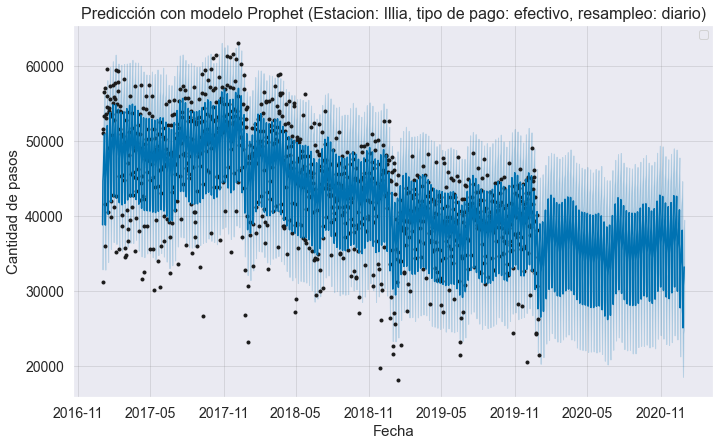

In [ ]:
plt.figure(figsize = (15,10))
prophet_model.plot(forecast)
plt.title('Predicción con modelo Prophet (Estacion: Illia, tipo de pago: efectivo, resampleo: diario)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.tick_params(labelsize=14)
plt.legend()

In [ ]:
y_test_pred= forecast.yhat.values.reshape(-1, 1)

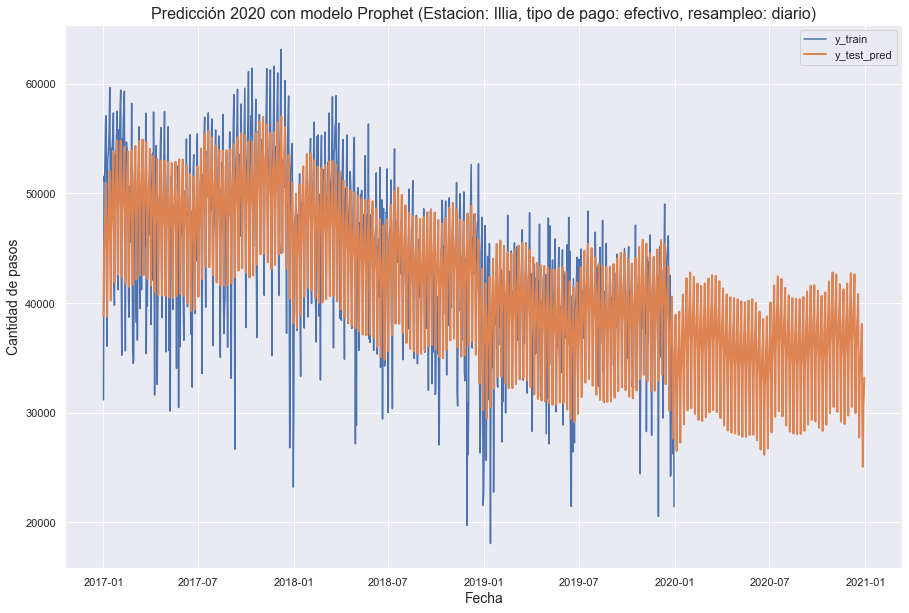

In [ ]:
plt.figure(figsize = (15,10))
# Series de datos de la gráfica
plt.plot(df_train_prophet_forecast.ds, df_train_prophet_forecast.y, label = 'y_train')
plt.plot(future.ds, y_test_pred, label = 'y_test_pred',  lw = 2)
#Formato de la gráfica
plt.title('Predicción 2020 con modelo Prophet (Estacion: Illia, tipo de pago: efectivo, resampleo: diario)',fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)
plt.legend()

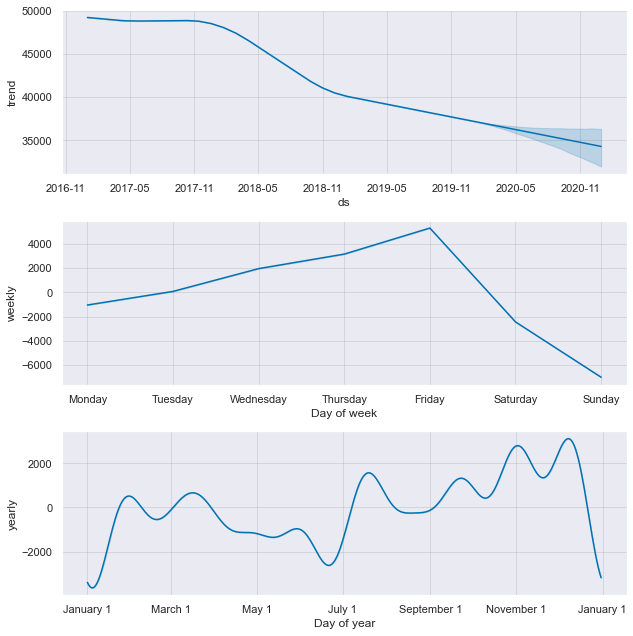

In [ ]:
fig2 = prophet_model.plot_components(forecast,weekly_start=1)

### Autocorrelación

In [ ]:
dataset_Illia_efectivo_diario_no_faltantes_no_outliers

fecha  fecha_num  periodo  mes        dia  cantidad_pasos
0    2017-01-01     736330     2017    1    Domingo           31183
1    2017-01-02     736331     2017    1      Lunes           51568
2    2017-01-03     736332     2017    1     Martes           51093
3    2017-01-04     736333     2017    1  Miércoles           53332
4    2017-01-05     736334     2017    1     Jueves           56486
...         ...        ...      ...  ...        ...             ...
1090 2019-12-27     737420     2019   12    Viernes           40182
1091 2019-12-28     737421     2019   12     Sábado           30681
1092 2019-12-29     737422     2019   12    Domingo           26259
1093 2019-12-30     737423     2019   12      Lunes           34523
1094 2019-12-31     737424     2019   12     Martes           21447

[1095 rows x 6 columns]

Text(0, 0.5, 'Cantidad de pasos')

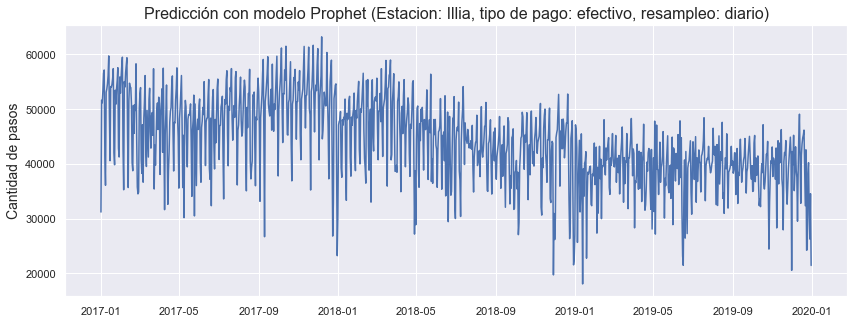

In [ ]:
plt.figure(figsize = (14,5))
# Series de datos de la gráfica
plt.plot(dataset_Illia_efectivo_diario_no_faltantes_no_outliers.fecha,\
         dataset_Illia_efectivo_diario_no_faltantes_no_outliers.cantidad_pasos)
#Formato de la gráfica
plt.title('Predicción con modelo Prophet (Estacion: Illia, tipo de pago: efectivo, resampleo: diario)',fontsize=16)
plt.ylabel('Cantidad de pasos', fontsize=14)

In [ ]:
from statsmodels.tsa.stattools import acf
# 52 debe corresponder al numero de semanas por año
# 20 debe corresponder al numero de años que deseamos ver


In [ ]:
nlags =  365*3
autocorr = acf(dataset_Illia_efectivo_diario_no_faltantes_no_outliers.cantidad_pasos, nlags = nlags)

In [ ]:
nlags 

1095

In [ ]:
autocorr.shape

(1095,)

In [ ]:
autocorr.view()

array([ 1.00000000e+00,  5.38206449e-01,  2.88330178e-01, ...,
       -1.46400227e-04, -8.45728309e-04,  4.55438790e-03])

Text(0.5, 0, 'lag')

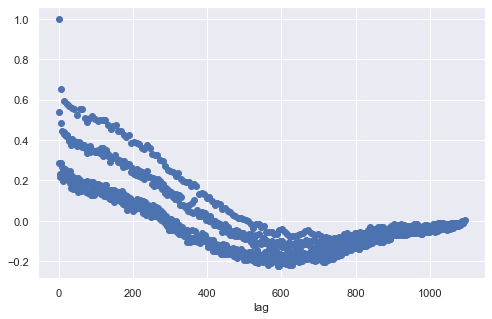

In [ ]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags), autocorr)
plt.xlabel('lag')

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf


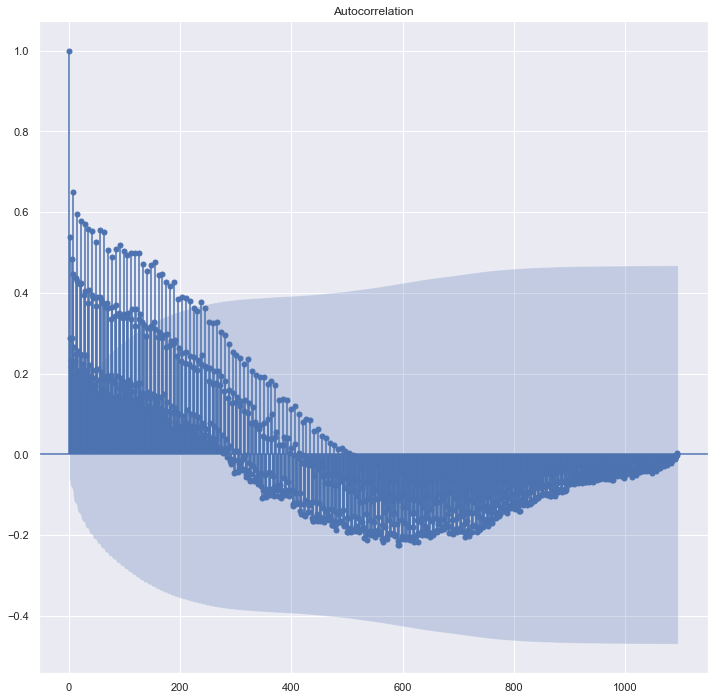

In [ ]:
plot_acf(dataset_Illia_efectivo_diario_no_faltantes_no_outliers.cantidad_pasos, lags = 365*3-1)
plt.show()

In [ ]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

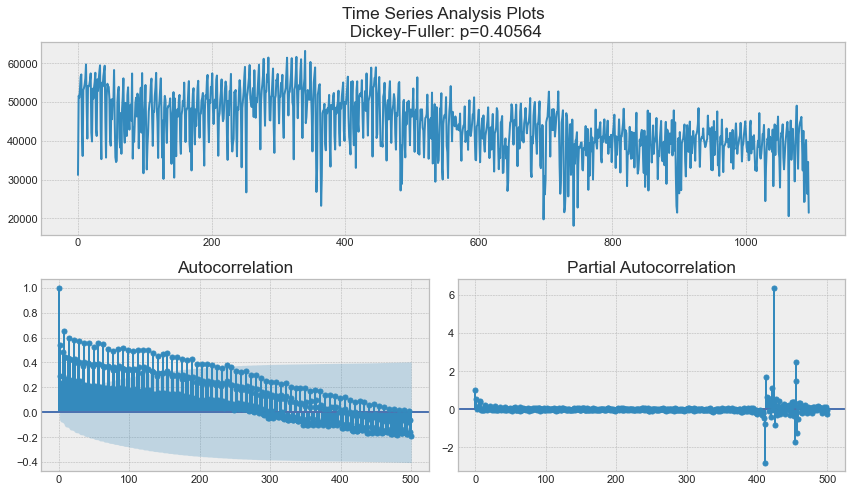

In [ ]:
tsplot(dataset_Illia_efectivo_diario_no_faltantes_no_outliers.cantidad_pasos, lags =500)